In [152]:
from sklearn.ensemble import GradientBoostingRegressor
from catboost import Pool, to_classifier, to_regressor, CatBoost, cv, CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
!pip install hyperopt
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


### Data from preprocessing notebook
[Preprocessing_model_2.ipynb](./Preprocessing_model_2.ipynb)

In [154]:
data = pd.read_csv("../../../Data/Dataset_splited_v2.csv",sep=",")

In [155]:
data.shape

(6814, 23)

### Sampling

In [156]:
def split_data(data,target,col="split",features_to_keep=None):
    if features_to_keep is not None :
        features_to_keep = features_to_keep
        data = data[features_to_keep]
        
    unique = data[col].unique()
    for i, v in enumerate(unique):
        if v == 0 :
            data_train = data[data[col]==v]
            y_train = data_train[target]
            X_train = data_train.drop([target,col],axis=1)
            print("train shape :",X_train.shape)
        elif v == 1 :
            data_val = data[data[col]==v]
            y_val = data_val[target]
            X_val = data_val.drop([target,col],axis=1)
            print("val shape :",X_val.shape)
        elif v == 2 :
            data_test = data[data[col]==v]
            y_test = data_test[target]
            X_test = data_test.drop([target,col],axis=1)
            print("test shape :",X_test.shape)
    
            
    return X_train, np.log(y_train), X_val, np.log(y_val), X_test, np.log(y_test)

In [157]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data,"price")

train shape : (4751, 21)
val shape : (1030, 21)
test shape : (1033, 21)


In [158]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]
categorical_features_indices

array([7])

In [159]:
X_train.columns

Index(['bathrooms', 'bedrooms', 'erf_size', 'floor_size', 'garages',
       'listing_date', 'pet_friendly', 'town', 'type_of_property', 'garden',
       'pool', 'secure_parking', 'parking', 'no_pets_allowed', 'furnished',
       'flatlet', 'fibre_internet', 'furnished_(optional)', 'adsl_internet',
       'satellite_internet', 'fixed_wimax_internet'],
      dtype='object')

# Model : CatBoost
- https://catboost.ai/docs/concepts/python-reference_catboostregressor.html
- https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb

<b> Observation: </b> The more iteration there is, the better RMSE is on the validation set but this can cause an overfitting (use of crossvalidation below for verification)

In [160]:
model = CatBoostRegressor(loss_function= 'RMSE',iterations=5000)
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_val, y_val),
    logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.022696
0:	learn: 0.8617501	test: 0.8347924	best: 0.8347924 (0)	total: 7.18ms	remaining: 35.9s
1:	learn: 0.8506162	test: 0.8240668	best: 0.8240668 (1)	total: 13.1ms	remaining: 32.6s
2:	learn: 0.8401566	test: 0.8139026	best: 0.8139026 (2)	total: 18ms	remaining: 30s
3:	learn: 0.8304299	test: 0.8045930	best: 0.8045930 (3)	total: 22.8ms	remaining: 28.4s
4:	learn: 0.8207140	test: 0.7954226	best: 0.7954226 (4)	total: 28.3ms	remaining: 28.3s
5:	learn: 0.8111463	test: 0.7864692	best: 0.7864692 (5)	total: 34.6ms	remaining: 28.8s
6:	learn: 0.8016729	test: 0.7774935	best: 0.7774935 (6)	total: 41.5ms	remaining: 29.6s
7:	learn: 0.7926108	test: 0.7690583	best: 0.7690583 (7)	total: 49.4ms	remaining: 30.8s
8:	learn: 0.7831346	test: 0.7597264	best: 0.7597264 (8)	total: 55.5ms	remaining: 30.8s
9:	learn: 0.7746177	test: 0.7514976	best: 0.7514976 (9)	total: 60.9ms	remaining: 30.4s
10:	learn: 0.7659127	test: 0.7432989	best: 0.7432989 (10)	total: 67ms	remaining: 30.4s
11:	learn: 0.7578

134:	learn: 0.3951511	test: 0.3905849	best: 0.3905849 (134)	total: 527ms	remaining: 19s
135:	learn: 0.3946072	test: 0.3901257	best: 0.3901257 (135)	total: 529ms	remaining: 18.9s
136:	learn: 0.3942199	test: 0.3898080	best: 0.3898080 (136)	total: 530ms	remaining: 18.8s
137:	learn: 0.3936483	test: 0.3893714	best: 0.3893714 (137)	total: 539ms	remaining: 19s
138:	learn: 0.3932905	test: 0.3891521	best: 0.3891521 (138)	total: 547ms	remaining: 19.1s
139:	learn: 0.3927530	test: 0.3887073	best: 0.3887073 (139)	total: 550ms	remaining: 19.1s
140:	learn: 0.3923777	test: 0.3883612	best: 0.3883612 (140)	total: 551ms	remaining: 19s
141:	learn: 0.3919736	test: 0.3881304	best: 0.3881304 (141)	total: 554ms	remaining: 18.9s
142:	learn: 0.3915308	test: 0.3878061	best: 0.3878061 (142)	total: 557ms	remaining: 18.9s
143:	learn: 0.3910081	test: 0.3872597	best: 0.3872597 (143)	total: 558ms	remaining: 18.8s
144:	learn: 0.3906204	test: 0.3869256	best: 0.3869256 (144)	total: 560ms	remaining: 18.7s
145:	learn: 0.39

227:	learn: 0.3669369	test: 0.3691868	best: 0.3691868 (227)	total: 702ms	remaining: 14.7s
228:	learn: 0.3666374	test: 0.3689683	best: 0.3689683 (228)	total: 706ms	remaining: 14.7s
229:	learn: 0.3663772	test: 0.3687666	best: 0.3687666 (229)	total: 708ms	remaining: 14.7s
230:	learn: 0.3662387	test: 0.3686607	best: 0.3686607 (230)	total: 710ms	remaining: 14.6s
231:	learn: 0.3660174	test: 0.3684108	best: 0.3684108 (231)	total: 720ms	remaining: 14.8s
232:	learn: 0.3658863	test: 0.3682547	best: 0.3682547 (232)	total: 725ms	remaining: 14.8s
233:	learn: 0.3657286	test: 0.3681641	best: 0.3681641 (233)	total: 727ms	remaining: 14.8s
234:	learn: 0.3656168	test: 0.3680982	best: 0.3680982 (234)	total: 729ms	remaining: 14.8s
235:	learn: 0.3654665	test: 0.3680234	best: 0.3680234 (235)	total: 732ms	remaining: 14.8s
236:	learn: 0.3654188	test: 0.3680168	best: 0.3680168 (236)	total: 733ms	remaining: 14.7s
237:	learn: 0.3653509	test: 0.3679934	best: 0.3679934 (237)	total: 734ms	remaining: 14.7s
238:	learn

369:	learn: 0.3472919	test: 0.3561721	best: 0.3561721 (369)	total: 1.05s	remaining: 13.2s
370:	learn: 0.3472081	test: 0.3561328	best: 0.3561328 (370)	total: 1.06s	remaining: 13.2s
371:	learn: 0.3471577	test: 0.3560848	best: 0.3560848 (371)	total: 1.06s	remaining: 13.2s
372:	learn: 0.3470674	test: 0.3561087	best: 0.3560848 (371)	total: 1.06s	remaining: 13.2s
373:	learn: 0.3469968	test: 0.3560245	best: 0.3560245 (373)	total: 1.06s	remaining: 13.1s
374:	learn: 0.3468812	test: 0.3559643	best: 0.3559643 (374)	total: 1.07s	remaining: 13.2s
375:	learn: 0.3468005	test: 0.3559702	best: 0.3559643 (374)	total: 1.07s	remaining: 13.1s
376:	learn: 0.3467062	test: 0.3558631	best: 0.3558631 (376)	total: 1.07s	remaining: 13.1s
377:	learn: 0.3465514	test: 0.3557817	best: 0.3557817 (377)	total: 1.07s	remaining: 13.1s
378:	learn: 0.3464749	test: 0.3557044	best: 0.3557044 (378)	total: 1.07s	remaining: 13.1s
379:	learn: 0.3463882	test: 0.3556717	best: 0.3556717 (379)	total: 1.07s	remaining: 13.1s
380:	learn

540:	learn: 0.3298163	test: 0.3461159	best: 0.3461159 (540)	total: 1.39s	remaining: 11.4s
541:	learn: 0.3297050	test: 0.3460904	best: 0.3460904 (541)	total: 1.39s	remaining: 11.4s
542:	learn: 0.3296289	test: 0.3460547	best: 0.3460547 (542)	total: 1.39s	remaining: 11.4s
543:	learn: 0.3295980	test: 0.3460476	best: 0.3460476 (543)	total: 1.39s	remaining: 11.4s
544:	learn: 0.3294764	test: 0.3459923	best: 0.3459923 (544)	total: 1.4s	remaining: 11.4s
545:	learn: 0.3294033	test: 0.3459590	best: 0.3459590 (545)	total: 1.4s	remaining: 11.4s
546:	learn: 0.3293273	test: 0.3459528	best: 0.3459528 (546)	total: 1.4s	remaining: 11.4s
547:	learn: 0.3292775	test: 0.3459423	best: 0.3459423 (547)	total: 1.4s	remaining: 11.4s
548:	learn: 0.3292051	test: 0.3459374	best: 0.3459374 (548)	total: 1.4s	remaining: 11.4s
549:	learn: 0.3291508	test: 0.3458785	best: 0.3458785 (549)	total: 1.41s	remaining: 11.4s
550:	learn: 0.3290640	test: 0.3458399	best: 0.3458399 (550)	total: 1.41s	remaining: 11.4s
551:	learn: 0.3

702:	learn: 0.3169052	test: 0.3396669	best: 0.3396669 (702)	total: 1.74s	remaining: 10.6s
703:	learn: 0.3167993	test: 0.3395826	best: 0.3395826 (703)	total: 1.74s	remaining: 10.6s
704:	learn: 0.3165860	test: 0.3393713	best: 0.3393713 (704)	total: 1.74s	remaining: 10.6s
705:	learn: 0.3165159	test: 0.3393587	best: 0.3393587 (705)	total: 1.74s	remaining: 10.6s
706:	learn: 0.3164969	test: 0.3393359	best: 0.3393359 (706)	total: 1.75s	remaining: 10.6s
707:	learn: 0.3164554	test: 0.3393451	best: 0.3393359 (706)	total: 1.75s	remaining: 10.6s
708:	learn: 0.3164144	test: 0.3393589	best: 0.3393359 (706)	total: 1.75s	remaining: 10.6s
709:	learn: 0.3163700	test: 0.3393543	best: 0.3393359 (706)	total: 1.75s	remaining: 10.6s
710:	learn: 0.3163238	test: 0.3393124	best: 0.3393124 (710)	total: 1.76s	remaining: 10.6s
711:	learn: 0.3162394	test: 0.3392922	best: 0.3392922 (711)	total: 1.76s	remaining: 10.6s
712:	learn: 0.3161507	test: 0.3392220	best: 0.3392220 (712)	total: 1.76s	remaining: 10.6s
713:	learn

798:	learn: 0.3091361	test: 0.3356153	best: 0.3356153 (798)	total: 1.91s	remaining: 10s
799:	learn: 0.3091220	test: 0.3356135	best: 0.3356135 (799)	total: 1.91s	remaining: 10s
800:	learn: 0.3090796	test: 0.3355977	best: 0.3355977 (800)	total: 1.91s	remaining: 10s
801:	learn: 0.3090457	test: 0.3355885	best: 0.3355885 (801)	total: 1.92s	remaining: 10s
802:	learn: 0.3090102	test: 0.3355499	best: 0.3355499 (802)	total: 1.92s	remaining: 10s
803:	learn: 0.3089752	test: 0.3355517	best: 0.3355499 (802)	total: 1.92s	remaining: 10s
804:	learn: 0.3088667	test: 0.3354897	best: 0.3354897 (804)	total: 1.92s	remaining: 10s
805:	learn: 0.3088268	test: 0.3354674	best: 0.3354674 (805)	total: 1.93s	remaining: 10s
806:	learn: 0.3087709	test: 0.3354107	best: 0.3354107 (806)	total: 1.93s	remaining: 10s
807:	learn: 0.3087167	test: 0.3354451	best: 0.3354107 (806)	total: 1.93s	remaining: 10s
808:	learn: 0.3086332	test: 0.3353943	best: 0.3353943 (808)	total: 1.93s	remaining: 10s
809:	learn: 0.3084805	test: 0.33

968:	learn: 0.2982880	test: 0.3304650	best: 0.3304650 (968)	total: 2.25s	remaining: 9.34s
969:	learn: 0.2982747	test: 0.3304675	best: 0.3304650 (968)	total: 2.25s	remaining: 9.34s
970:	learn: 0.2981954	test: 0.3304448	best: 0.3304448 (970)	total: 2.25s	remaining: 9.34s
971:	learn: 0.2981604	test: 0.3304032	best: 0.3304032 (971)	total: 2.25s	remaining: 9.33s
972:	learn: 0.2981491	test: 0.3303845	best: 0.3303845 (972)	total: 2.25s	remaining: 9.33s
973:	learn: 0.2981072	test: 0.3303618	best: 0.3303618 (973)	total: 2.26s	remaining: 9.32s
974:	learn: 0.2980715	test: 0.3303572	best: 0.3303572 (974)	total: 2.26s	remaining: 9.32s
975:	learn: 0.2980697	test: 0.3303558	best: 0.3303558 (975)	total: 2.27s	remaining: 9.35s
976:	learn: 0.2980222	test: 0.3302975	best: 0.3302975 (976)	total: 2.27s	remaining: 9.34s
977:	learn: 0.2979756	test: 0.3303067	best: 0.3302975 (976)	total: 2.28s	remaining: 9.36s
978:	learn: 0.2979175	test: 0.3302740	best: 0.3302740 (978)	total: 2.28s	remaining: 9.36s
979:	learn

1116:	learn: 0.2899164	test: 0.3264108	best: 0.3264108 (1116)	total: 2.61s	remaining: 9.06s
1117:	learn: 0.2898561	test: 0.3263903	best: 0.3263903 (1117)	total: 2.61s	remaining: 9.06s
1118:	learn: 0.2898057	test: 0.3263657	best: 0.3263657 (1118)	total: 2.61s	remaining: 9.05s
1119:	learn: 0.2898044	test: 0.3263669	best: 0.3263657 (1118)	total: 2.61s	remaining: 9.05s
1120:	learn: 0.2897587	test: 0.3263450	best: 0.3263450 (1120)	total: 2.61s	remaining: 9.04s
1121:	learn: 0.2896940	test: 0.3263462	best: 0.3263450 (1120)	total: 2.62s	remaining: 9.04s
1122:	learn: 0.2896713	test: 0.3263360	best: 0.3263360 (1122)	total: 2.62s	remaining: 9.03s
1123:	learn: 0.2896044	test: 0.3263178	best: 0.3263178 (1123)	total: 2.62s	remaining: 9.03s
1124:	learn: 0.2895356	test: 0.3262923	best: 0.3262923 (1124)	total: 2.62s	remaining: 9.03s
1125:	learn: 0.2894392	test: 0.3263154	best: 0.3262923 (1124)	total: 2.62s	remaining: 9.03s
1126:	learn: 0.2893375	test: 0.3262464	best: 0.3262464 (1126)	total: 2.63s	remai

1234:	learn: 0.2841173	test: 0.3243070	best: 0.3242919 (1232)	total: 2.95s	remaining: 9s
1235:	learn: 0.2840966	test: 0.3242970	best: 0.3242919 (1232)	total: 2.95s	remaining: 8.99s
1236:	learn: 0.2839826	test: 0.3242223	best: 0.3242223 (1236)	total: 2.96s	remaining: 9s
1237:	learn: 0.2839267	test: 0.3242599	best: 0.3242223 (1236)	total: 2.96s	remaining: 9s
1238:	learn: 0.2839074	test: 0.3242528	best: 0.3242223 (1236)	total: 2.96s	remaining: 9s
1239:	learn: 0.2838627	test: 0.3242830	best: 0.3242223 (1236)	total: 2.96s	remaining: 8.99s
1240:	learn: 0.2838040	test: 0.3242334	best: 0.3242223 (1236)	total: 2.97s	remaining: 8.99s
1241:	learn: 0.2837420	test: 0.3241546	best: 0.3241546 (1241)	total: 2.97s	remaining: 8.99s
1242:	learn: 0.2836787	test: 0.3241194	best: 0.3241194 (1242)	total: 2.97s	remaining: 8.98s
1243:	learn: 0.2836400	test: 0.3241126	best: 0.3241126 (1243)	total: 2.97s	remaining: 8.98s
1244:	learn: 0.2836058	test: 0.3241047	best: 0.3241047 (1244)	total: 2.98s	remaining: 8.98s


1404:	learn: 0.2771816	test: 0.3215719	best: 0.3215719 (1404)	total: 3.3s	remaining: 8.44s
1405:	learn: 0.2771383	test: 0.3215265	best: 0.3215265 (1405)	total: 3.32s	remaining: 8.48s
1406:	learn: 0.2770985	test: 0.3215179	best: 0.3215179 (1406)	total: 3.32s	remaining: 8.48s
1407:	learn: 0.2770799	test: 0.3215039	best: 0.3215039 (1407)	total: 3.32s	remaining: 8.48s
1408:	learn: 0.2770475	test: 0.3214799	best: 0.3214799 (1408)	total: 3.33s	remaining: 8.48s
1409:	learn: 0.2769932	test: 0.3214502	best: 0.3214502 (1409)	total: 3.33s	remaining: 8.48s
1410:	learn: 0.2769801	test: 0.3214443	best: 0.3214443 (1410)	total: 3.33s	remaining: 8.48s
1411:	learn: 0.2769558	test: 0.3214288	best: 0.3214288 (1411)	total: 3.34s	remaining: 8.48s
1412:	learn: 0.2769181	test: 0.3214148	best: 0.3214148 (1412)	total: 3.34s	remaining: 8.48s
1413:	learn: 0.2768847	test: 0.3213924	best: 0.3213924 (1413)	total: 3.34s	remaining: 8.47s
1414:	learn: 0.2768481	test: 0.3213394	best: 0.3213394 (1414)	total: 3.34s	remain

1518:	learn: 0.2729725	test: 0.3201785	best: 0.3201739 (1514)	total: 3.63s	remaining: 8.32s
1519:	learn: 0.2729512	test: 0.3201905	best: 0.3201739 (1514)	total: 3.64s	remaining: 8.33s
1520:	learn: 0.2729011	test: 0.3202011	best: 0.3201739 (1514)	total: 3.65s	remaining: 8.34s
1521:	learn: 0.2728818	test: 0.3201808	best: 0.3201739 (1514)	total: 3.65s	remaining: 8.35s
1522:	learn: 0.2728568	test: 0.3201761	best: 0.3201739 (1514)	total: 3.66s	remaining: 8.36s
1523:	learn: 0.2728234	test: 0.3201611	best: 0.3201611 (1523)	total: 3.67s	remaining: 8.36s
1524:	learn: 0.2727792	test: 0.3201514	best: 0.3201514 (1524)	total: 3.67s	remaining: 8.36s
1525:	learn: 0.2727561	test: 0.3201263	best: 0.3201263 (1525)	total: 3.67s	remaining: 8.36s
1526:	learn: 0.2726990	test: 0.3201006	best: 0.3201006 (1526)	total: 3.67s	remaining: 8.36s
1527:	learn: 0.2726696	test: 0.3200810	best: 0.3200810 (1527)	total: 3.68s	remaining: 8.36s
1528:	learn: 0.2726519	test: 0.3200687	best: 0.3200687 (1528)	total: 3.69s	remai

1648:	learn: 0.2687045	test: 0.3187693	best: 0.3187548 (1644)	total: 3.98s	remaining: 8.08s
1649:	learn: 0.2686581	test: 0.3187768	best: 0.3187548 (1644)	total: 3.99s	remaining: 8.1s
1650:	learn: 0.2686462	test: 0.3187739	best: 0.3187548 (1644)	total: 4s	remaining: 8.11s
1651:	learn: 0.2686206	test: 0.3187463	best: 0.3187463 (1651)	total: 4s	remaining: 8.11s
1652:	learn: 0.2686168	test: 0.3187455	best: 0.3187455 (1652)	total: 4s	remaining: 8.11s
1653:	learn: 0.2685220	test: 0.3186679	best: 0.3186679 (1653)	total: 4.01s	remaining: 8.11s
1654:	learn: 0.2684913	test: 0.3186935	best: 0.3186679 (1653)	total: 4.01s	remaining: 8.11s
1655:	learn: 0.2684625	test: 0.3187158	best: 0.3186679 (1653)	total: 4.02s	remaining: 8.12s
1656:	learn: 0.2684140	test: 0.3187207	best: 0.3186679 (1653)	total: 4.03s	remaining: 8.12s
1657:	learn: 0.2683846	test: 0.3187104	best: 0.3186679 (1653)	total: 4.03s	remaining: 8.12s
1658:	learn: 0.2683563	test: 0.3187115	best: 0.3186679 (1653)	total: 4.03s	remaining: 8.12

1749:	learn: 0.2656003	test: 0.3182596	best: 0.3182414 (1740)	total: 4.32s	remaining: 8.02s
1750:	learn: 0.2655864	test: 0.3182519	best: 0.3182414 (1740)	total: 4.32s	remaining: 8.02s
1751:	learn: 0.2655703	test: 0.3182667	best: 0.3182414 (1740)	total: 4.32s	remaining: 8.01s
1752:	learn: 0.2655289	test: 0.3182724	best: 0.3182414 (1740)	total: 4.33s	remaining: 8.01s
1753:	learn: 0.2655004	test: 0.3182546	best: 0.3182414 (1740)	total: 4.33s	remaining: 8.01s
1754:	learn: 0.2654795	test: 0.3182558	best: 0.3182414 (1740)	total: 4.33s	remaining: 8.01s
1755:	learn: 0.2654186	test: 0.3182148	best: 0.3182148 (1755)	total: 4.33s	remaining: 8s
1756:	learn: 0.2653393	test: 0.3181650	best: 0.3181650 (1756)	total: 4.33s	remaining: 8s
1757:	learn: 0.2652799	test: 0.3181733	best: 0.3181650 (1756)	total: 4.34s	remaining: 8s
1758:	learn: 0.2652685	test: 0.3181848	best: 0.3181650 (1756)	total: 4.34s	remaining: 8s
1759:	learn: 0.2652679	test: 0.3181850	best: 0.3181650 (1756)	total: 4.34s	remaining: 7.99s


1918:	learn: 0.2603209	test: 0.3170991	best: 0.3170781 (1915)	total: 4.66s	remaining: 7.48s
1919:	learn: 0.2603116	test: 0.3170889	best: 0.3170781 (1915)	total: 4.66s	remaining: 7.48s
1920:	learn: 0.2602723	test: 0.3170998	best: 0.3170781 (1915)	total: 4.66s	remaining: 7.48s
1921:	learn: 0.2602553	test: 0.3170951	best: 0.3170781 (1915)	total: 4.67s	remaining: 7.47s
1922:	learn: 0.2602316	test: 0.3171009	best: 0.3170781 (1915)	total: 4.67s	remaining: 7.47s
1923:	learn: 0.2602091	test: 0.3170836	best: 0.3170781 (1915)	total: 4.67s	remaining: 7.47s
1924:	learn: 0.2601893	test: 0.3170845	best: 0.3170781 (1915)	total: 4.67s	remaining: 7.47s
1925:	learn: 0.2601175	test: 0.3170559	best: 0.3170559 (1925)	total: 4.68s	remaining: 7.47s
1926:	learn: 0.2600847	test: 0.3170722	best: 0.3170559 (1925)	total: 4.68s	remaining: 7.47s
1927:	learn: 0.2600488	test: 0.3170265	best: 0.3170265 (1927)	total: 4.69s	remaining: 7.47s
1928:	learn: 0.2600462	test: 0.3170203	best: 0.3170203 (1928)	total: 4.69s	remai

2018:	learn: 0.2576447	test: 0.3166128	best: 0.3166111 (2017)	total: 4.83s	remaining: 7.14s
2019:	learn: 0.2575984	test: 0.3165923	best: 0.3165923 (2019)	total: 4.84s	remaining: 7.13s
2020:	learn: 0.2575458	test: 0.3165667	best: 0.3165667 (2020)	total: 4.84s	remaining: 7.13s
2021:	learn: 0.2575079	test: 0.3165623	best: 0.3165623 (2021)	total: 4.84s	remaining: 7.13s
2022:	learn: 0.2574805	test: 0.3165233	best: 0.3165233 (2022)	total: 4.84s	remaining: 7.13s
2023:	learn: 0.2574519	test: 0.3164968	best: 0.3164968 (2023)	total: 4.84s	remaining: 7.12s
2024:	learn: 0.2574328	test: 0.3165134	best: 0.3164968 (2023)	total: 4.84s	remaining: 7.12s
2025:	learn: 0.2574197	test: 0.3164986	best: 0.3164968 (2023)	total: 4.85s	remaining: 7.12s
2026:	learn: 0.2573994	test: 0.3164931	best: 0.3164931 (2026)	total: 4.85s	remaining: 7.11s
2027:	learn: 0.2573811	test: 0.3164906	best: 0.3164906 (2027)	total: 4.85s	remaining: 7.11s
2028:	learn: 0.2573106	test: 0.3165065	best: 0.3164906 (2027)	total: 4.85s	remai

2110:	learn: 0.2549410	test: 0.3161337	best: 0.3160587 (2106)	total: 5.01s	remaining: 6.85s
2111:	learn: 0.2549072	test: 0.3161453	best: 0.3160587 (2106)	total: 5.01s	remaining: 6.85s
2112:	learn: 0.2548168	test: 0.3160663	best: 0.3160587 (2106)	total: 5.01s	remaining: 6.85s
2113:	learn: 0.2548014	test: 0.3160584	best: 0.3160584 (2113)	total: 5.01s	remaining: 6.84s
2114:	learn: 0.2547996	test: 0.3160586	best: 0.3160584 (2113)	total: 5.01s	remaining: 6.84s
2115:	learn: 0.2547832	test: 0.3160494	best: 0.3160494 (2115)	total: 5.02s	remaining: 6.84s
2116:	learn: 0.2547261	test: 0.3160231	best: 0.3160231 (2116)	total: 5.02s	remaining: 6.84s
2117:	learn: 0.2546989	test: 0.3160213	best: 0.3160213 (2117)	total: 5.02s	remaining: 6.83s
2118:	learn: 0.2546857	test: 0.3160191	best: 0.3160191 (2118)	total: 5.02s	remaining: 6.83s
2119:	learn: 0.2546714	test: 0.3160065	best: 0.3160065 (2119)	total: 5.02s	remaining: 6.83s
2120:	learn: 0.2546568	test: 0.3160039	best: 0.3160039 (2120)	total: 5.03s	remai

2267:	learn: 0.2511920	test: 0.3153857	best: 0.3153857 (2267)	total: 5.34s	remaining: 6.44s
2268:	learn: 0.2511441	test: 0.3153660	best: 0.3153660 (2268)	total: 5.35s	remaining: 6.44s
2269:	learn: 0.2511387	test: 0.3153653	best: 0.3153653 (2269)	total: 5.35s	remaining: 6.44s
2270:	learn: 0.2511273	test: 0.3153654	best: 0.3153653 (2269)	total: 5.36s	remaining: 6.44s
2271:	learn: 0.2511059	test: 0.3153406	best: 0.3153406 (2271)	total: 5.36s	remaining: 6.44s
2272:	learn: 0.2510869	test: 0.3153268	best: 0.3153268 (2272)	total: 5.37s	remaining: 6.44s
2273:	learn: 0.2510582	test: 0.3153365	best: 0.3153268 (2272)	total: 5.37s	remaining: 6.44s
2274:	learn: 0.2510366	test: 0.3153425	best: 0.3153268 (2272)	total: 5.38s	remaining: 6.44s
2275:	learn: 0.2510083	test: 0.3153576	best: 0.3153268 (2272)	total: 5.38s	remaining: 6.44s
2276:	learn: 0.2509780	test: 0.3153418	best: 0.3153268 (2272)	total: 5.38s	remaining: 6.43s
2277:	learn: 0.2509463	test: 0.3153346	best: 0.3153268 (2272)	total: 5.38s	remai

2436:	learn: 0.2473382	test: 0.3144427	best: 0.3144232 (2429)	total: 5.73s	remaining: 6.03s
2437:	learn: 0.2473101	test: 0.3144250	best: 0.3144232 (2429)	total: 5.73s	remaining: 6.02s
2438:	learn: 0.2472690	test: 0.3144219	best: 0.3144219 (2438)	total: 5.73s	remaining: 6.02s
2439:	learn: 0.2472397	test: 0.3144020	best: 0.3144020 (2439)	total: 5.73s	remaining: 6.01s
2440:	learn: 0.2472308	test: 0.3143975	best: 0.3143975 (2440)	total: 5.74s	remaining: 6.01s
2441:	learn: 0.2471907	test: 0.3144062	best: 0.3143975 (2440)	total: 5.74s	remaining: 6.01s
2442:	learn: 0.2471595	test: 0.3144031	best: 0.3143975 (2440)	total: 5.74s	remaining: 6.01s
2443:	learn: 0.2471279	test: 0.3144104	best: 0.3143975 (2440)	total: 5.74s	remaining: 6s
2444:	learn: 0.2471086	test: 0.3144104	best: 0.3143975 (2440)	total: 5.74s	remaining: 6s
2445:	learn: 0.2470874	test: 0.3144068	best: 0.3143975 (2440)	total: 5.74s	remaining: 6s
2446:	learn: 0.2470578	test: 0.3144091	best: 0.3143975 (2440)	total: 5.75s	remaining: 6s


2575:	learn: 0.2440974	test: 0.3139129	best: 0.3138904 (2573)	total: 6.06s	remaining: 5.7s
2576:	learn: 0.2440971	test: 0.3139131	best: 0.3138904 (2573)	total: 6.06s	remaining: 5.7s
2577:	learn: 0.2440805	test: 0.3139194	best: 0.3138904 (2573)	total: 6.06s	remaining: 5.69s
2578:	learn: 0.2440666	test: 0.3139302	best: 0.3138904 (2573)	total: 6.06s	remaining: 5.69s
2579:	learn: 0.2440216	test: 0.3139484	best: 0.3138904 (2573)	total: 6.07s	remaining: 5.69s
2580:	learn: 0.2440031	test: 0.3139617	best: 0.3138904 (2573)	total: 6.07s	remaining: 5.69s
2581:	learn: 0.2439877	test: 0.3139583	best: 0.3138904 (2573)	total: 6.07s	remaining: 5.68s
2582:	learn: 0.2439708	test: 0.3139586	best: 0.3138904 (2573)	total: 6.07s	remaining: 5.68s
2583:	learn: 0.2439333	test: 0.3139550	best: 0.3138904 (2573)	total: 6.08s	remaining: 5.68s
2584:	learn: 0.2439213	test: 0.3139528	best: 0.3138904 (2573)	total: 6.08s	remaining: 5.68s
2585:	learn: 0.2439023	test: 0.3139536	best: 0.3138904 (2573)	total: 6.08s	remaini

2672:	learn: 0.2422960	test: 0.3137689	best: 0.3137619 (2666)	total: 6.21s	remaining: 5.41s
2673:	learn: 0.2422881	test: 0.3137656	best: 0.3137619 (2666)	total: 6.22s	remaining: 5.41s
2674:	learn: 0.2422628	test: 0.3137550	best: 0.3137550 (2674)	total: 6.22s	remaining: 5.41s
2675:	learn: 0.2422473	test: 0.3137569	best: 0.3137550 (2674)	total: 6.22s	remaining: 5.4s
2676:	learn: 0.2422203	test: 0.3137553	best: 0.3137550 (2674)	total: 6.22s	remaining: 5.4s
2677:	learn: 0.2422185	test: 0.3137557	best: 0.3137550 (2674)	total: 6.23s	remaining: 5.4s
2678:	learn: 0.2422076	test: 0.3137576	best: 0.3137550 (2674)	total: 6.23s	remaining: 5.39s
2679:	learn: 0.2422070	test: 0.3137600	best: 0.3137550 (2674)	total: 6.23s	remaining: 5.39s
2680:	learn: 0.2422065	test: 0.3137594	best: 0.3137550 (2674)	total: 6.23s	remaining: 5.39s
2681:	learn: 0.2421855	test: 0.3137492	best: 0.3137492 (2681)	total: 6.23s	remaining: 5.39s
2682:	learn: 0.2421643	test: 0.3137541	best: 0.3137492 (2681)	total: 6.24s	remainin

2806:	learn: 0.2397618	test: 0.3134533	best: 0.3134498 (2805)	total: 6.54s	remaining: 5.11s
2807:	learn: 0.2397422	test: 0.3134320	best: 0.3134320 (2807)	total: 6.54s	remaining: 5.11s
2808:	learn: 0.2397204	test: 0.3134059	best: 0.3134059 (2808)	total: 6.55s	remaining: 5.11s
2809:	learn: 0.2396932	test: 0.3134002	best: 0.3134002 (2809)	total: 6.56s	remaining: 5.11s
2810:	learn: 0.2396224	test: 0.3133900	best: 0.3133900 (2810)	total: 6.56s	remaining: 5.11s
2811:	learn: 0.2395693	test: 0.3134260	best: 0.3133900 (2810)	total: 6.57s	remaining: 5.11s
2812:	learn: 0.2395679	test: 0.3134251	best: 0.3133900 (2810)	total: 6.57s	remaining: 5.11s
2813:	learn: 0.2395379	test: 0.3134350	best: 0.3133900 (2810)	total: 6.57s	remaining: 5.1s
2814:	learn: 0.2395314	test: 0.3134296	best: 0.3133900 (2810)	total: 6.57s	remaining: 5.1s
2815:	learn: 0.2394399	test: 0.3133446	best: 0.3133446 (2815)	total: 6.58s	remaining: 5.1s
2816:	learn: 0.2394301	test: 0.3133497	best: 0.3133446 (2815)	total: 6.58s	remainin

2955:	learn: 0.2366450	test: 0.3127656	best: 0.3127036 (2940)	total: 6.88s	remaining: 4.76s
2956:	learn: 0.2366288	test: 0.3127603	best: 0.3127036 (2940)	total: 6.88s	remaining: 4.75s
2957:	learn: 0.2366052	test: 0.3127746	best: 0.3127036 (2940)	total: 6.88s	remaining: 4.75s
2958:	learn: 0.2365821	test: 0.3127599	best: 0.3127036 (2940)	total: 6.88s	remaining: 4.75s
2959:	learn: 0.2365654	test: 0.3127631	best: 0.3127036 (2940)	total: 6.89s	remaining: 4.75s
2960:	learn: 0.2365339	test: 0.3127519	best: 0.3127036 (2940)	total: 6.89s	remaining: 4.74s
2961:	learn: 0.2365226	test: 0.3127492	best: 0.3127036 (2940)	total: 6.89s	remaining: 4.74s
2962:	learn: 0.2365079	test: 0.3127265	best: 0.3127036 (2940)	total: 6.89s	remaining: 4.74s
2963:	learn: 0.2364960	test: 0.3127383	best: 0.3127036 (2940)	total: 6.9s	remaining: 4.74s
2964:	learn: 0.2364710	test: 0.3127423	best: 0.3127036 (2940)	total: 6.91s	remaining: 4.74s
2965:	learn: 0.2364501	test: 0.3127419	best: 0.3127036 (2940)	total: 6.91s	remain

3073:	learn: 0.2344134	test: 0.3125485	best: 0.3125383 (3045)	total: 7.21s	remaining: 4.52s
3074:	learn: 0.2343966	test: 0.3125607	best: 0.3125383 (3045)	total: 7.21s	remaining: 4.51s
3075:	learn: 0.2343637	test: 0.3125570	best: 0.3125383 (3045)	total: 7.21s	remaining: 4.51s
3076:	learn: 0.2343511	test: 0.3125501	best: 0.3125383 (3045)	total: 7.22s	remaining: 4.51s
3077:	learn: 0.2343226	test: 0.3125487	best: 0.3125383 (3045)	total: 7.22s	remaining: 4.51s
3078:	learn: 0.2342801	test: 0.3125445	best: 0.3125383 (3045)	total: 7.22s	remaining: 4.5s
3079:	learn: 0.2342721	test: 0.3125407	best: 0.3125383 (3045)	total: 7.22s	remaining: 4.5s
3080:	learn: 0.2342457	test: 0.3125629	best: 0.3125383 (3045)	total: 7.22s	remaining: 4.5s
3081:	learn: 0.2342398	test: 0.3125674	best: 0.3125383 (3045)	total: 7.23s	remaining: 4.5s
3082:	learn: 0.2342053	test: 0.3125776	best: 0.3125383 (3045)	total: 7.23s	remaining: 4.49s
3083:	learn: 0.2341582	test: 0.3125887	best: 0.3125383 (3045)	total: 7.23s	remaining

3237:	learn: 0.2314364	test: 0.3123213	best: 0.3123039 (3189)	total: 7.55s	remaining: 4.11s
3238:	learn: 0.2314177	test: 0.3123250	best: 0.3123039 (3189)	total: 7.56s	remaining: 4.11s
3239:	learn: 0.2313995	test: 0.3123254	best: 0.3123039 (3189)	total: 7.56s	remaining: 4.11s
3240:	learn: 0.2313613	test: 0.3123411	best: 0.3123039 (3189)	total: 7.56s	remaining: 4.1s
3241:	learn: 0.2313366	test: 0.3123349	best: 0.3123039 (3189)	total: 7.56s	remaining: 4.1s
3242:	learn: 0.2313088	test: 0.3123091	best: 0.3123039 (3189)	total: 7.56s	remaining: 4.1s
3243:	learn: 0.2312911	test: 0.3122983	best: 0.3122983 (3243)	total: 7.56s	remaining: 4.09s
3244:	learn: 0.2312828	test: 0.3122895	best: 0.3122895 (3244)	total: 7.57s	remaining: 4.09s
3245:	learn: 0.2312683	test: 0.3122812	best: 0.3122812 (3245)	total: 7.57s	remaining: 4.09s
3246:	learn: 0.2312529	test: 0.3122888	best: 0.3122812 (3245)	total: 7.57s	remaining: 4.09s
3247:	learn: 0.2312273	test: 0.3122734	best: 0.3122734 (3247)	total: 7.57s	remainin

3373:	learn: 0.2291062	test: 0.3120788	best: 0.3120166 (3357)	total: 7.88s	remaining: 3.79s
3374:	learn: 0.2290923	test: 0.3120881	best: 0.3120166 (3357)	total: 7.88s	remaining: 3.79s
3375:	learn: 0.2290685	test: 0.3120868	best: 0.3120166 (3357)	total: 7.88s	remaining: 3.79s
3376:	learn: 0.2290462	test: 0.3120979	best: 0.3120166 (3357)	total: 7.88s	remaining: 3.79s
3377:	learn: 0.2290302	test: 0.3120972	best: 0.3120166 (3357)	total: 7.88s	remaining: 3.79s
3378:	learn: 0.2290033	test: 0.3120991	best: 0.3120166 (3357)	total: 7.89s	remaining: 3.78s
3379:	learn: 0.2289800	test: 0.3121082	best: 0.3120166 (3357)	total: 7.89s	remaining: 3.78s
3380:	learn: 0.2289542	test: 0.3120851	best: 0.3120166 (3357)	total: 7.89s	remaining: 3.78s
3381:	learn: 0.2289392	test: 0.3120854	best: 0.3120166 (3357)	total: 7.89s	remaining: 3.78s
3382:	learn: 0.2289328	test: 0.3120835	best: 0.3120166 (3357)	total: 7.89s	remaining: 3.77s
3383:	learn: 0.2289205	test: 0.3120758	best: 0.3120166 (3357)	total: 7.9s	remain

3539:	learn: 0.2261094	test: 0.3114704	best: 0.3114704 (3539)	total: 8.22s	remaining: 3.39s
3540:	learn: 0.2260819	test: 0.3114724	best: 0.3114704 (3539)	total: 8.23s	remaining: 3.39s
3541:	learn: 0.2260550	test: 0.3114774	best: 0.3114704 (3539)	total: 8.23s	remaining: 3.39s
3542:	learn: 0.2260404	test: 0.3114746	best: 0.3114704 (3539)	total: 8.23s	remaining: 3.38s
3543:	learn: 0.2259988	test: 0.3114909	best: 0.3114704 (3539)	total: 8.23s	remaining: 3.38s
3544:	learn: 0.2259877	test: 0.3114762	best: 0.3114704 (3539)	total: 8.23s	remaining: 3.38s
3545:	learn: 0.2259631	test: 0.3114726	best: 0.3114704 (3539)	total: 8.24s	remaining: 3.38s
3546:	learn: 0.2259496	test: 0.3114686	best: 0.3114686 (3546)	total: 8.24s	remaining: 3.37s
3547:	learn: 0.2259379	test: 0.3114635	best: 0.3114635 (3547)	total: 8.24s	remaining: 3.37s
3548:	learn: 0.2259242	test: 0.3114716	best: 0.3114635 (3547)	total: 8.24s	remaining: 3.37s
3549:	learn: 0.2259158	test: 0.3114700	best: 0.3114635 (3547)	total: 8.24s	remai

3655:	learn: 0.2241976	test: 0.3115176	best: 0.3113780 (3586)	total: 8.55s	remaining: 3.14s
3656:	learn: 0.2241793	test: 0.3115235	best: 0.3113780 (3586)	total: 8.55s	remaining: 3.14s
3657:	learn: 0.2241658	test: 0.3115177	best: 0.3113780 (3586)	total: 8.56s	remaining: 3.14s
3658:	learn: 0.2241259	test: 0.3114907	best: 0.3113780 (3586)	total: 8.56s	remaining: 3.14s
3659:	learn: 0.2241128	test: 0.3114817	best: 0.3113780 (3586)	total: 8.56s	remaining: 3.13s
3660:	learn: 0.2241022	test: 0.3114723	best: 0.3113780 (3586)	total: 8.56s	remaining: 3.13s
3661:	learn: 0.2240967	test: 0.3114743	best: 0.3113780 (3586)	total: 8.57s	remaining: 3.13s
3662:	learn: 0.2240819	test: 0.3114716	best: 0.3113780 (3586)	total: 8.57s	remaining: 3.13s
3663:	learn: 0.2240709	test: 0.3114641	best: 0.3113780 (3586)	total: 8.57s	remaining: 3.13s
3664:	learn: 0.2240568	test: 0.3114681	best: 0.3113780 (3586)	total: 8.57s	remaining: 3.12s
3665:	learn: 0.2240519	test: 0.3114596	best: 0.3113780 (3586)	total: 8.58s	remai

3798:	learn: 0.2219117	test: 0.3112868	best: 0.3112505 (3785)	total: 8.88s	remaining: 2.81s
3799:	learn: 0.2218873	test: 0.3112929	best: 0.3112505 (3785)	total: 8.88s	remaining: 2.8s
3800:	learn: 0.2218732	test: 0.3112960	best: 0.3112505 (3785)	total: 8.88s	remaining: 2.8s
3801:	learn: 0.2218453	test: 0.3113088	best: 0.3112505 (3785)	total: 8.88s	remaining: 2.8s
3802:	learn: 0.2218364	test: 0.3113075	best: 0.3112505 (3785)	total: 8.88s	remaining: 2.8s
3803:	learn: 0.2218221	test: 0.3113071	best: 0.3112505 (3785)	total: 8.89s	remaining: 2.79s
3804:	learn: 0.2218135	test: 0.3113076	best: 0.3112505 (3785)	total: 8.89s	remaining: 2.79s
3805:	learn: 0.2218049	test: 0.3113024	best: 0.3112505 (3785)	total: 8.89s	remaining: 2.79s
3806:	learn: 0.2217952	test: 0.3113054	best: 0.3112505 (3785)	total: 8.89s	remaining: 2.79s
3807:	learn: 0.2217762	test: 0.3112974	best: 0.3112505 (3785)	total: 8.89s	remaining: 2.78s
3808:	learn: 0.2217624	test: 0.3113031	best: 0.3112505 (3785)	total: 8.9s	remaining:

3891:	learn: 0.2203748	test: 0.3111054	best: 0.3110760 (3887)	total: 9.05s	remaining: 2.58s
3892:	learn: 0.2203560	test: 0.3110892	best: 0.3110760 (3887)	total: 9.06s	remaining: 2.58s
3893:	learn: 0.2203423	test: 0.3110794	best: 0.3110760 (3887)	total: 9.06s	remaining: 2.57s
3894:	learn: 0.2203329	test: 0.3110791	best: 0.3110760 (3887)	total: 9.06s	remaining: 2.57s
3895:	learn: 0.2203329	test: 0.3110791	best: 0.3110760 (3887)	total: 9.07s	remaining: 2.57s
3896:	learn: 0.2203162	test: 0.3110833	best: 0.3110760 (3887)	total: 9.08s	remaining: 2.57s
3897:	learn: 0.2202961	test: 0.3110767	best: 0.3110760 (3887)	total: 9.08s	remaining: 2.57s
3898:	learn: 0.2202793	test: 0.3110890	best: 0.3110760 (3887)	total: 9.08s	remaining: 2.56s
3899:	learn: 0.2202694	test: 0.3110924	best: 0.3110760 (3887)	total: 9.09s	remaining: 2.56s
3900:	learn: 0.2202374	test: 0.3110582	best: 0.3110582 (3900)	total: 9.09s	remaining: 2.56s
3901:	learn: 0.2202109	test: 0.3110658	best: 0.3110582 (3900)	total: 9.09s	remai

4023:	learn: 0.2183871	test: 0.3108535	best: 0.3108396 (4020)	total: 9.39s	remaining: 2.28s
4024:	learn: 0.2183744	test: 0.3108489	best: 0.3108396 (4020)	total: 9.39s	remaining: 2.27s
4025:	learn: 0.2183588	test: 0.3108357	best: 0.3108357 (4025)	total: 9.39s	remaining: 2.27s
4026:	learn: 0.2183573	test: 0.3108346	best: 0.3108346 (4026)	total: 9.39s	remaining: 2.27s
4027:	learn: 0.2183500	test: 0.3108352	best: 0.3108346 (4026)	total: 9.39s	remaining: 2.27s
4028:	learn: 0.2183408	test: 0.3108472	best: 0.3108346 (4026)	total: 9.4s	remaining: 2.26s
4029:	learn: 0.2183100	test: 0.3108515	best: 0.3108346 (4026)	total: 9.4s	remaining: 2.26s
4030:	learn: 0.2182906	test: 0.3108412	best: 0.3108346 (4026)	total: 9.4s	remaining: 2.26s
4031:	learn: 0.2182689	test: 0.3108461	best: 0.3108346 (4026)	total: 9.4s	remaining: 2.26s
4032:	learn: 0.2182286	test: 0.3108313	best: 0.3108313 (4032)	total: 9.4s	remaining: 2.25s
4033:	learn: 0.2182133	test: 0.3108329	best: 0.3108313 (4032)	total: 9.41s	remaining:

4149:	learn: 0.2164622	test: 0.3104812	best: 0.3104714 (4145)	total: 9.71s	remaining: 1.99s
4150:	learn: 0.2164571	test: 0.3104814	best: 0.3104714 (4145)	total: 9.71s	remaining: 1.99s
4151:	learn: 0.2164405	test: 0.3104786	best: 0.3104714 (4145)	total: 9.72s	remaining: 1.98s
4152:	learn: 0.2164367	test: 0.3104773	best: 0.3104714 (4145)	total: 9.72s	remaining: 1.98s
4153:	learn: 0.2164244	test: 0.3104741	best: 0.3104714 (4145)	total: 9.72s	remaining: 1.98s
4154:	learn: 0.2164168	test: 0.3104760	best: 0.3104714 (4145)	total: 9.72s	remaining: 1.98s
4155:	learn: 0.2164002	test: 0.3104699	best: 0.3104699 (4155)	total: 9.72s	remaining: 1.97s
4156:	learn: 0.2163898	test: 0.3104701	best: 0.3104699 (4155)	total: 9.73s	remaining: 1.97s
4157:	learn: 0.2163852	test: 0.3104655	best: 0.3104655 (4157)	total: 9.73s	remaining: 1.97s
4158:	learn: 0.2163677	test: 0.3104663	best: 0.3104655 (4157)	total: 9.73s	remaining: 1.97s
4159:	learn: 0.2163513	test: 0.3104694	best: 0.3104655 (4157)	total: 9.73s	remai

4256:	learn: 0.2149085	test: 0.3102416	best: 0.3102133 (4248)	total: 9.89s	remaining: 1.73s
4257:	learn: 0.2148940	test: 0.3102408	best: 0.3102133 (4248)	total: 9.89s	remaining: 1.72s
4258:	learn: 0.2148848	test: 0.3102356	best: 0.3102133 (4248)	total: 9.89s	remaining: 1.72s
4259:	learn: 0.2148731	test: 0.3102316	best: 0.3102133 (4248)	total: 9.89s	remaining: 1.72s
4260:	learn: 0.2148419	test: 0.3102307	best: 0.3102133 (4248)	total: 9.89s	remaining: 1.72s
4261:	learn: 0.2148330	test: 0.3102223	best: 0.3102133 (4248)	total: 9.9s	remaining: 1.71s
4262:	learn: 0.2148245	test: 0.3102202	best: 0.3102133 (4248)	total: 9.9s	remaining: 1.71s
4263:	learn: 0.2148154	test: 0.3102264	best: 0.3102133 (4248)	total: 9.9s	remaining: 1.71s
4264:	learn: 0.2147992	test: 0.3102050	best: 0.3102050 (4264)	total: 9.9s	remaining: 1.71s
4265:	learn: 0.2147813	test: 0.3102090	best: 0.3102050 (4264)	total: 9.9s	remaining: 1.7s
4266:	learn: 0.2147793	test: 0.3102064	best: 0.3102050 (4264)	total: 9.9s	remaining: 1

4363:	learn: 0.2134016	test: 0.3101596	best: 0.3101420 (4306)	total: 10.1s	remaining: 1.47s
4364:	learn: 0.2133898	test: 0.3101631	best: 0.3101420 (4306)	total: 10.1s	remaining: 1.46s
4365:	learn: 0.2133727	test: 0.3101745	best: 0.3101420 (4306)	total: 10.1s	remaining: 1.46s
4366:	learn: 0.2133675	test: 0.3101811	best: 0.3101420 (4306)	total: 10.1s	remaining: 1.46s
4367:	learn: 0.2133577	test: 0.3101681	best: 0.3101420 (4306)	total: 10.1s	remaining: 1.46s
4368:	learn: 0.2133435	test: 0.3101700	best: 0.3101420 (4306)	total: 10.1s	remaining: 1.45s
4369:	learn: 0.2133217	test: 0.3101757	best: 0.3101420 (4306)	total: 10.1s	remaining: 1.45s
4370:	learn: 0.2133198	test: 0.3101771	best: 0.3101420 (4306)	total: 10.1s	remaining: 1.45s
4371:	learn: 0.2132891	test: 0.3101528	best: 0.3101420 (4306)	total: 10.1s	remaining: 1.45s
4372:	learn: 0.2132730	test: 0.3101493	best: 0.3101420 (4306)	total: 10.1s	remaining: 1.44s
4373:	learn: 0.2132665	test: 0.3101511	best: 0.3101420 (4306)	total: 10.1s	remai

4522:	learn: 0.2112662	test: 0.3099461	best: 0.3099345 (4521)	total: 10.4s	remaining: 1.1s
4523:	learn: 0.2112524	test: 0.3099458	best: 0.3099345 (4521)	total: 10.4s	remaining: 1.09s
4524:	learn: 0.2112390	test: 0.3099525	best: 0.3099345 (4521)	total: 10.4s	remaining: 1.09s
4525:	learn: 0.2112242	test: 0.3099632	best: 0.3099345 (4521)	total: 10.4s	remaining: 1.09s
4526:	learn: 0.2112132	test: 0.3099571	best: 0.3099345 (4521)	total: 10.4s	remaining: 1.09s
4527:	learn: 0.2111955	test: 0.3099451	best: 0.3099345 (4521)	total: 10.4s	remaining: 1.08s
4528:	learn: 0.2111805	test: 0.3099399	best: 0.3099345 (4521)	total: 10.4s	remaining: 1.08s
4529:	learn: 0.2111707	test: 0.3099251	best: 0.3099251 (4529)	total: 10.4s	remaining: 1.08s
4530:	learn: 0.2111485	test: 0.3099349	best: 0.3099251 (4529)	total: 10.4s	remaining: 1.08s
4531:	learn: 0.2111343	test: 0.3099298	best: 0.3099251 (4529)	total: 10.4s	remaining: 1.07s
4532:	learn: 0.2111174	test: 0.3099380	best: 0.3099251 (4529)	total: 10.4s	remain

4672:	learn: 0.2091693	test: 0.3097549	best: 0.3097549 (4672)	total: 10.7s	remaining: 751ms
4673:	learn: 0.2091457	test: 0.3097303	best: 0.3097303 (4673)	total: 10.7s	remaining: 749ms
4674:	learn: 0.2091227	test: 0.3097248	best: 0.3097248 (4674)	total: 10.7s	remaining: 746ms
4675:	learn: 0.2091123	test: 0.3097216	best: 0.3097216 (4675)	total: 10.7s	remaining: 744ms
4676:	learn: 0.2091029	test: 0.3097219	best: 0.3097216 (4675)	total: 10.7s	remaining: 742ms
4677:	learn: 0.2090989	test: 0.3097224	best: 0.3097216 (4675)	total: 10.7s	remaining: 740ms
4678:	learn: 0.2090877	test: 0.3097207	best: 0.3097207 (4678)	total: 10.8s	remaining: 738ms
4679:	learn: 0.2090827	test: 0.3097168	best: 0.3097168 (4679)	total: 10.8s	remaining: 735ms
4680:	learn: 0.2090614	test: 0.3097158	best: 0.3097158 (4680)	total: 10.8s	remaining: 733ms
4681:	learn: 0.2090478	test: 0.3096854	best: 0.3096854 (4681)	total: 10.8s	remaining: 731ms
4682:	learn: 0.2090430	test: 0.3096841	best: 0.3096841 (4682)	total: 10.8s	remai

4808:	learn: 0.2073306	test: 0.3094438	best: 0.3094438 (4808)	total: 11s	remaining: 439ms
4809:	learn: 0.2073124	test: 0.3094552	best: 0.3094438 (4808)	total: 11.1s	remaining: 437ms
4810:	learn: 0.2072925	test: 0.3094606	best: 0.3094438 (4808)	total: 11.1s	remaining: 434ms
4811:	learn: 0.2072831	test: 0.3094630	best: 0.3094438 (4808)	total: 11.1s	remaining: 432ms
4812:	learn: 0.2072545	test: 0.3094519	best: 0.3094438 (4808)	total: 11.1s	remaining: 430ms
4813:	learn: 0.2072341	test: 0.3094516	best: 0.3094438 (4808)	total: 11.1s	remaining: 427ms
4814:	learn: 0.2072034	test: 0.3094653	best: 0.3094438 (4808)	total: 11.1s	remaining: 425ms
4815:	learn: 0.2071802	test: 0.3094829	best: 0.3094438 (4808)	total: 11.1s	remaining: 423ms
4816:	learn: 0.2071573	test: 0.3094801	best: 0.3094438 (4808)	total: 11.1s	remaining: 421ms
4817:	learn: 0.2071489	test: 0.3094865	best: 0.3094438 (4808)	total: 11.1s	remaining: 418ms
4818:	learn: 0.2071315	test: 0.3094909	best: 0.3094438 (4808)	total: 11.1s	remaini

4940:	learn: 0.2054791	test: 0.3093332	best: 0.3092841 (4857)	total: 11.4s	remaining: 136ms
4941:	learn: 0.2054731	test: 0.3093272	best: 0.3092841 (4857)	total: 11.4s	remaining: 134ms
4942:	learn: 0.2054623	test: 0.3093342	best: 0.3092841 (4857)	total: 11.4s	remaining: 131ms
4943:	learn: 0.2054355	test: 0.3093293	best: 0.3092841 (4857)	total: 11.4s	remaining: 129ms
4944:	learn: 0.2054208	test: 0.3093256	best: 0.3092841 (4857)	total: 11.4s	remaining: 127ms
4945:	learn: 0.2054011	test: 0.3093293	best: 0.3092841 (4857)	total: 11.4s	remaining: 124ms
4946:	learn: 0.2053912	test: 0.3093198	best: 0.3092841 (4857)	total: 11.4s	remaining: 122ms
4947:	learn: 0.2053762	test: 0.3093209	best: 0.3092841 (4857)	total: 11.4s	remaining: 120ms
4948:	learn: 0.2053641	test: 0.3093147	best: 0.3092841 (4857)	total: 11.4s	remaining: 117ms
4949:	learn: 0.2053376	test: 0.3093133	best: 0.3092841 (4857)	total: 11.4s	remaining: 115ms
4950:	learn: 0.2053298	test: 0.3093053	best: 0.3092841 (4857)	total: 11.4s	remai

## 1)  RMSE on validation set with DEFAULT PARAMETER

In [161]:
rmse = np.sqrt(mean_squared_error(y_val, model.predict(X_val)))
print("The Root mean squared error (RMSE) on val set: {:.4f}".format(rmse))
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("The Root mean squared error (RMSE) on train set: {:.4f}".format(rmse))

The Root mean squared error (RMSE) on val set: 0.3092
The Root mean squared error (RMSE) on train set: 0.2052


### feature importance

town: 32.483622885230965
floor_size: 19.85773989265714
bathrooms: 19.342118132953356
erf_size: 6.786280119018132
type_of_property: 5.228078435355762
bedrooms: 3.618021626091923
pool: 2.4853861309447076
garages: 2.3676055748185734
parking: 2.355764432715672
listing_date: 1.859713402286238
garden: 1.0230719722210995
pet_friendly: 0.9609701580331734
fibre_internet: 0.46204886281460866
no_pets_allowed: 0.45488156078106745
flatlet: 0.3592754817222182
furnished: 0.14985889213226217
adsl_internet: 0.0998746612139734
furnished_(optional): 0.06004082550905897
satellite_internet: 0.04502878718448886
fixed_wimax_internet: 0.000618166315612473
secure_parking: 0.0


<AxesSubplot:>

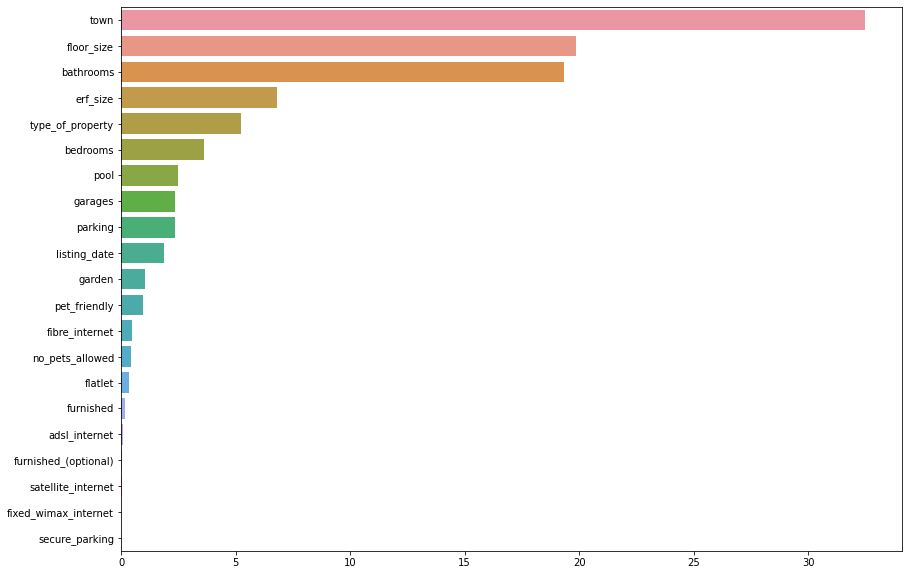

In [162]:
feature_importances = model.get_feature_importance()
feature_names = X_train.columns
x_=[]
y_=[]
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))
    x_.append(score)
    y_.append(name)
fig = plt.figure(figsize=(14,10))
sns.barplot(x=x_,y=y_,orient="h")

#### Constat :
<b> The variation of these characteristics influences the output the most. </b><br>
Thus, those features made the most contribution to the final result: (threshold : 1.0)
- town
- floor_size
- bathrooms
- erf_size
- type_of_property
- bedrooms

- pool
- garages
- parking
- listing_date
- garden
- pet_friendly
- fibre_internet



### Cross validation with cross_validate of scikit-learn (can't use when there is categorical features)

Concatenate val and train set for cross validation apply

In [163]:
X_train_val = X_val.append(X_train)
y_train_val = y_val.append(y_train)

### Cross validation implemented by cat boost

In [164]:
cv_params = model.get_params()
cv_params.update({
    'loss_function': 'RMSE'
})
cv_data = cv(
    Pool( X_train_val, y_train_val, cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 14.5724098	test: 14.5725330	best: 14.5725330 (0)
1:	learn: 14.1412292	test: 14.1414894	best: 14.1414894 (1)
2:	learn: 13.7219066	test: 13.7221689	best: 13.7221689 (2)
3:	learn: 13.3149915	test: 13.3155556	best: 13.3155556 (3)
4:	learn: 12.9218382	test: 12.9227966	best: 12.9227966 (4)
5:	learn: 12.5406175	test: 12.5422260	best: 12.5422260 (5)
6:	learn: 12.1686166	test: 12.1698729	best: 12.1698729 (6)
7:	learn: 11.8081125	test: 11.8096641	best: 11.8096641 (7)
8:	learn: 11.4593403	test: 11.4617916	best: 11.4617916 (8)
9:	learn: 11.1220508	test: 11.1243937	best: 11.1243937 (9)
10:	learn: 10.7948191	test: 10.7978439	best: 10.7978439 (10)
11:	learn: 10.4771462	test: 10.4802681	best: 10.4802681 (11)
12:	learn: 10.1713613	test: 10.1748606	best: 10.1748606 (12)
13:	learn: 9.8721218	test: 9.8761973	best: 9.8761973 (13)
14:	learn: 9.5824820	test: 9.5868242	best: 9.5868242 (14)
15:	learn: 9.3021342	test: 9.3069141	best: 9.3069141 (15)
16:	learn: 9.0299213	test: 9.0354252	best: 9.0354252 

145:	learn: 0.5038571	test: 0.5241144	best: 0.5241144 (145)
146:	learn: 0.5002985	test: 0.5205370	best: 0.5205370 (146)
147:	learn: 0.4968677	test: 0.5170124	best: 0.5170124 (147)
148:	learn: 0.4937328	test: 0.5138432	best: 0.5138432 (148)
149:	learn: 0.4906611	test: 0.5106031	best: 0.5106031 (149)
150:	learn: 0.4876140	test: 0.5073682	best: 0.5073682 (150)
151:	learn: 0.4849017	test: 0.5045589	best: 0.5045589 (151)
152:	learn: 0.4821814	test: 0.5019366	best: 0.5019366 (152)
153:	learn: 0.4797752	test: 0.4993019	best: 0.4993019 (153)
154:	learn: 0.4771920	test: 0.4965457	best: 0.4965457 (154)
155:	learn: 0.4747477	test: 0.4939117	best: 0.4939117 (155)
156:	learn: 0.4725776	test: 0.4916221	best: 0.4916221 (156)
157:	learn: 0.4704173	test: 0.4894780	best: 0.4894780 (157)
158:	learn: 0.4681649	test: 0.4872023	best: 0.4872023 (158)
159:	learn: 0.4660093	test: 0.4849859	best: 0.4849859 (159)
160:	learn: 0.4640318	test: 0.4830462	best: 0.4830462 (160)
161:	learn: 0.4620816	test: 0.4809714	be

420:	learn: 0.3576143	test: 0.3851558	best: 0.3851558 (420)
421:	learn: 0.3574240	test: 0.3850636	best: 0.3850636 (421)
422:	learn: 0.3572924	test: 0.3849718	best: 0.3849718 (422)
423:	learn: 0.3571501	test: 0.3848999	best: 0.3848999 (423)
424:	learn: 0.3569633	test: 0.3848258	best: 0.3848258 (424)
425:	learn: 0.3568268	test: 0.3846981	best: 0.3846981 (425)
426:	learn: 0.3566311	test: 0.3846166	best: 0.3846166 (426)
427:	learn: 0.3564491	test: 0.3845100	best: 0.3845100 (427)
428:	learn: 0.3563766	test: 0.3844494	best: 0.3844494 (428)
429:	learn: 0.3561987	test: 0.3843458	best: 0.3843458 (429)
430:	learn: 0.3559520	test: 0.3842261	best: 0.3842261 (430)
431:	learn: 0.3557926	test: 0.3841618	best: 0.3841618 (431)
432:	learn: 0.3556879	test: 0.3840971	best: 0.3840971 (432)
433:	learn: 0.3556080	test: 0.3840330	best: 0.3840330 (433)
434:	learn: 0.3555275	test: 0.3839980	best: 0.3839980 (434)
435:	learn: 0.3553979	test: 0.3838953	best: 0.3838953 (435)
436:	learn: 0.3552264	test: 0.3838706	be

660:	learn: 0.3268136	test: 0.3686113	best: 0.3686113 (660)
661:	learn: 0.3266878	test: 0.3685641	best: 0.3685641 (661)
662:	learn: 0.3266261	test: 0.3685584	best: 0.3685584 (662)
663:	learn: 0.3265568	test: 0.3685314	best: 0.3685314 (663)
664:	learn: 0.3263740	test: 0.3683879	best: 0.3683879 (664)
665:	learn: 0.3262497	test: 0.3682693	best: 0.3682693 (665)
666:	learn: 0.3261795	test: 0.3682523	best: 0.3682523 (666)
667:	learn: 0.3260240	test: 0.3680671	best: 0.3680671 (667)
668:	learn: 0.3258824	test: 0.3680337	best: 0.3680337 (668)
669:	learn: 0.3257995	test: 0.3679712	best: 0.3679712 (669)
670:	learn: 0.3256550	test: 0.3678942	best: 0.3678942 (670)
671:	learn: 0.3256171	test: 0.3678596	best: 0.3678596 (671)
672:	learn: 0.3255587	test: 0.3678360	best: 0.3678360 (672)
673:	learn: 0.3254413	test: 0.3677945	best: 0.3677945 (673)
674:	learn: 0.3253221	test: 0.3677564	best: 0.3677564 (674)
675:	learn: 0.3252311	test: 0.3677279	best: 0.3677279 (675)
676:	learn: 0.3251752	test: 0.3677166	be

961:	learn: 0.2987834	test: 0.3567804	best: 0.3567804 (961)
962:	learn: 0.2987124	test: 0.3567685	best: 0.3567685 (962)
963:	learn: 0.2986388	test: 0.3567383	best: 0.3567383 (963)
964:	learn: 0.2985316	test: 0.3566524	best: 0.3566524 (964)
965:	learn: 0.2983791	test: 0.3565485	best: 0.3565485 (965)
966:	learn: 0.2982898	test: 0.3564947	best: 0.3564947 (966)
967:	learn: 0.2982037	test: 0.3564807	best: 0.3564807 (967)
968:	learn: 0.2981650	test: 0.3564601	best: 0.3564601 (968)
969:	learn: 0.2981306	test: 0.3564673	best: 0.3564601 (968)
970:	learn: 0.2980220	test: 0.3563922	best: 0.3563922 (970)
971:	learn: 0.2979580	test: 0.3563613	best: 0.3563613 (971)
972:	learn: 0.2979039	test: 0.3563255	best: 0.3563255 (972)
973:	learn: 0.2977505	test: 0.3562401	best: 0.3562401 (973)
974:	learn: 0.2976814	test: 0.3562444	best: 0.3562401 (973)
975:	learn: 0.2975715	test: 0.3561727	best: 0.3561727 (975)
976:	learn: 0.2975035	test: 0.3561358	best: 0.3561358 (976)
977:	learn: 0.2974414	test: 0.3561302	be

1109:	learn: 0.2876788	test: 0.3530128	best: 0.3530113 (1108)
1110:	learn: 0.2876214	test: 0.3529927	best: 0.3529927 (1110)
1111:	learn: 0.2875204	test: 0.3529644	best: 0.3529644 (1111)
1112:	learn: 0.2874603	test: 0.3529515	best: 0.3529515 (1112)
1113:	learn: 0.2874082	test: 0.3529565	best: 0.3529515 (1112)
1114:	learn: 0.2873370	test: 0.3529368	best: 0.3529368 (1114)
1115:	learn: 0.2872508	test: 0.3529189	best: 0.3529189 (1115)
1116:	learn: 0.2871964	test: 0.3529083	best: 0.3529083 (1116)
1117:	learn: 0.2871264	test: 0.3528934	best: 0.3528934 (1117)
1118:	learn: 0.2870974	test: 0.3528871	best: 0.3528871 (1118)
1119:	learn: 0.2870518	test: 0.3528650	best: 0.3528650 (1119)
1120:	learn: 0.2869429	test: 0.3528191	best: 0.3528191 (1120)
1121:	learn: 0.2868715	test: 0.3528152	best: 0.3528152 (1121)
1122:	learn: 0.2867888	test: 0.3528068	best: 0.3528068 (1122)
1123:	learn: 0.2866964	test: 0.3527519	best: 0.3527519 (1123)
1124:	learn: 0.2866207	test: 0.3526975	best: 0.3526975 (1124)
1125:	le

1268:	learn: 0.2780039	test: 0.3499493	best: 0.3499493 (1268)
1269:	learn: 0.2779200	test: 0.3499299	best: 0.3499299 (1269)
1270:	learn: 0.2778251	test: 0.3498771	best: 0.3498771 (1270)
1271:	learn: 0.2777614	test: 0.3498620	best: 0.3498620 (1271)
1272:	learn: 0.2777259	test: 0.3498566	best: 0.3498566 (1272)
1273:	learn: 0.2776918	test: 0.3498334	best: 0.3498334 (1273)
1274:	learn: 0.2776731	test: 0.3498221	best: 0.3498221 (1274)
1275:	learn: 0.2776025	test: 0.3498063	best: 0.3498063 (1275)
1276:	learn: 0.2775358	test: 0.3497791	best: 0.3497791 (1276)
1277:	learn: 0.2774822	test: 0.3497764	best: 0.3497764 (1277)
1278:	learn: 0.2774392	test: 0.3497647	best: 0.3497647 (1278)
1279:	learn: 0.2773824	test: 0.3497689	best: 0.3497647 (1278)
1280:	learn: 0.2773471	test: 0.3497586	best: 0.3497586 (1280)
1281:	learn: 0.2772985	test: 0.3497605	best: 0.3497586 (1280)
1282:	learn: 0.2772616	test: 0.3497353	best: 0.3497353 (1282)
1283:	learn: 0.2771881	test: 0.3497298	best: 0.3497298 (1283)
1284:	le

1452:	learn: 0.2682714	test: 0.3473225	best: 0.3473114 (1449)
1453:	learn: 0.2682072	test: 0.3473008	best: 0.3473008 (1453)
1454:	learn: 0.2681696	test: 0.3473083	best: 0.3473008 (1453)
1455:	learn: 0.2681388	test: 0.3472817	best: 0.3472817 (1455)
1456:	learn: 0.2681117	test: 0.3472842	best: 0.3472817 (1455)
1457:	learn: 0.2680619	test: 0.3472579	best: 0.3472579 (1457)
1458:	learn: 0.2680233	test: 0.3472494	best: 0.3472494 (1458)	total: 24s	remaining: 58.3s
1459:	learn: 0.2679748	test: 0.3472408	best: 0.3472408 (1459)
1460:	learn: 0.2679389	test: 0.3472431	best: 0.3472408 (1459)
1461:	learn: 0.2678997	test: 0.3472484	best: 0.3472408 (1459)
1462:	learn: 0.2678543	test: 0.3472392	best: 0.3472392 (1462)
1463:	learn: 0.2678033	test: 0.3472440	best: 0.3472392 (1462)
1464:	learn: 0.2677679	test: 0.3472389	best: 0.3472389 (1464)
1465:	learn: 0.2676999	test: 0.3472172	best: 0.3472172 (1465)
1466:	learn: 0.2676439	test: 0.3472057	best: 0.3472057 (1466)
1467:	learn: 0.2676110	test: 0.3471994	bes

1616:	learn: 0.2607991	test: 0.3458896	best: 0.3458896 (1616)
1617:	learn: 0.2607442	test: 0.3458873	best: 0.3458873 (1617)
1618:	learn: 0.2606886	test: 0.3458879	best: 0.3458873 (1617)
1619:	learn: 0.2606583	test: 0.3458761	best: 0.3458761 (1619)
1620:	learn: 0.2605989	test: 0.3458807	best: 0.3458761 (1619)
1621:	learn: 0.2605531	test: 0.3458992	best: 0.3458761 (1619)
1622:	learn: 0.2605103	test: 0.3459061	best: 0.3458761 (1619)
1623:	learn: 0.2604833	test: 0.3459029	best: 0.3458761 (1619)
1624:	learn: 0.2604191	test: 0.3458867	best: 0.3458761 (1619)
1625:	learn: 0.2603722	test: 0.3458830	best: 0.3458761 (1619)
1626:	learn: 0.2603340	test: 0.3458706	best: 0.3458706 (1626)
1627:	learn: 0.2603047	test: 0.3458689	best: 0.3458689 (1627)
1628:	learn: 0.2602645	test: 0.3458358	best: 0.3458358 (1628)
1629:	learn: 0.2602129	test: 0.3458321	best: 0.3458321 (1629)
1630:	learn: 0.2601578	test: 0.3458211	best: 0.3458211 (1630)
1631:	learn: 0.2601230	test: 0.3458153	best: 0.3458153 (1631)
1632:	le

1757:	learn: 0.2552327	test: 0.3448254	best: 0.3448218 (1756)
1758:	learn: 0.2551905	test: 0.3448102	best: 0.3448102 (1758)
1759:	learn: 0.2551517	test: 0.3448063	best: 0.3448063 (1759)
1760:	learn: 0.2551105	test: 0.3448028	best: 0.3448028 (1760)
1761:	learn: 0.2550740	test: 0.3447937	best: 0.3447937 (1761)
1762:	learn: 0.2550380	test: 0.3447883	best: 0.3447883 (1762)
1763:	learn: 0.2550029	test: 0.3447829	best: 0.3447829 (1763)
1764:	learn: 0.2549785	test: 0.3447765	best: 0.3447765 (1764)
1765:	learn: 0.2549364	test: 0.3447746	best: 0.3447746 (1765)
1766:	learn: 0.2548937	test: 0.3447697	best: 0.3447697 (1766)
1767:	learn: 0.2548495	test: 0.3447685	best: 0.3447685 (1767)
1768:	learn: 0.2548254	test: 0.3447623	best: 0.3447623 (1768)
1769:	learn: 0.2548071	test: 0.3447608	best: 0.3447608 (1769)
1770:	learn: 0.2547800	test: 0.3447463	best: 0.3447463 (1770)
1771:	learn: 0.2547503	test: 0.3447472	best: 0.3447463 (1770)
1772:	learn: 0.2547021	test: 0.3447443	best: 0.3447443 (1772)
1773:	le

1910:	learn: 0.2495286	test: 0.3437727	best: 0.3437575 (1906)
1911:	learn: 0.2494904	test: 0.3437598	best: 0.3437575 (1906)
1912:	learn: 0.2494652	test: 0.3437579	best: 0.3437575 (1906)
1913:	learn: 0.2494332	test: 0.3437523	best: 0.3437523 (1913)
1914:	learn: 0.2494073	test: 0.3437484	best: 0.3437484 (1914)
1915:	learn: 0.2493760	test: 0.3437376	best: 0.3437376 (1915)
1916:	learn: 0.2493430	test: 0.3437356	best: 0.3437356 (1916)
1917:	learn: 0.2493176	test: 0.3437156	best: 0.3437156 (1917)
1918:	learn: 0.2492728	test: 0.3437033	best: 0.3437033 (1918)
1919:	learn: 0.2492022	test: 0.3436872	best: 0.3436872 (1919)
1920:	learn: 0.2491402	test: 0.3436774	best: 0.3436774 (1920)
1921:	learn: 0.2491012	test: 0.3436832	best: 0.3436774 (1920)
1922:	learn: 0.2490561	test: 0.3436840	best: 0.3436774 (1920)
1923:	learn: 0.2490172	test: 0.3436775	best: 0.3436774 (1920)
1924:	learn: 0.2489625	test: 0.3436880	best: 0.3436774 (1920)
1925:	learn: 0.2489105	test: 0.3436927	best: 0.3436774 (1920)
1926:	le

2085:	learn: 0.2429816	test: 0.3427550	best: 0.3427550 (2085)
2086:	learn: 0.2429598	test: 0.3427540	best: 0.3427540 (2086)
2087:	learn: 0.2429255	test: 0.3427347	best: 0.3427347 (2087)
2088:	learn: 0.2429072	test: 0.3427411	best: 0.3427347 (2087)
2089:	learn: 0.2428818	test: 0.3427354	best: 0.3427347 (2087)
2090:	learn: 0.2428562	test: 0.3427272	best: 0.3427272 (2090)
2091:	learn: 0.2428338	test: 0.3427337	best: 0.3427272 (2090)
2092:	learn: 0.2428145	test: 0.3427248	best: 0.3427248 (2092)
2093:	learn: 0.2427898	test: 0.3427231	best: 0.3427231 (2093)
2094:	learn: 0.2427438	test: 0.3426844	best: 0.3426844 (2094)
2095:	learn: 0.2427226	test: 0.3426820	best: 0.3426820 (2095)
2096:	learn: 0.2426856	test: 0.3426784	best: 0.3426784 (2096)
2097:	learn: 0.2426617	test: 0.3426700	best: 0.3426700 (2097)
2098:	learn: 0.2426098	test: 0.3426752	best: 0.3426700 (2097)
2099:	learn: 0.2426081	test: 0.3426696	best: 0.3426696 (2099)
2100:	learn: 0.2425552	test: 0.3426729	best: 0.3426696 (2099)
2101:	le

2276:	learn: 0.2367240	test: 0.3418859	best: 0.3418859 (2276)
2277:	learn: 0.2366966	test: 0.3418832	best: 0.3418832 (2277)
2278:	learn: 0.2366746	test: 0.3418757	best: 0.3418757 (2278)
2279:	learn: 0.2366442	test: 0.3418689	best: 0.3418689 (2279)
2280:	learn: 0.2366234	test: 0.3418680	best: 0.3418680 (2280)
2281:	learn: 0.2365892	test: 0.3418585	best: 0.3418585 (2281)
2282:	learn: 0.2365430	test: 0.3418686	best: 0.3418585 (2281)
2283:	learn: 0.2365234	test: 0.3418691	best: 0.3418585 (2281)
2284:	learn: 0.2364930	test: 0.3418561	best: 0.3418561 (2284)
2285:	learn: 0.2364775	test: 0.3418511	best: 0.3418511 (2285)
2286:	learn: 0.2364476	test: 0.3418321	best: 0.3418321 (2286)
2287:	learn: 0.2364277	test: 0.3418304	best: 0.3418304 (2287)
2288:	learn: 0.2363989	test: 0.3418345	best: 0.3418304 (2287)
2289:	learn: 0.2363613	test: 0.3418096	best: 0.3418096 (2289)
2290:	learn: 0.2363293	test: 0.3417936	best: 0.3417936 (2290)
2291:	learn: 0.2362936	test: 0.3417972	best: 0.3417936 (2290)
2292:	le

2495:	learn: 0.2299592	test: 0.3410635	best: 0.3410539 (2493)
2496:	learn: 0.2299298	test: 0.3410629	best: 0.3410539 (2493)
2497:	learn: 0.2298941	test: 0.3410517	best: 0.3410517 (2497)
2498:	learn: 0.2298745	test: 0.3410383	best: 0.3410383 (2498)
2499:	learn: 0.2298537	test: 0.3410461	best: 0.3410383 (2498)
2500:	learn: 0.2297955	test: 0.3410340	best: 0.3410340 (2500)
2501:	learn: 0.2297641	test: 0.3410323	best: 0.3410323 (2501)
2502:	learn: 0.2297221	test: 0.3410261	best: 0.3410261 (2502)
2503:	learn: 0.2297062	test: 0.3410215	best: 0.3410215 (2503)
2504:	learn: 0.2296688	test: 0.3410110	best: 0.3410110 (2504)
2505:	learn: 0.2296311	test: 0.3410026	best: 0.3410026 (2505)
2506:	learn: 0.2296216	test: 0.3410085	best: 0.3410026 (2505)
2507:	learn: 0.2295967	test: 0.3410103	best: 0.3410026 (2505)
2508:	learn: 0.2295682	test: 0.3410160	best: 0.3410026 (2505)
2509:	learn: 0.2295538	test: 0.3410152	best: 0.3410026 (2505)
2510:	learn: 0.2295439	test: 0.3410182	best: 0.3410026 (2505)
2511:	le

2709:	learn: 0.2237764	test: 0.3404964	best: 0.3404964 (2709)
2710:	learn: 0.2237496	test: 0.3404898	best: 0.3404898 (2710)
2711:	learn: 0.2237311	test: 0.3404837	best: 0.3404837 (2711)
2712:	learn: 0.2237196	test: 0.3404880	best: 0.3404837 (2711)
2713:	learn: 0.2237077	test: 0.3404840	best: 0.3404837 (2711)
2714:	learn: 0.2236780	test: 0.3404857	best: 0.3404837 (2711)
2715:	learn: 0.2236523	test: 0.3404747	best: 0.3404747 (2715)
2716:	learn: 0.2236304	test: 0.3404754	best: 0.3404747 (2715)
2717:	learn: 0.2236020	test: 0.3404720	best: 0.3404720 (2717)
2718:	learn: 0.2235546	test: 0.3404570	best: 0.3404570 (2718)
2719:	learn: 0.2235209	test: 0.3404575	best: 0.3404570 (2718)
2720:	learn: 0.2234879	test: 0.3404522	best: 0.3404522 (2720)
2721:	learn: 0.2234566	test: 0.3404468	best: 0.3404468 (2721)
2722:	learn: 0.2234126	test: 0.3404314	best: 0.3404314 (2722)
2723:	learn: 0.2233786	test: 0.3404372	best: 0.3404314 (2722)
2724:	learn: 0.2233555	test: 0.3404416	best: 0.3404314 (2722)
2725:	le

2875:	learn: 0.2189897	test: 0.3400942	best: 0.3400850 (2873)
2876:	learn: 0.2189583	test: 0.3400835	best: 0.3400835 (2876)
2877:	learn: 0.2189229	test: 0.3400743	best: 0.3400743 (2877)
2878:	learn: 0.2188998	test: 0.3400714	best: 0.3400714 (2878)
2879:	learn: 0.2188815	test: 0.3400788	best: 0.3400714 (2878)
2880:	learn: 0.2188610	test: 0.3400943	best: 0.3400714 (2878)
2881:	learn: 0.2188382	test: 0.3401031	best: 0.3400714 (2878)
2882:	learn: 0.2188223	test: 0.3401130	best: 0.3400714 (2878)
2883:	learn: 0.2187839	test: 0.3400971	best: 0.3400714 (2878)
2884:	learn: 0.2187440	test: 0.3400929	best: 0.3400714 (2878)
2885:	learn: 0.2187288	test: 0.3401033	best: 0.3400714 (2878)
2886:	learn: 0.2186946	test: 0.3401073	best: 0.3400714 (2878)
2887:	learn: 0.2186779	test: 0.3401050	best: 0.3400714 (2878)
2888:	learn: 0.2186523	test: 0.3401033	best: 0.3400714 (2878)
2889:	learn: 0.2186088	test: 0.3400972	best: 0.3400714 (2878)
2890:	learn: 0.2185835	test: 0.3400911	best: 0.3400714 (2878)
2891:	le

3027:	learn: 0.2152090	test: 0.3398721	best: 0.3398721 (3027)
3028:	learn: 0.2151938	test: 0.3398826	best: 0.3398721 (3027)
3029:	learn: 0.2151786	test: 0.3398785	best: 0.3398721 (3027)
3030:	learn: 0.2151512	test: 0.3398811	best: 0.3398721 (3027)
3031:	learn: 0.2151126	test: 0.3398864	best: 0.3398721 (3027)
3032:	learn: 0.2150894	test: 0.3398849	best: 0.3398721 (3027)
3033:	learn: 0.2150626	test: 0.3398920	best: 0.3398721 (3027)
3034:	learn: 0.2150184	test: 0.3398965	best: 0.3398721 (3027)
3035:	learn: 0.2149841	test: 0.3399037	best: 0.3398721 (3027)
3036:	learn: 0.2149586	test: 0.3399019	best: 0.3398721 (3027)
3037:	learn: 0.2149379	test: 0.3399093	best: 0.3398721 (3027)
3038:	learn: 0.2149005	test: 0.3399030	best: 0.3398721 (3027)
3039:	learn: 0.2148965	test: 0.3399079	best: 0.3398721 (3027)
3040:	learn: 0.2148623	test: 0.3398982	best: 0.3398721 (3027)
3041:	learn: 0.2148355	test: 0.3399008	best: 0.3398721 (3027)
3042:	learn: 0.2148198	test: 0.3398945	best: 0.3398721 (3027)
3043:	le

3175:	learn: 0.2116194	test: 0.3396425	best: 0.3396425 (3175)
3176:	learn: 0.2115968	test: 0.3396617	best: 0.3396425 (3175)
3177:	learn: 0.2115554	test: 0.3396548	best: 0.3396425 (3175)
3178:	learn: 0.2115382	test: 0.3396597	best: 0.3396425 (3175)
3179:	learn: 0.2115000	test: 0.3396604	best: 0.3396425 (3175)
3180:	learn: 0.2114774	test: 0.3396562	best: 0.3396425 (3175)
3181:	learn: 0.2114525	test: 0.3396524	best: 0.3396425 (3175)
3182:	learn: 0.2114425	test: 0.3396483	best: 0.3396425 (3175)
3183:	learn: 0.2114157	test: 0.3396568	best: 0.3396425 (3175)
3184:	learn: 0.2113899	test: 0.3396565	best: 0.3396425 (3175)
3185:	learn: 0.2113669	test: 0.3396655	best: 0.3396425 (3175)
3186:	learn: 0.2113500	test: 0.3396684	best: 0.3396425 (3175)
3187:	learn: 0.2113258	test: 0.3396615	best: 0.3396425 (3175)
3188:	learn: 0.2112925	test: 0.3396638	best: 0.3396425 (3175)
3189:	learn: 0.2112725	test: 0.3396666	best: 0.3396425 (3175)
3190:	learn: 0.2112585	test: 0.3396694	best: 0.3396425 (3175)
3191:	le

3393:	learn: 0.2066491	test: 0.3393572	best: 0.3393440 (3386)
3394:	learn: 0.2066304	test: 0.3393604	best: 0.3393440 (3386)
3395:	learn: 0.2065981	test: 0.3393583	best: 0.3393440 (3386)
3396:	learn: 0.2065875	test: 0.3393554	best: 0.3393440 (3386)
3397:	learn: 0.2065764	test: 0.3393575	best: 0.3393440 (3386)
3398:	learn: 0.2065542	test: 0.3393549	best: 0.3393440 (3386)
3399:	learn: 0.2065238	test: 0.3393441	best: 0.3393440 (3386)
3400:	learn: 0.2064985	test: 0.3393458	best: 0.3393440 (3386)
3401:	learn: 0.2064763	test: 0.3393461	best: 0.3393440 (3386)
3402:	learn: 0.2064635	test: 0.3393475	best: 0.3393440 (3386)
3403:	learn: 0.2064399	test: 0.3393432	best: 0.3393432 (3403)
3404:	learn: 0.2064099	test: 0.3393361	best: 0.3393361 (3404)
3405:	learn: 0.2063870	test: 0.3393385	best: 0.3393361 (3404)
3406:	learn: 0.2063646	test: 0.3393407	best: 0.3393361 (3404)
3407:	learn: 0.2063439	test: 0.3393497	best: 0.3393361 (3404)
3408:	learn: 0.2063334	test: 0.3393566	best: 0.3393361 (3404)
3409:	le

3719:	learn: 0.1999027	test: 0.3390088	best: 0.3390014 (3703)
3720:	learn: 0.1998823	test: 0.3390059	best: 0.3390014 (3703)
3721:	learn: 0.1998660	test: 0.3389981	best: 0.3389981 (3721)
3722:	learn: 0.1998325	test: 0.3389725	best: 0.3389725 (3722)
3723:	learn: 0.1998208	test: 0.3389718	best: 0.3389718 (3723)
3724:	learn: 0.1997920	test: 0.3389664	best: 0.3389664 (3724)
3725:	learn: 0.1997667	test: 0.3389688	best: 0.3389664 (3724)
3726:	learn: 0.1997427	test: 0.3389624	best: 0.3389624 (3726)
3727:	learn: 0.1997253	test: 0.3389587	best: 0.3389587 (3727)
3728:	learn: 0.1997075	test: 0.3389529	best: 0.3389529 (3728)	total: 1m 2s	remaining: 21.2s
3729:	learn: 0.1996864	test: 0.3389575	best: 0.3389529 (3728)
3730:	learn: 0.1996680	test: 0.3389513	best: 0.3389513 (3730)
3731:	learn: 0.1996602	test: 0.3389574	best: 0.3389513 (3730)
3732:	learn: 0.1996238	test: 0.3389613	best: 0.3389513 (3730)
3733:	learn: 0.1995943	test: 0.3389753	best: 0.3389513 (3730)
3734:	learn: 0.1995715	test: 0.3389733	b

3977:	learn: 0.1947915	test: 0.3389165	best: 0.3389064 (3969)
3978:	learn: 0.1947684	test: 0.3389187	best: 0.3389064 (3969)
3979:	learn: 0.1947444	test: 0.3389089	best: 0.3389064 (3969)
3980:	learn: 0.1947342	test: 0.3389220	best: 0.3389064 (3969)
3981:	learn: 0.1947121	test: 0.3389224	best: 0.3389064 (3969)
3982:	learn: 0.1946928	test: 0.3389266	best: 0.3389064 (3969)
3983:	learn: 0.1946644	test: 0.3389155	best: 0.3389064 (3969)
3984:	learn: 0.1946243	test: 0.3389012	best: 0.3389012 (3984)
3985:	learn: 0.1946067	test: 0.3388986	best: 0.3388986 (3985)
3986:	learn: 0.1945881	test: 0.3389065	best: 0.3388986 (3985)
3987:	learn: 0.1945694	test: 0.3389064	best: 0.3388986 (3985)
3988:	learn: 0.1945466	test: 0.3389033	best: 0.3388986 (3985)
3989:	learn: 0.1945154	test: 0.3389034	best: 0.3388986 (3985)
3990:	learn: 0.1945022	test: 0.3389019	best: 0.3388986 (3985)
3991:	learn: 0.1944724	test: 0.3389081	best: 0.3388986 (3985)
3992:	learn: 0.1944611	test: 0.3389113	best: 0.3388986 (3985)
3993:	le

4123:	learn: 0.1920611	test: 0.3389129	best: 0.3388801 (4019)
4124:	learn: 0.1920423	test: 0.3389120	best: 0.3388801 (4019)
4125:	learn: 0.1920238	test: 0.3389143	best: 0.3388801 (4019)
4126:	learn: 0.1920141	test: 0.3389166	best: 0.3388801 (4019)
4127:	learn: 0.1919906	test: 0.3389146	best: 0.3388801 (4019)
4128:	learn: 0.1919809	test: 0.3389139	best: 0.3388801 (4019)
4129:	learn: 0.1919642	test: 0.3389100	best: 0.3388801 (4019)
4130:	learn: 0.1919451	test: 0.3389102	best: 0.3388801 (4019)
4131:	learn: 0.1919265	test: 0.3389048	best: 0.3388801 (4019)
4132:	learn: 0.1919146	test: 0.3389066	best: 0.3388801 (4019)
4133:	learn: 0.1919064	test: 0.3389010	best: 0.3388801 (4019)
4134:	learn: 0.1918920	test: 0.3388970	best: 0.3388801 (4019)
4135:	learn: 0.1918834	test: 0.3388954	best: 0.3388801 (4019)
4136:	learn: 0.1918796	test: 0.3388973	best: 0.3388801 (4019)
4137:	learn: 0.1918690	test: 0.3388955	best: 0.3388801 (4019)
4138:	learn: 0.1918564	test: 0.3388942	best: 0.3388801 (4019)
4139:	le

4302:	learn: 0.1890072	test: 0.3386178	best: 0.3385758 (4290)
4303:	learn: 0.1889942	test: 0.3386223	best: 0.3385758 (4290)
4304:	learn: 0.1889799	test: 0.3386233	best: 0.3385758 (4290)
4305:	learn: 0.1889495	test: 0.3386227	best: 0.3385758 (4290)
4306:	learn: 0.1889290	test: 0.3386261	best: 0.3385758 (4290)
4307:	learn: 0.1889130	test: 0.3386318	best: 0.3385758 (4290)
4308:	learn: 0.1888968	test: 0.3386354	best: 0.3385758 (4290)
4309:	learn: 0.1888703	test: 0.3386384	best: 0.3385758 (4290)
4310:	learn: 0.1888592	test: 0.3386345	best: 0.3385758 (4290)
4311:	learn: 0.1888474	test: 0.3386357	best: 0.3385758 (4290)
4312:	learn: 0.1888366	test: 0.3386277	best: 0.3385758 (4290)
4313:	learn: 0.1888120	test: 0.3386349	best: 0.3385758 (4290)
4314:	learn: 0.1888020	test: 0.3386350	best: 0.3385758 (4290)
4315:	learn: 0.1887960	test: 0.3386364	best: 0.3385758 (4290)
4316:	learn: 0.1887508	test: 0.3386403	best: 0.3385758 (4290)
4317:	learn: 0.1887374	test: 0.3386459	best: 0.3385758 (4290)
4318:	le

4592:	learn: 0.1842778	test: 0.3385925	best: 0.3385246 (4512)
4593:	learn: 0.1842717	test: 0.3385981	best: 0.3385246 (4512)
4594:	learn: 0.1842593	test: 0.3385971	best: 0.3385246 (4512)
4595:	learn: 0.1842473	test: 0.3386037	best: 0.3385246 (4512)
4596:	learn: 0.1842398	test: 0.3386029	best: 0.3385246 (4512)
4597:	learn: 0.1842296	test: 0.3386120	best: 0.3385246 (4512)
4598:	learn: 0.1842055	test: 0.3386110	best: 0.3385246 (4512)
4599:	learn: 0.1841921	test: 0.3386111	best: 0.3385246 (4512)
4600:	learn: 0.1841826	test: 0.3386134	best: 0.3385246 (4512)
4601:	learn: 0.1841770	test: 0.3386145	best: 0.3385246 (4512)
4602:	learn: 0.1841658	test: 0.3386196	best: 0.3385246 (4512)
4603:	learn: 0.1841514	test: 0.3386194	best: 0.3385246 (4512)
4604:	learn: 0.1841450	test: 0.3386225	best: 0.3385246 (4512)
4605:	learn: 0.1841336	test: 0.3386292	best: 0.3385246 (4512)
4606:	learn: 0.1841120	test: 0.3386229	best: 0.3385246 (4512)
4607:	learn: 0.1840967	test: 0.3386234	best: 0.3385246 (4512)
4608:	le

4803:	learn: 0.1810676	test: 0.3386375	best: 0.3385246 (4512)
4804:	learn: 0.1810475	test: 0.3386342	best: 0.3385246 (4512)
4805:	learn: 0.1810320	test: 0.3386328	best: 0.3385246 (4512)
4806:	learn: 0.1810183	test: 0.3386386	best: 0.3385246 (4512)
4807:	learn: 0.1810044	test: 0.3386450	best: 0.3385246 (4512)
4808:	learn: 0.1809928	test: 0.3386467	best: 0.3385246 (4512)
4809:	learn: 0.1809822	test: 0.3386468	best: 0.3385246 (4512)
4810:	learn: 0.1809713	test: 0.3386484	best: 0.3385246 (4512)
4811:	learn: 0.1809634	test: 0.3386522	best: 0.3385246 (4512)
4812:	learn: 0.1809509	test: 0.3386469	best: 0.3385246 (4512)
4813:	learn: 0.1809425	test: 0.3386520	best: 0.3385246 (4512)
4814:	learn: 0.1809377	test: 0.3386524	best: 0.3385246 (4512)
4815:	learn: 0.1809278	test: 0.3386542	best: 0.3385246 (4512)
4816:	learn: 0.1809178	test: 0.3386475	best: 0.3385246 (4512)
4817:	learn: 0.1809067	test: 0.3386525	best: 0.3385246 (4512)
4818:	learn: 0.1808876	test: 0.3386498	best: 0.3385246 (4512)
4819:	le

4955:	learn: 0.1788101	test: 0.3386316	best: 0.3385246 (4512)
4956:	learn: 0.1787993	test: 0.3386307	best: 0.3385246 (4512)
4957:	learn: 0.1787851	test: 0.3386337	best: 0.3385246 (4512)
4958:	learn: 0.1787775	test: 0.3386318	best: 0.3385246 (4512)
4959:	learn: 0.1787697	test: 0.3386327	best: 0.3385246 (4512)
4960:	learn: 0.1787518	test: 0.3386294	best: 0.3385246 (4512)
4961:	learn: 0.1787337	test: 0.3386334	best: 0.3385246 (4512)
4962:	learn: 0.1787177	test: 0.3386328	best: 0.3385246 (4512)
4963:	learn: 0.1787002	test: 0.3386380	best: 0.3385246 (4512)
4964:	learn: 0.1786858	test: 0.3386417	best: 0.3385246 (4512)
4965:	learn: 0.1786697	test: 0.3386444	best: 0.3385246 (4512)
4966:	learn: 0.1786600	test: 0.3386419	best: 0.3385246 (4512)
4967:	learn: 0.1786349	test: 0.3386558	best: 0.3385246 (4512)
4968:	learn: 0.1786258	test: 0.3386563	best: 0.3385246 (4512)
4969:	learn: 0.1786144	test: 0.3386577	best: 0.3385246 (4512)
4970:	learn: 0.1786088	test: 0.3386608	best: 0.3385246 (4512)
4971:	le

In [165]:
print('Best validation RMSE score: {:.2f}±{:.2f} on step {}'.format(
    np.min(cv_data['test-RMSE-mean']),
    cv_data['test-RMSE-std'][np.argmin(cv_data['test-RMSE-mean'])],
    np.argmin(cv_data['test-RMSE-mean'])
))

Best validation RMSE score: 0.34±0.00 on step 4512


In [166]:
print('Precise validation RMSE score: {}'.format(np.min(cv_data['test-RMSE-mean'])))

Precise validation RMSE score: 0.33852464102470087


#### Constat :
- The cross validation from catboost package show that the model doesn't performs as well as the RMSE on val set shows us.
- We get 0.33 in <b>"Precise validation RMSE score"</b> against 0.30 in single RMSE on validation set

## 2) hyperparameter tuning (using halving grid search)

In [168]:
import hyperopt

def hyperopt_objective(params):
    model = CatBoostRegressor(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=1000,
        random_seed=42,
        verbose=False,
        loss_function="RMSE",
    )
    
    cv_data = cv(
        Pool( X_train_val, y_train_val, cat_features=categorical_features_indices),
        model.get_params()
    )
    best_accuracy = np.max(cv_data['test-RMSE-mean'])
    
    return 1 - best_accuracy

from numpy.random import RandomState

params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-2, 5e-1),
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=RandomState(123)
)

print(best)

100%|██████████| 50/50 [15:43<00:00, 18.86s/trial, best loss: -13.849149212690323]
{'l2_leaf_reg': 3.0, 'learning_rate': 0.011450360042863232}


### Feature selection using the feature importance in (1)
We only keep the features with high contribution

In [169]:
data.columns

Index(['bathrooms', 'bedrooms', 'erf_size', 'floor_size', 'garages',
       'listing_date', 'pet_friendly', 'price', 'town', 'type_of_property',
       'garden', 'pool', 'secure_parking', 'parking', 'no_pets_allowed',
       'furnished', 'flatlet', 'fibre_internet', 'furnished_(optional)',
       'adsl_internet', 'satellite_internet', 'fixed_wimax_internet', 'split'],
      dtype='object')

In [170]:
to_keep = ['bathrooms', 'bedrooms', 'erf_size', 'floor_size', 'garages',
       'listing_date', 'pet_friendly', 'price', 'town', 'type_of_property',
       'garden', 'pool', 'parking','fibre_internet','split']

In [171]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data,"price",features_to_keep=to_keep)

train shape : (4751, 13)
val shape : (1030, 13)
test shape : (1033, 13)


In [186]:
model = CatBoostRegressor(loss_function='RMSE',iterations=5000,l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'] 
)
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_val, y_val),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8666902	test: 0.8392695	best: 0.8392695 (0)	total: 18.9ms	remaining: 1m 34s
1:	learn: 0.8611722	test: 0.8339933	best: 0.8339933 (1)	total: 21.4ms	remaining: 53.5s
2:	learn: 0.8556792	test: 0.8287792	best: 0.8287792 (2)	total: 24.3ms	remaining: 40.5s
3:	learn: 0.8502129	test: 0.8234558	best: 0.8234558 (3)	total: 26.3ms	remaining: 32.8s
4:	learn: 0.8447041	test: 0.8181494	best: 0.8181494 (4)	total: 28.5ms	remaining: 28.4s
5:	learn: 0.8393466	test: 0.8131042	best: 0.8131042 (5)	total: 30.2ms	remaining: 25.1s
6:	learn: 0.8339617	test: 0.8079494	best: 0.8079494 (6)	total: 31.9ms	remaining: 22.8s
7:	learn: 0.8289006	test: 0.8032395	best: 0.8032395 (7)	total: 34ms	remaining: 21.2s
8:	learn: 0.8237327	test: 0.7982714	best: 0.7982714 (8)	total: 36.1ms	remaining: 20s
9:	learn: 0.8185822	test: 0.7934139	best: 0.7934139 (9)	total: 37.7ms	remaining: 18.8s
10:	learn: 0.8136080	test: 0.7887077	best: 0.7887077 (10)	total: 39.3ms	remaining: 17.8s
11:	learn: 0.8087244	test: 0.7840492	best: 0

199:	learn: 0.4162081	test: 0.4084519	best: 0.4084519 (199)	total: 324ms	remaining: 7.78s
200:	learn: 0.4156831	test: 0.4080284	best: 0.4080284 (200)	total: 326ms	remaining: 7.78s
201:	learn: 0.4152179	test: 0.4075883	best: 0.4075883 (201)	total: 327ms	remaining: 7.77s
202:	learn: 0.4148987	test: 0.4071838	best: 0.4071838 (202)	total: 329ms	remaining: 7.76s
203:	learn: 0.4144206	test: 0.4067249	best: 0.4067249 (203)	total: 330ms	remaining: 7.76s
204:	learn: 0.4139895	test: 0.4063562	best: 0.4063562 (204)	total: 332ms	remaining: 7.78s
205:	learn: 0.4135222	test: 0.4059219	best: 0.4059219 (205)	total: 334ms	remaining: 7.78s
206:	learn: 0.4130331	test: 0.4054999	best: 0.4054999 (206)	total: 336ms	remaining: 7.78s
207:	learn: 0.4126216	test: 0.4051618	best: 0.4051618 (207)	total: 338ms	remaining: 7.78s
208:	learn: 0.4121692	test: 0.4047950	best: 0.4047950 (208)	total: 340ms	remaining: 7.78s
209:	learn: 0.4116972	test: 0.4044420	best: 0.4044420 (209)	total: 341ms	remaining: 7.77s
210:	learn

304:	learn: 0.3846431	test: 0.3823015	best: 0.3823015 (304)	total: 497ms	remaining: 7.66s
305:	learn: 0.3844354	test: 0.3821237	best: 0.3821237 (305)	total: 499ms	remaining: 7.66s
306:	learn: 0.3841675	test: 0.3818721	best: 0.3818721 (306)	total: 501ms	remaining: 7.66s
307:	learn: 0.3840015	test: 0.3817437	best: 0.3817437 (307)	total: 502ms	remaining: 7.65s
308:	learn: 0.3838329	test: 0.3816745	best: 0.3816745 (308)	total: 505ms	remaining: 7.67s
309:	learn: 0.3836457	test: 0.3815061	best: 0.3815061 (309)	total: 507ms	remaining: 7.67s
310:	learn: 0.3834755	test: 0.3813732	best: 0.3813732 (310)	total: 508ms	remaining: 7.66s
311:	learn: 0.3833550	test: 0.3813425	best: 0.3813425 (311)	total: 510ms	remaining: 7.67s
312:	learn: 0.3832094	test: 0.3812405	best: 0.3812405 (312)	total: 512ms	remaining: 7.66s
313:	learn: 0.3830429	test: 0.3810943	best: 0.3810943 (313)	total: 514ms	remaining: 7.67s
314:	learn: 0.3828600	test: 0.3809520	best: 0.3809520 (314)	total: 515ms	remaining: 7.67s
315:	learn

412:	learn: 0.3699566	test: 0.3717587	best: 0.3717587 (412)	total: 668ms	remaining: 7.42s
413:	learn: 0.3699018	test: 0.3717096	best: 0.3717096 (413)	total: 669ms	remaining: 7.41s
414:	learn: 0.3697720	test: 0.3716218	best: 0.3716218 (414)	total: 670ms	remaining: 7.41s
415:	learn: 0.3696580	test: 0.3715397	best: 0.3715397 (415)	total: 672ms	remaining: 7.41s
416:	learn: 0.3695872	test: 0.3715024	best: 0.3715024 (416)	total: 674ms	remaining: 7.4s
417:	learn: 0.3694569	test: 0.3714205	best: 0.3714205 (417)	total: 675ms	remaining: 7.4s
418:	learn: 0.3693900	test: 0.3713660	best: 0.3713660 (418)	total: 678ms	remaining: 7.41s
419:	learn: 0.3692430	test: 0.3712584	best: 0.3712584 (419)	total: 682ms	remaining: 7.43s
420:	learn: 0.3691989	test: 0.3712475	best: 0.3712475 (420)	total: 683ms	remaining: 7.43s
421:	learn: 0.3691399	test: 0.3712155	best: 0.3712155 (421)	total: 684ms	remaining: 7.42s
422:	learn: 0.3690612	test: 0.3711613	best: 0.3711613 (422)	total: 686ms	remaining: 7.42s
423:	learn: 

521:	learn: 0.3600106	test: 0.3648597	best: 0.3648597 (521)	total: 835ms	remaining: 7.17s
522:	learn: 0.3599406	test: 0.3648240	best: 0.3648240 (522)	total: 837ms	remaining: 7.16s
523:	learn: 0.3598975	test: 0.3647820	best: 0.3647820 (523)	total: 839ms	remaining: 7.16s
524:	learn: 0.3598477	test: 0.3647689	best: 0.3647689 (524)	total: 841ms	remaining: 7.17s
525:	learn: 0.3598107	test: 0.3647666	best: 0.3647666 (525)	total: 843ms	remaining: 7.17s
526:	learn: 0.3597933	test: 0.3647671	best: 0.3647666 (525)	total: 844ms	remaining: 7.17s
527:	learn: 0.3597010	test: 0.3647286	best: 0.3647286 (527)	total: 847ms	remaining: 7.18s
528:	learn: 0.3595782	test: 0.3646545	best: 0.3646545 (528)	total: 849ms	remaining: 7.18s
529:	learn: 0.3595151	test: 0.3646240	best: 0.3646240 (529)	total: 851ms	remaining: 7.17s
530:	learn: 0.3594665	test: 0.3646123	best: 0.3646123 (530)	total: 853ms	remaining: 7.17s
531:	learn: 0.3594561	test: 0.3645999	best: 0.3645999 (531)	total: 853ms	remaining: 7.17s
532:	learn

630:	learn: 0.3522278	test: 0.3600595	best: 0.3600595 (630)	total: 1.01s	remaining: 6.97s
631:	learn: 0.3521446	test: 0.3600272	best: 0.3600272 (631)	total: 1.01s	remaining: 6.96s
632:	learn: 0.3521230	test: 0.3600255	best: 0.3600255 (632)	total: 1.01s	remaining: 6.96s
633:	learn: 0.3520547	test: 0.3600298	best: 0.3600255 (632)	total: 1.01s	remaining: 6.96s
634:	learn: 0.3520531	test: 0.3600306	best: 0.3600255 (632)	total: 1.01s	remaining: 6.95s
635:	learn: 0.3519769	test: 0.3600104	best: 0.3600104 (635)	total: 1.01s	remaining: 6.95s
636:	learn: 0.3518767	test: 0.3599399	best: 0.3599399 (636)	total: 1.01s	remaining: 6.95s
637:	learn: 0.3517370	test: 0.3598108	best: 0.3598108 (637)	total: 1.02s	remaining: 6.95s
638:	learn: 0.3517355	test: 0.3598116	best: 0.3598108 (637)	total: 1.02s	remaining: 6.94s
639:	learn: 0.3516694	test: 0.3597739	best: 0.3597739 (639)	total: 1.02s	remaining: 6.94s
640:	learn: 0.3515982	test: 0.3597198	best: 0.3597198 (640)	total: 1.02s	remaining: 6.94s
641:	learn

739:	learn: 0.3451464	test: 0.3557408	best: 0.3557408 (739)	total: 1.18s	remaining: 6.76s
740:	learn: 0.3451024	test: 0.3557589	best: 0.3557408 (739)	total: 1.18s	remaining: 6.76s
741:	learn: 0.3450681	test: 0.3557367	best: 0.3557367 (741)	total: 1.18s	remaining: 6.76s
742:	learn: 0.3450007	test: 0.3557192	best: 0.3557192 (742)	total: 1.18s	remaining: 6.76s
743:	learn: 0.3449629	test: 0.3556860	best: 0.3556860 (743)	total: 1.18s	remaining: 6.76s
744:	learn: 0.3449502	test: 0.3556720	best: 0.3556720 (744)	total: 1.18s	remaining: 6.75s
745:	learn: 0.3449021	test: 0.3556369	best: 0.3556369 (745)	total: 1.18s	remaining: 6.75s
746:	learn: 0.3448959	test: 0.3556332	best: 0.3556332 (746)	total: 1.19s	remaining: 6.75s
747:	learn: 0.3448562	test: 0.3556077	best: 0.3556077 (747)	total: 1.19s	remaining: 6.75s
748:	learn: 0.3448035	test: 0.3556032	best: 0.3556032 (748)	total: 1.19s	remaining: 6.75s
749:	learn: 0.3447402	test: 0.3555695	best: 0.3555695 (749)	total: 1.19s	remaining: 6.74s
750:	learn

849:	learn: 0.3389456	test: 0.3521430	best: 0.3521430 (849)	total: 1.34s	remaining: 6.56s
850:	learn: 0.3388954	test: 0.3520975	best: 0.3520975 (850)	total: 1.34s	remaining: 6.55s
851:	learn: 0.3388626	test: 0.3520865	best: 0.3520865 (851)	total: 1.35s	remaining: 6.55s
852:	learn: 0.3388183	test: 0.3520819	best: 0.3520819 (852)	total: 1.35s	remaining: 6.55s
853:	learn: 0.3387929	test: 0.3520826	best: 0.3520819 (852)	total: 1.35s	remaining: 6.55s
854:	learn: 0.3387779	test: 0.3521113	best: 0.3520819 (852)	total: 1.35s	remaining: 6.55s
855:	learn: 0.3387428	test: 0.3520956	best: 0.3520819 (852)	total: 1.35s	remaining: 6.55s
856:	learn: 0.3387164	test: 0.3520836	best: 0.3520819 (852)	total: 1.35s	remaining: 6.55s
857:	learn: 0.3386260	test: 0.3519972	best: 0.3519972 (857)	total: 1.36s	remaining: 6.55s
858:	learn: 0.3385668	test: 0.3519591	best: 0.3519591 (858)	total: 1.36s	remaining: 6.55s
859:	learn: 0.3385404	test: 0.3519517	best: 0.3519517 (859)	total: 1.36s	remaining: 6.55s
860:	learn

1010:	learn: 0.3309381	test: 0.3477552	best: 0.3477552 (1010)	total: 1.68s	remaining: 6.62s
1011:	learn: 0.3308802	test: 0.3477308	best: 0.3477308 (1011)	total: 1.68s	remaining: 6.63s
1012:	learn: 0.3308291	test: 0.3477065	best: 0.3477065 (1012)	total: 1.68s	remaining: 6.63s
1013:	learn: 0.3307508	test: 0.3476646	best: 0.3476646 (1013)	total: 1.69s	remaining: 6.63s
1014:	learn: 0.3306558	test: 0.3476156	best: 0.3476156 (1014)	total: 1.69s	remaining: 6.63s
1015:	learn: 0.3306219	test: 0.3475723	best: 0.3475723 (1015)	total: 1.69s	remaining: 6.63s
1016:	learn: 0.3305762	test: 0.3475306	best: 0.3475306 (1016)	total: 1.69s	remaining: 6.63s
1017:	learn: 0.3305224	test: 0.3474763	best: 0.3474763 (1017)	total: 1.7s	remaining: 6.63s
1018:	learn: 0.3304749	test: 0.3474553	best: 0.3474553 (1018)	total: 1.7s	remaining: 6.63s
1019:	learn: 0.3304577	test: 0.3474559	best: 0.3474553 (1018)	total: 1.7s	remaining: 6.64s
1020:	learn: 0.3303907	test: 0.3474052	best: 0.3474052 (1020)	total: 1.7s	remaining

1101:	learn: 0.3269357	test: 0.3458142	best: 0.3458023 (1100)	total: 1.84s	remaining: 6.52s
1102:	learn: 0.3268611	test: 0.3457728	best: 0.3457728 (1102)	total: 1.85s	remaining: 6.52s
1103:	learn: 0.3267737	test: 0.3456601	best: 0.3456601 (1103)	total: 1.85s	remaining: 6.52s
1104:	learn: 0.3267090	test: 0.3456225	best: 0.3456225 (1104)	total: 1.85s	remaining: 6.52s
1105:	learn: 0.3266752	test: 0.3456237	best: 0.3456225 (1104)	total: 1.85s	remaining: 6.52s
1106:	learn: 0.3266328	test: 0.3456166	best: 0.3456166 (1106)	total: 1.85s	remaining: 6.52s
1107:	learn: 0.3265674	test: 0.3456054	best: 0.3456054 (1107)	total: 1.85s	remaining: 6.51s
1108:	learn: 0.3265420	test: 0.3456098	best: 0.3456054 (1107)	total: 1.86s	remaining: 6.51s
1109:	learn: 0.3264886	test: 0.3455729	best: 0.3455729 (1109)	total: 1.86s	remaining: 6.51s
1110:	learn: 0.3264499	test: 0.3455527	best: 0.3455527 (1110)	total: 1.86s	remaining: 6.51s
1111:	learn: 0.3264116	test: 0.3455429	best: 0.3455429 (1111)	total: 1.86s	remai

1203:	learn: 0.3217328	test: 0.3430386	best: 0.3430386 (1203)	total: 2.01s	remaining: 6.33s
1204:	learn: 0.3217055	test: 0.3430343	best: 0.3430343 (1204)	total: 2.01s	remaining: 6.34s
1205:	learn: 0.3216536	test: 0.3430089	best: 0.3430089 (1205)	total: 2.01s	remaining: 6.34s
1206:	learn: 0.3215082	test: 0.3429153	best: 0.3429153 (1206)	total: 2.02s	remaining: 6.34s
1207:	learn: 0.3214452	test: 0.3428903	best: 0.3428903 (1207)	total: 2.02s	remaining: 6.34s
1208:	learn: 0.3213779	test: 0.3428570	best: 0.3428570 (1208)	total: 2.02s	remaining: 6.34s
1209:	learn: 0.3213357	test: 0.3428527	best: 0.3428527 (1209)	total: 2.03s	remaining: 6.35s
1210:	learn: 0.3212871	test: 0.3428237	best: 0.3428237 (1210)	total: 2.03s	remaining: 6.35s
1211:	learn: 0.3212312	test: 0.3427959	best: 0.3427959 (1211)	total: 2.03s	remaining: 6.34s
1212:	learn: 0.3211706	test: 0.3427529	best: 0.3427529 (1212)	total: 2.03s	remaining: 6.34s
1213:	learn: 0.3211363	test: 0.3427321	best: 0.3427321 (1213)	total: 2.03s	remai

1299:	learn: 0.3170889	test: 0.3407324	best: 0.3407324 (1299)	total: 2.17s	remaining: 6.19s
1300:	learn: 0.3170397	test: 0.3407384	best: 0.3407324 (1299)	total: 2.18s	remaining: 6.19s
1301:	learn: 0.3169870	test: 0.3407357	best: 0.3407324 (1299)	total: 2.18s	remaining: 6.19s
1302:	learn: 0.3168916	test: 0.3406763	best: 0.3406763 (1302)	total: 2.18s	remaining: 6.19s
1303:	learn: 0.3168443	test: 0.3406604	best: 0.3406604 (1303)	total: 2.19s	remaining: 6.2s
1304:	learn: 0.3168368	test: 0.3406604	best: 0.3406604 (1303)	total: 2.19s	remaining: 6.2s
1305:	learn: 0.3168204	test: 0.3406495	best: 0.3406495 (1305)	total: 2.19s	remaining: 6.2s
1306:	learn: 0.3167733	test: 0.3406605	best: 0.3406495 (1305)	total: 2.19s	remaining: 6.2s
1307:	learn: 0.3167439	test: 0.3406767	best: 0.3406495 (1305)	total: 2.19s	remaining: 6.2s
1308:	learn: 0.3167040	test: 0.3406541	best: 0.3406495 (1305)	total: 2.2s	remaining: 6.19s
1309:	learn: 0.3166679	test: 0.3406271	best: 0.3406271 (1309)	total: 2.2s	remaining: 6

1393:	learn: 0.3132667	test: 0.3388138	best: 0.3388138 (1393)	total: 2.35s	remaining: 6.07s
1394:	learn: 0.3131711	test: 0.3387439	best: 0.3387439 (1394)	total: 2.35s	remaining: 6.07s
1395:	learn: 0.3131466	test: 0.3387221	best: 0.3387221 (1395)	total: 2.36s	remaining: 6.08s
1396:	learn: 0.3130999	test: 0.3386917	best: 0.3386917 (1396)	total: 2.36s	remaining: 6.08s
1397:	learn: 0.3130657	test: 0.3386435	best: 0.3386435 (1397)	total: 2.36s	remaining: 6.08s
1398:	learn: 0.3130426	test: 0.3386301	best: 0.3386301 (1398)	total: 2.36s	remaining: 6.08s
1399:	learn: 0.3130009	test: 0.3386242	best: 0.3386242 (1399)	total: 2.37s	remaining: 6.08s
1400:	learn: 0.3129298	test: 0.3385850	best: 0.3385850 (1400)	total: 2.37s	remaining: 6.08s
1401:	learn: 0.3128628	test: 0.3385516	best: 0.3385516 (1401)	total: 2.38s	remaining: 6.09s
1402:	learn: 0.3128613	test: 0.3385514	best: 0.3385514 (1402)	total: 2.38s	remaining: 6.09s
1403:	learn: 0.3128580	test: 0.3385539	best: 0.3385514 (1402)	total: 2.38s	remai

1598:	learn: 0.3048854	test: 0.3349054	best: 0.3349054 (1598)	total: 2.69s	remaining: 5.72s
1599:	learn: 0.3048414	test: 0.3348958	best: 0.3348958 (1599)	total: 2.69s	remaining: 5.72s
1600:	learn: 0.3048173	test: 0.3349045	best: 0.3348958 (1599)	total: 2.69s	remaining: 5.72s
1601:	learn: 0.3047708	test: 0.3348982	best: 0.3348958 (1599)	total: 2.69s	remaining: 5.71s
1602:	learn: 0.3047470	test: 0.3349090	best: 0.3348958 (1599)	total: 2.69s	remaining: 5.71s
1603:	learn: 0.3047234	test: 0.3348991	best: 0.3348958 (1599)	total: 2.7s	remaining: 5.71s
1604:	learn: 0.3046555	test: 0.3348551	best: 0.3348551 (1604)	total: 2.7s	remaining: 5.71s
1605:	learn: 0.3046258	test: 0.3348530	best: 0.3348530 (1605)	total: 2.7s	remaining: 5.71s
1606:	learn: 0.3046035	test: 0.3348542	best: 0.3348530 (1605)	total: 2.7s	remaining: 5.71s
1607:	learn: 0.3045838	test: 0.3348641	best: 0.3348530 (1605)	total: 2.7s	remaining: 5.7s
1608:	learn: 0.3045363	test: 0.3348555	best: 0.3348530 (1605)	total: 2.7s	remaining: 5

1710:	learn: 0.3009536	test: 0.3332617	best: 0.3332547 (1708)	total: 2.86s	remaining: 5.5s
1711:	learn: 0.3009414	test: 0.3332636	best: 0.3332547 (1708)	total: 2.86s	remaining: 5.49s
1712:	learn: 0.3008915	test: 0.3332528	best: 0.3332528 (1712)	total: 2.86s	remaining: 5.49s
1713:	learn: 0.3008599	test: 0.3332407	best: 0.3332407 (1713)	total: 2.86s	remaining: 5.49s
1714:	learn: 0.3007986	test: 0.3331947	best: 0.3331947 (1714)	total: 2.87s	remaining: 5.49s
1715:	learn: 0.3007692	test: 0.3331967	best: 0.3331947 (1714)	total: 2.87s	remaining: 5.49s
1716:	learn: 0.3007475	test: 0.3332074	best: 0.3331947 (1714)	total: 2.87s	remaining: 5.49s
1717:	learn: 0.3007302	test: 0.3332019	best: 0.3331947 (1714)	total: 2.87s	remaining: 5.49s
1718:	learn: 0.3006625	test: 0.3331528	best: 0.3331528 (1718)	total: 2.87s	remaining: 5.48s
1719:	learn: 0.3006453	test: 0.3331501	best: 0.3331501 (1719)	total: 2.87s	remaining: 5.48s
1720:	learn: 0.3006065	test: 0.3331343	best: 0.3331343 (1720)	total: 2.88s	remain

1823:	learn: 0.2973088	test: 0.3316741	best: 0.3316741 (1823)	total: 3.03s	remaining: 5.27s
1824:	learn: 0.2972856	test: 0.3316731	best: 0.3316731 (1824)	total: 3.03s	remaining: 5.27s
1825:	learn: 0.2972462	test: 0.3316716	best: 0.3316716 (1825)	total: 3.03s	remaining: 5.27s
1826:	learn: 0.2972279	test: 0.3316656	best: 0.3316656 (1826)	total: 3.04s	remaining: 5.27s
1827:	learn: 0.2972033	test: 0.3316459	best: 0.3316459 (1827)	total: 3.04s	remaining: 5.27s
1828:	learn: 0.2971925	test: 0.3316515	best: 0.3316459 (1827)	total: 3.04s	remaining: 5.27s
1829:	learn: 0.2971696	test: 0.3316395	best: 0.3316395 (1829)	total: 3.04s	remaining: 5.27s
1830:	learn: 0.2971569	test: 0.3316368	best: 0.3316368 (1830)	total: 3.04s	remaining: 5.27s
1831:	learn: 0.2971406	test: 0.3316291	best: 0.3316291 (1831)	total: 3.04s	remaining: 5.26s
1832:	learn: 0.2971104	test: 0.3315951	best: 0.3315951 (1832)	total: 3.05s	remaining: 5.26s
1833:	learn: 0.2971094	test: 0.3315951	best: 0.3315951 (1832)	total: 3.05s	remai

1999:	learn: 0.2920704	test: 0.3289048	best: 0.3289045 (1995)	total: 3.38s	remaining: 5.07s
2000:	learn: 0.2920289	test: 0.3288929	best: 0.3288929 (2000)	total: 3.38s	remaining: 5.07s
2001:	learn: 0.2919964	test: 0.3288809	best: 0.3288809 (2001)	total: 3.39s	remaining: 5.07s
2002:	learn: 0.2919611	test: 0.3288635	best: 0.3288635 (2002)	total: 3.39s	remaining: 5.07s
2003:	learn: 0.2919439	test: 0.3288611	best: 0.3288611 (2003)	total: 3.39s	remaining: 5.07s
2004:	learn: 0.2919192	test: 0.3288567	best: 0.3288567 (2004)	total: 3.39s	remaining: 5.07s
2005:	learn: 0.2918940	test: 0.3288367	best: 0.3288367 (2005)	total: 3.39s	remaining: 5.06s
2006:	learn: 0.2918788	test: 0.3288426	best: 0.3288367 (2005)	total: 3.4s	remaining: 5.06s
2007:	learn: 0.2918531	test: 0.3288306	best: 0.3288306 (2007)	total: 3.4s	remaining: 5.06s
2008:	learn: 0.2918517	test: 0.3288312	best: 0.3288306 (2007)	total: 3.4s	remaining: 5.06s
2009:	learn: 0.2917891	test: 0.3287976	best: 0.3287976 (2009)	total: 3.4s	remaining

2107:	learn: 0.2890216	test: 0.3276168	best: 0.3276168 (2107)	total: 3.54s	remaining: 4.86s
2108:	learn: 0.2889858	test: 0.3276126	best: 0.3276126 (2108)	total: 3.55s	remaining: 4.86s
2109:	learn: 0.2889600	test: 0.3275995	best: 0.3275995 (2109)	total: 3.55s	remaining: 4.86s
2110:	learn: 0.2889421	test: 0.3275905	best: 0.3275905 (2110)	total: 3.55s	remaining: 4.86s
2111:	learn: 0.2889238	test: 0.3275854	best: 0.3275854 (2111)	total: 3.55s	remaining: 4.86s
2112:	learn: 0.2888868	test: 0.3276015	best: 0.3275854 (2111)	total: 3.55s	remaining: 4.85s
2113:	learn: 0.2888640	test: 0.3275913	best: 0.3275854 (2111)	total: 3.55s	remaining: 4.85s
2114:	learn: 0.2888424	test: 0.3275956	best: 0.3275854 (2111)	total: 3.56s	remaining: 4.85s
2115:	learn: 0.2888217	test: 0.3276034	best: 0.3275854 (2111)	total: 3.56s	remaining: 4.85s
2116:	learn: 0.2888037	test: 0.3276092	best: 0.3275854 (2111)	total: 3.56s	remaining: 4.85s
2117:	learn: 0.2888030	test: 0.3276092	best: 0.3275854 (2111)	total: 3.56s	remai

2222:	learn: 0.2859655	test: 0.3262808	best: 0.3262808 (2222)	total: 3.71s	remaining: 4.64s
2223:	learn: 0.2859511	test: 0.3262883	best: 0.3262808 (2222)	total: 3.71s	remaining: 4.64s
2224:	learn: 0.2859359	test: 0.3262755	best: 0.3262755 (2224)	total: 3.72s	remaining: 4.63s
2225:	learn: 0.2859200	test: 0.3262811	best: 0.3262755 (2224)	total: 3.72s	remaining: 4.63s
2226:	learn: 0.2858951	test: 0.3262684	best: 0.3262684 (2226)	total: 3.72s	remaining: 4.63s
2227:	learn: 0.2858720	test: 0.3262670	best: 0.3262670 (2227)	total: 3.72s	remaining: 4.63s
2228:	learn: 0.2858539	test: 0.3262689	best: 0.3262670 (2227)	total: 3.72s	remaining: 4.63s
2229:	learn: 0.2858208	test: 0.3262509	best: 0.3262509 (2229)	total: 3.73s	remaining: 4.63s
2230:	learn: 0.2857924	test: 0.3262477	best: 0.3262477 (2230)	total: 3.73s	remaining: 4.63s
2231:	learn: 0.2857756	test: 0.3262229	best: 0.3262229 (2231)	total: 3.73s	remaining: 4.62s
2232:	learn: 0.2857556	test: 0.3262344	best: 0.3262229 (2231)	total: 3.73s	remai

2331:	learn: 0.2831715	test: 0.3250903	best: 0.3250903 (2331)	total: 3.88s	remaining: 4.44s
2332:	learn: 0.2831710	test: 0.3250902	best: 0.3250902 (2332)	total: 3.88s	remaining: 4.44s
2333:	learn: 0.2831516	test: 0.3250958	best: 0.3250902 (2332)	total: 3.88s	remaining: 4.44s
2334:	learn: 0.2831115	test: 0.3250580	best: 0.3250580 (2334)	total: 3.88s	remaining: 4.43s
2335:	learn: 0.2830863	test: 0.3250286	best: 0.3250286 (2335)	total: 3.89s	remaining: 4.43s
2336:	learn: 0.2830585	test: 0.3250133	best: 0.3250133 (2336)	total: 3.89s	remaining: 4.43s
2337:	learn: 0.2830383	test: 0.3250129	best: 0.3250129 (2337)	total: 3.89s	remaining: 4.43s
2338:	learn: 0.2830113	test: 0.3250103	best: 0.3250103 (2338)	total: 3.89s	remaining: 4.43s
2339:	learn: 0.2829815	test: 0.3250086	best: 0.3250086 (2339)	total: 3.89s	remaining: 4.42s
2340:	learn: 0.2829674	test: 0.3250155	best: 0.3250086 (2339)	total: 3.9s	remaining: 4.42s
2341:	learn: 0.2829300	test: 0.3249695	best: 0.3249695 (2341)	total: 3.9s	remaini

2442:	learn: 0.2806765	test: 0.3242374	best: 0.3242374 (2442)	total: 4.08s	remaining: 4.27s
2443:	learn: 0.2806609	test: 0.3242309	best: 0.3242309 (2443)	total: 4.09s	remaining: 4.27s
2444:	learn: 0.2806234	test: 0.3242284	best: 0.3242284 (2444)	total: 4.09s	remaining: 4.27s
2445:	learn: 0.2805914	test: 0.3241918	best: 0.3241918 (2445)	total: 4.09s	remaining: 4.27s
2446:	learn: 0.2805528	test: 0.3241725	best: 0.3241725 (2446)	total: 4.09s	remaining: 4.27s
2447:	learn: 0.2805272	test: 0.3241792	best: 0.3241725 (2446)	total: 4.09s	remaining: 4.27s
2448:	learn: 0.2804991	test: 0.3241815	best: 0.3241725 (2446)	total: 4.09s	remaining: 4.27s
2449:	learn: 0.2804677	test: 0.3241457	best: 0.3241457 (2449)	total: 4.1s	remaining: 4.26s
2450:	learn: 0.2804506	test: 0.3241468	best: 0.3241457 (2449)	total: 4.1s	remaining: 4.26s
2451:	learn: 0.2804338	test: 0.3241559	best: 0.3241457 (2449)	total: 4.1s	remaining: 4.26s
2452:	learn: 0.2804062	test: 0.3241190	best: 0.3241190 (2452)	total: 4.1s	remaining

2642:	learn: 0.2762503	test: 0.3227915	best: 0.3227840 (2640)	total: 4.42s	remaining: 3.94s
2643:	learn: 0.2762287	test: 0.3227945	best: 0.3227840 (2640)	total: 4.43s	remaining: 3.94s
2644:	learn: 0.2762190	test: 0.3228049	best: 0.3227840 (2640)	total: 4.43s	remaining: 3.94s
2645:	learn: 0.2761963	test: 0.3228129	best: 0.3227840 (2640)	total: 4.43s	remaining: 3.94s
2646:	learn: 0.2761720	test: 0.3228114	best: 0.3227840 (2640)	total: 4.43s	remaining: 3.94s
2647:	learn: 0.2761527	test: 0.3228006	best: 0.3227840 (2640)	total: 4.43s	remaining: 3.94s
2648:	learn: 0.2761305	test: 0.3228037	best: 0.3227840 (2640)	total: 4.43s	remaining: 3.93s
2649:	learn: 0.2761210	test: 0.3228141	best: 0.3227840 (2640)	total: 4.43s	remaining: 3.93s
2650:	learn: 0.2760961	test: 0.3228166	best: 0.3227840 (2640)	total: 4.44s	remaining: 3.93s
2651:	learn: 0.2760338	test: 0.3227535	best: 0.3227535 (2651)	total: 4.44s	remaining: 3.93s
2652:	learn: 0.2760207	test: 0.3227408	best: 0.3227408 (2652)	total: 4.44s	remai

2758:	learn: 0.2736461	test: 0.3220076	best: 0.3220041 (2757)	total: 4.59s	remaining: 3.73s
2759:	learn: 0.2736244	test: 0.3219823	best: 0.3219823 (2759)	total: 4.6s	remaining: 3.73s
2760:	learn: 0.2736140	test: 0.3219793	best: 0.3219793 (2760)	total: 4.6s	remaining: 3.73s
2761:	learn: 0.2735922	test: 0.3219572	best: 0.3219572 (2761)	total: 4.6s	remaining: 3.73s
2762:	learn: 0.2735736	test: 0.3219558	best: 0.3219558 (2762)	total: 4.6s	remaining: 3.73s
2763:	learn: 0.2735287	test: 0.3219595	best: 0.3219558 (2762)	total: 4.6s	remaining: 3.72s
2764:	learn: 0.2735154	test: 0.3219501	best: 0.3219501 (2764)	total: 4.6s	remaining: 3.72s
2765:	learn: 0.2734916	test: 0.3219769	best: 0.3219501 (2764)	total: 4.61s	remaining: 3.72s
2766:	learn: 0.2734535	test: 0.3219300	best: 0.3219300 (2766)	total: 4.61s	remaining: 3.72s
2767:	learn: 0.2734163	test: 0.3218840	best: 0.3218840 (2767)	total: 4.61s	remaining: 3.72s
2768:	learn: 0.2733909	test: 0.3218769	best: 0.3218769 (2768)	total: 4.61s	remaining: 

2873:	learn: 0.2714680	test: 0.3213011	best: 0.3212949 (2870)	total: 4.76s	remaining: 3.52s
2874:	learn: 0.2714535	test: 0.3212921	best: 0.3212921 (2874)	total: 4.76s	remaining: 3.52s
2875:	learn: 0.2714407	test: 0.3212946	best: 0.3212921 (2874)	total: 4.77s	remaining: 3.52s
2876:	learn: 0.2714247	test: 0.3212951	best: 0.3212921 (2874)	total: 4.77s	remaining: 3.52s
2877:	learn: 0.2714081	test: 0.3213106	best: 0.3212921 (2874)	total: 4.77s	remaining: 3.52s
2878:	learn: 0.2713831	test: 0.3212998	best: 0.3212921 (2874)	total: 4.77s	remaining: 3.51s
2879:	learn: 0.2713670	test: 0.3212928	best: 0.3212921 (2874)	total: 4.77s	remaining: 3.51s
2880:	learn: 0.2713550	test: 0.3212698	best: 0.3212698 (2880)	total: 4.77s	remaining: 3.51s
2881:	learn: 0.2713259	test: 0.3212664	best: 0.3212664 (2881)	total: 4.78s	remaining: 3.51s
2882:	learn: 0.2713044	test: 0.3212688	best: 0.3212664 (2881)	total: 4.78s	remaining: 3.51s
2883:	learn: 0.2712980	test: 0.3212699	best: 0.3212664 (2881)	total: 4.78s	remai

2979:	learn: 0.2695698	test: 0.3207555	best: 0.3207555 (2979)	total: 5.01s	remaining: 3.39s
2980:	learn: 0.2695518	test: 0.3207419	best: 0.3207419 (2980)	total: 5.01s	remaining: 3.39s
2981:	learn: 0.2695375	test: 0.3207329	best: 0.3207329 (2981)	total: 5.01s	remaining: 3.39s
2982:	learn: 0.2695183	test: 0.3207379	best: 0.3207329 (2981)	total: 5.01s	remaining: 3.39s
2983:	learn: 0.2694997	test: 0.3207401	best: 0.3207329 (2981)	total: 5.01s	remaining: 3.39s
2984:	learn: 0.2694654	test: 0.3207315	best: 0.3207315 (2984)	total: 5.02s	remaining: 3.39s
2985:	learn: 0.2694415	test: 0.3207189	best: 0.3207189 (2985)	total: 5.02s	remaining: 3.38s
2986:	learn: 0.2694264	test: 0.3207162	best: 0.3207162 (2986)	total: 5.02s	remaining: 3.38s
2987:	learn: 0.2694095	test: 0.3207104	best: 0.3207104 (2987)	total: 5.02s	remaining: 3.38s
2988:	learn: 0.2693798	test: 0.3207187	best: 0.3207104 (2987)	total: 5.02s	remaining: 3.38s
2989:	learn: 0.2693537	test: 0.3206872	best: 0.3206872 (2989)	total: 5.03s	remai

3096:	learn: 0.2674476	test: 0.3202454	best: 0.3202454 (3096)	total: 5.18s	remaining: 3.18s
3097:	learn: 0.2674197	test: 0.3202446	best: 0.3202446 (3097)	total: 5.18s	remaining: 3.18s
3098:	learn: 0.2673956	test: 0.3202564	best: 0.3202446 (3097)	total: 5.18s	remaining: 3.18s
3099:	learn: 0.2673787	test: 0.3202519	best: 0.3202446 (3097)	total: 5.18s	remaining: 3.18s
3100:	learn: 0.2673577	test: 0.3202350	best: 0.3202350 (3100)	total: 5.18s	remaining: 3.17s
3101:	learn: 0.2673294	test: 0.3202295	best: 0.3202295 (3101)	total: 5.18s	remaining: 3.17s
3102:	learn: 0.2673021	test: 0.3202287	best: 0.3202287 (3102)	total: 5.19s	remaining: 3.17s
3103:	learn: 0.2672834	test: 0.3202275	best: 0.3202275 (3103)	total: 5.19s	remaining: 3.17s
3104:	learn: 0.2672765	test: 0.3202290	best: 0.3202275 (3103)	total: 5.19s	remaining: 3.17s
3105:	learn: 0.2672642	test: 0.3202328	best: 0.3202275 (3103)	total: 5.19s	remaining: 3.17s
3106:	learn: 0.2672354	test: 0.3202327	best: 0.3202275 (3103)	total: 5.19s	remai

3209:	learn: 0.2656205	test: 0.3200198	best: 0.3200013 (3201)	total: 5.34s	remaining: 2.98s
3210:	learn: 0.2656017	test: 0.3200163	best: 0.3200013 (3201)	total: 5.35s	remaining: 2.98s
3211:	learn: 0.2655891	test: 0.3200106	best: 0.3200013 (3201)	total: 5.35s	remaining: 2.98s
3212:	learn: 0.2655620	test: 0.3200006	best: 0.3200006 (3212)	total: 5.35s	remaining: 2.98s
3213:	learn: 0.2655507	test: 0.3199995	best: 0.3199995 (3213)	total: 5.35s	remaining: 2.97s
3214:	learn: 0.2655413	test: 0.3199997	best: 0.3199995 (3213)	total: 5.36s	remaining: 2.97s
3215:	learn: 0.2655315	test: 0.3199921	best: 0.3199921 (3215)	total: 5.36s	remaining: 2.97s
3216:	learn: 0.2655200	test: 0.3199922	best: 0.3199921 (3215)	total: 5.36s	remaining: 2.97s
3217:	learn: 0.2655102	test: 0.3199860	best: 0.3199860 (3217)	total: 5.36s	remaining: 2.97s
3218:	learn: 0.2654977	test: 0.3199889	best: 0.3199860 (3217)	total: 5.36s	remaining: 2.97s
3219:	learn: 0.2654886	test: 0.3199833	best: 0.3199833 (3219)	total: 5.36s	remai

3310:	learn: 0.2638835	test: 0.3196325	best: 0.3196230 (3306)	total: 5.51s	remaining: 2.81s
3311:	learn: 0.2638625	test: 0.3196136	best: 0.3196136 (3311)	total: 5.51s	remaining: 2.81s
3312:	learn: 0.2638541	test: 0.3196208	best: 0.3196136 (3311)	total: 5.52s	remaining: 2.81s
3313:	learn: 0.2638271	test: 0.3196299	best: 0.3196136 (3311)	total: 5.52s	remaining: 2.81s
3314:	learn: 0.2638166	test: 0.3196335	best: 0.3196136 (3311)	total: 5.52s	remaining: 2.81s
3315:	learn: 0.2637950	test: 0.3196235	best: 0.3196136 (3311)	total: 5.53s	remaining: 2.81s
3316:	learn: 0.2637769	test: 0.3196062	best: 0.3196062 (3316)	total: 5.53s	remaining: 2.8s
3317:	learn: 0.2637681	test: 0.3196062	best: 0.3196062 (3316)	total: 5.53s	remaining: 2.8s
3318:	learn: 0.2637598	test: 0.3195980	best: 0.3195980 (3318)	total: 5.53s	remaining: 2.8s
3319:	learn: 0.2637526	test: 0.3195905	best: 0.3195905 (3319)	total: 5.53s	remaining: 2.8s
3320:	learn: 0.2637439	test: 0.3195967	best: 0.3195905 (3319)	total: 5.54s	remaining

3401:	learn: 0.2624625	test: 0.3193567	best: 0.3193098 (3388)	total: 5.68s	remaining: 2.67s
3402:	learn: 0.2624516	test: 0.3193477	best: 0.3193098 (3388)	total: 5.68s	remaining: 2.67s
3403:	learn: 0.2624394	test: 0.3193537	best: 0.3193098 (3388)	total: 5.68s	remaining: 2.66s
3404:	learn: 0.2624200	test: 0.3193563	best: 0.3193098 (3388)	total: 5.68s	remaining: 2.66s
3405:	learn: 0.2624165	test: 0.3193550	best: 0.3193098 (3388)	total: 5.69s	remaining: 2.66s
3406:	learn: 0.2623858	test: 0.3193519	best: 0.3193098 (3388)	total: 5.69s	remaining: 2.66s
3407:	learn: 0.2623702	test: 0.3193648	best: 0.3193098 (3388)	total: 5.69s	remaining: 2.66s
3408:	learn: 0.2623532	test: 0.3193627	best: 0.3193098 (3388)	total: 5.69s	remaining: 2.66s
3409:	learn: 0.2623474	test: 0.3193613	best: 0.3193098 (3388)	total: 5.69s	remaining: 2.65s
3410:	learn: 0.2623374	test: 0.3193683	best: 0.3193098 (3388)	total: 5.7s	remaining: 2.65s
3411:	learn: 0.2623232	test: 0.3193693	best: 0.3193098 (3388)	total: 5.7s	remaini

3503:	learn: 0.2609393	test: 0.3192024	best: 0.3191908 (3480)	total: 5.91s	remaining: 2.52s
3504:	learn: 0.2609238	test: 0.3192098	best: 0.3191908 (3480)	total: 5.91s	remaining: 2.52s
3505:	learn: 0.2609122	test: 0.3192078	best: 0.3191908 (3480)	total: 5.91s	remaining: 2.52s
3506:	learn: 0.2609007	test: 0.3192156	best: 0.3191908 (3480)	total: 5.92s	remaining: 2.52s
3507:	learn: 0.2608995	test: 0.3192185	best: 0.3191908 (3480)	total: 5.92s	remaining: 2.52s
3508:	learn: 0.2608894	test: 0.3192269	best: 0.3191908 (3480)	total: 5.92s	remaining: 2.51s
3509:	learn: 0.2608889	test: 0.3192267	best: 0.3191908 (3480)	total: 5.92s	remaining: 2.51s
3510:	learn: 0.2608696	test: 0.3192126	best: 0.3191908 (3480)	total: 5.92s	remaining: 2.51s
3511:	learn: 0.2608493	test: 0.3192181	best: 0.3191908 (3480)	total: 5.92s	remaining: 2.51s
3512:	learn: 0.2608283	test: 0.3192157	best: 0.3191908 (3480)	total: 5.92s	remaining: 2.51s
3513:	learn: 0.2608150	test: 0.3192301	best: 0.3191908 (3480)	total: 5.93s	remai

3614:	learn: 0.2594113	test: 0.3188518	best: 0.3188427 (3609)	total: 6.07s	remaining: 2.33s
3615:	learn: 0.2593740	test: 0.3188391	best: 0.3188391 (3615)	total: 6.08s	remaining: 2.33s
3616:	learn: 0.2593612	test: 0.3188312	best: 0.3188312 (3616)	total: 6.08s	remaining: 2.32s
3617:	learn: 0.2593525	test: 0.3188323	best: 0.3188312 (3616)	total: 6.08s	remaining: 2.32s
3618:	learn: 0.2593341	test: 0.3188313	best: 0.3188312 (3616)	total: 6.08s	remaining: 2.32s
3619:	learn: 0.2593154	test: 0.3188348	best: 0.3188312 (3616)	total: 6.08s	remaining: 2.32s
3620:	learn: 0.2593047	test: 0.3188324	best: 0.3188312 (3616)	total: 6.08s	remaining: 2.32s
3621:	learn: 0.2592903	test: 0.3188446	best: 0.3188312 (3616)	total: 6.08s	remaining: 2.31s
3622:	learn: 0.2592740	test: 0.3188383	best: 0.3188312 (3616)	total: 6.09s	remaining: 2.31s
3623:	learn: 0.2592719	test: 0.3188339	best: 0.3188312 (3616)	total: 6.09s	remaining: 2.31s
3624:	learn: 0.2592447	test: 0.3188396	best: 0.3188312 (3616)	total: 6.09s	remai

3731:	learn: 0.2578381	test: 0.3185230	best: 0.3185164 (3729)	total: 6.24s	remaining: 2.12s
3732:	learn: 0.2578256	test: 0.3185157	best: 0.3185157 (3732)	total: 6.25s	remaining: 2.12s
3733:	learn: 0.2578072	test: 0.3185065	best: 0.3185065 (3733)	total: 6.25s	remaining: 2.12s
3734:	learn: 0.2577907	test: 0.3185118	best: 0.3185065 (3733)	total: 6.25s	remaining: 2.12s
3735:	learn: 0.2577697	test: 0.3185297	best: 0.3185065 (3733)	total: 6.25s	remaining: 2.12s
3736:	learn: 0.2577529	test: 0.3185250	best: 0.3185065 (3733)	total: 6.25s	remaining: 2.11s
3737:	learn: 0.2577354	test: 0.3185278	best: 0.3185065 (3733)	total: 6.25s	remaining: 2.11s
3738:	learn: 0.2577182	test: 0.3185284	best: 0.3185065 (3733)	total: 6.25s	remaining: 2.11s
3739:	learn: 0.2577102	test: 0.3185397	best: 0.3185065 (3733)	total: 6.26s	remaining: 2.11s
3740:	learn: 0.2577002	test: 0.3185404	best: 0.3185065 (3733)	total: 6.26s	remaining: 2.11s
3741:	learn: 0.2576930	test: 0.3185319	best: 0.3185065 (3733)	total: 6.26s	remai

3846:	learn: 0.2562191	test: 0.3183031	best: 0.3183031 (3846)	total: 6.41s	remaining: 1.92s
3847:	learn: 0.2561956	test: 0.3183073	best: 0.3183031 (3846)	total: 6.41s	remaining: 1.92s
3848:	learn: 0.2561743	test: 0.3183111	best: 0.3183031 (3846)	total: 6.42s	remaining: 1.92s
3849:	learn: 0.2561669	test: 0.3182979	best: 0.3182979 (3849)	total: 6.42s	remaining: 1.92s
3850:	learn: 0.2561507	test: 0.3182916	best: 0.3182916 (3850)	total: 6.42s	remaining: 1.92s
3851:	learn: 0.2561304	test: 0.3182923	best: 0.3182916 (3850)	total: 6.42s	remaining: 1.91s
3852:	learn: 0.2561194	test: 0.3182944	best: 0.3182916 (3850)	total: 6.42s	remaining: 1.91s
3853:	learn: 0.2561013	test: 0.3182863	best: 0.3182863 (3853)	total: 6.42s	remaining: 1.91s
3854:	learn: 0.2560812	test: 0.3182798	best: 0.3182798 (3854)	total: 6.43s	remaining: 1.91s
3855:	learn: 0.2560661	test: 0.3182821	best: 0.3182798 (3854)	total: 6.43s	remaining: 1.91s
3856:	learn: 0.2560556	test: 0.3182911	best: 0.3182798 (3854)	total: 6.43s	remai

3963:	learn: 0.2545685	test: 0.3180349	best: 0.3180332 (3960)	total: 6.58s	remaining: 1.72s
3964:	learn: 0.2545528	test: 0.3180338	best: 0.3180332 (3960)	total: 6.59s	remaining: 1.72s
3965:	learn: 0.2545464	test: 0.3180365	best: 0.3180332 (3960)	total: 6.59s	remaining: 1.72s
3966:	learn: 0.2545292	test: 0.3180411	best: 0.3180332 (3960)	total: 6.59s	remaining: 1.72s
3967:	learn: 0.2545108	test: 0.3180313	best: 0.3180313 (3967)	total: 6.59s	remaining: 1.71s
3968:	learn: 0.2545049	test: 0.3180382	best: 0.3180313 (3967)	total: 6.59s	remaining: 1.71s
3969:	learn: 0.2544947	test: 0.3180370	best: 0.3180313 (3967)	total: 6.59s	remaining: 1.71s
3970:	learn: 0.2544852	test: 0.3180376	best: 0.3180313 (3967)	total: 6.59s	remaining: 1.71s
3971:	learn: 0.2544817	test: 0.3180365	best: 0.3180313 (3967)	total: 6.6s	remaining: 1.71s
3972:	learn: 0.2544658	test: 0.3180330	best: 0.3180313 (3967)	total: 6.6s	remaining: 1.71s
3973:	learn: 0.2544501	test: 0.3180396	best: 0.3180313 (3967)	total: 6.6s	remainin

4070:	learn: 0.2531770	test: 0.3178729	best: 0.3178686 (4055)	total: 6.74s	remaining: 1.54s
4071:	learn: 0.2531684	test: 0.3178783	best: 0.3178686 (4055)	total: 6.78s	remaining: 1.55s
4072:	learn: 0.2531527	test: 0.3178674	best: 0.3178674 (4072)	total: 6.78s	remaining: 1.54s
4073:	learn: 0.2531448	test: 0.3178632	best: 0.3178632 (4073)	total: 6.79s	remaining: 1.54s
4074:	learn: 0.2531339	test: 0.3178573	best: 0.3178573 (4074)	total: 6.79s	remaining: 1.54s
4075:	learn: 0.2531218	test: 0.3178523	best: 0.3178523 (4075)	total: 6.79s	remaining: 1.54s
4076:	learn: 0.2531117	test: 0.3178555	best: 0.3178523 (4075)	total: 6.79s	remaining: 1.54s
4077:	learn: 0.2530900	test: 0.3178526	best: 0.3178523 (4075)	total: 6.79s	remaining: 1.54s
4078:	learn: 0.2530720	test: 0.3178596	best: 0.3178523 (4075)	total: 6.79s	remaining: 1.53s
4079:	learn: 0.2530640	test: 0.3178563	best: 0.3178523 (4075)	total: 6.8s	remaining: 1.53s
4080:	learn: 0.2530530	test: 0.3178583	best: 0.3178523 (4075)	total: 6.8s	remaini

4165:	learn: 0.2518369	test: 0.3176821	best: 0.3176821 (4165)	total: 6.92s	remaining: 1.39s
4166:	learn: 0.2518207	test: 0.3176845	best: 0.3176821 (4165)	total: 6.93s	remaining: 1.39s
4167:	learn: 0.2518160	test: 0.3176792	best: 0.3176792 (4167)	total: 6.93s	remaining: 1.38s
4168:	learn: 0.2517965	test: 0.3176859	best: 0.3176792 (4167)	total: 6.93s	remaining: 1.38s
4169:	learn: 0.2517870	test: 0.3176885	best: 0.3176792 (4167)	total: 6.93s	remaining: 1.38s
4170:	learn: 0.2517677	test: 0.3176915	best: 0.3176792 (4167)	total: 6.93s	remaining: 1.38s
4171:	learn: 0.2517637	test: 0.3176919	best: 0.3176792 (4167)	total: 6.94s	remaining: 1.38s
4172:	learn: 0.2517435	test: 0.3176945	best: 0.3176792 (4167)	total: 6.94s	remaining: 1.38s
4173:	learn: 0.2517239	test: 0.3176826	best: 0.3176792 (4167)	total: 6.94s	remaining: 1.37s
4174:	learn: 0.2517155	test: 0.3176831	best: 0.3176792 (4167)	total: 6.94s	remaining: 1.37s
4175:	learn: 0.2517108	test: 0.3176820	best: 0.3176792 (4167)	total: 6.94s	remai

4280:	learn: 0.2504092	test: 0.3174721	best: 0.3174513 (4223)	total: 7.09s	remaining: 1.19s
4281:	learn: 0.2503905	test: 0.3174702	best: 0.3174513 (4223)	total: 7.1s	remaining: 1.19s
4282:	learn: 0.2503850	test: 0.3174735	best: 0.3174513 (4223)	total: 7.1s	remaining: 1.19s
4283:	learn: 0.2503703	test: 0.3174605	best: 0.3174513 (4223)	total: 7.1s	remaining: 1.19s
4284:	learn: 0.2503648	test: 0.3174559	best: 0.3174513 (4223)	total: 7.1s	remaining: 1.19s
4285:	learn: 0.2503554	test: 0.3174567	best: 0.3174513 (4223)	total: 7.1s	remaining: 1.18s
4286:	learn: 0.2503422	test: 0.3174467	best: 0.3174467 (4286)	total: 7.11s	remaining: 1.18s
4287:	learn: 0.2503249	test: 0.3174454	best: 0.3174454 (4287)	total: 7.11s	remaining: 1.18s
4288:	learn: 0.2503002	test: 0.3174287	best: 0.3174287 (4288)	total: 7.11s	remaining: 1.18s
4289:	learn: 0.2502910	test: 0.3174202	best: 0.3174202 (4289)	total: 7.11s	remaining: 1.18s
4290:	learn: 0.2502778	test: 0.3174155	best: 0.3174155 (4290)	total: 7.11s	remaining:

4396:	learn: 0.2489932	test: 0.3171522	best: 0.3171522 (4396)	total: 7.27s	remaining: 997ms
4397:	learn: 0.2489791	test: 0.3171487	best: 0.3171487 (4397)	total: 7.27s	remaining: 995ms
4398:	learn: 0.2489713	test: 0.3171462	best: 0.3171462 (4398)	total: 7.27s	remaining: 994ms
4399:	learn: 0.2489614	test: 0.3171493	best: 0.3171462 (4398)	total: 7.27s	remaining: 992ms
4400:	learn: 0.2489486	test: 0.3171401	best: 0.3171401 (4400)	total: 7.28s	remaining: 990ms
4401:	learn: 0.2489482	test: 0.3171404	best: 0.3171401 (4400)	total: 7.28s	remaining: 989ms
4402:	learn: 0.2489401	test: 0.3171512	best: 0.3171401 (4400)	total: 7.28s	remaining: 987ms
4403:	learn: 0.2489320	test: 0.3171618	best: 0.3171401 (4400)	total: 7.28s	remaining: 985ms
4404:	learn: 0.2489230	test: 0.3171631	best: 0.3171401 (4400)	total: 7.28s	remaining: 984ms
4405:	learn: 0.2488962	test: 0.3171740	best: 0.3171401 (4400)	total: 7.28s	remaining: 982ms
4406:	learn: 0.2488897	test: 0.3171680	best: 0.3171401 (4400)	total: 7.29s	remai

4510:	learn: 0.2476117	test: 0.3169347	best: 0.3169339 (4508)	total: 7.44s	remaining: 806ms
4511:	learn: 0.2476026	test: 0.3169434	best: 0.3169339 (4508)	total: 7.44s	remaining: 805ms
4512:	learn: 0.2476022	test: 0.3169456	best: 0.3169339 (4508)	total: 7.44s	remaining: 803ms
4513:	learn: 0.2475934	test: 0.3169426	best: 0.3169339 (4508)	total: 7.44s	remaining: 802ms
4514:	learn: 0.2475861	test: 0.3169416	best: 0.3169339 (4508)	total: 7.45s	remaining: 800ms
4515:	learn: 0.2475707	test: 0.3169464	best: 0.3169339 (4508)	total: 7.45s	remaining: 798ms
4516:	learn: 0.2475579	test: 0.3169472	best: 0.3169339 (4508)	total: 7.45s	remaining: 797ms
4517:	learn: 0.2475525	test: 0.3169415	best: 0.3169339 (4508)	total: 7.45s	remaining: 795ms
4518:	learn: 0.2475465	test: 0.3169391	best: 0.3169339 (4508)	total: 7.45s	remaining: 793ms
4519:	learn: 0.2475380	test: 0.3169418	best: 0.3169339 (4508)	total: 7.45s	remaining: 792ms
4520:	learn: 0.2475258	test: 0.3169341	best: 0.3169339 (4508)	total: 7.45s	remai

4624:	learn: 0.2464044	test: 0.3167817	best: 0.3167589 (4615)	total: 7.61s	remaining: 617ms
4625:	learn: 0.2463925	test: 0.3167703	best: 0.3167589 (4615)	total: 7.61s	remaining: 615ms
4626:	learn: 0.2463824	test: 0.3167794	best: 0.3167589 (4615)	total: 7.61s	remaining: 614ms
4627:	learn: 0.2463690	test: 0.3167768	best: 0.3167589 (4615)	total: 7.62s	remaining: 612ms
4628:	learn: 0.2463548	test: 0.3167667	best: 0.3167589 (4615)	total: 7.62s	remaining: 611ms
4629:	learn: 0.2463409	test: 0.3167561	best: 0.3167561 (4629)	total: 7.62s	remaining: 609ms
4630:	learn: 0.2463287	test: 0.3167520	best: 0.3167520 (4630)	total: 7.62s	remaining: 607ms
4631:	learn: 0.2463130	test: 0.3167332	best: 0.3167332 (4631)	total: 7.68s	remaining: 610ms
4632:	learn: 0.2463118	test: 0.3167372	best: 0.3167332 (4631)	total: 7.71s	remaining: 611ms
4633:	learn: 0.2462966	test: 0.3167433	best: 0.3167332 (4631)	total: 7.71s	remaining: 609ms
4634:	learn: 0.2462690	test: 0.3167489	best: 0.3167332 (4631)	total: 7.71s	remai

4788:	learn: 0.2444307	test: 0.3163473	best: 0.3163473 (4788)	total: 7.95s	remaining: 350ms
4789:	learn: 0.2444220	test: 0.3163457	best: 0.3163457 (4789)	total: 7.95s	remaining: 349ms
4790:	learn: 0.2444113	test: 0.3163530	best: 0.3163457 (4789)	total: 7.95s	remaining: 347ms
4791:	learn: 0.2444087	test: 0.3163505	best: 0.3163457 (4789)	total: 7.95s	remaining: 345ms
4792:	learn: 0.2443991	test: 0.3163542	best: 0.3163457 (4789)	total: 7.95s	remaining: 344ms
4793:	learn: 0.2443877	test: 0.3163486	best: 0.3163457 (4789)	total: 7.96s	remaining: 342ms
4794:	learn: 0.2443732	test: 0.3163476	best: 0.3163457 (4789)	total: 7.96s	remaining: 340ms
4795:	learn: 0.2443695	test: 0.3163449	best: 0.3163449 (4795)	total: 7.96s	remaining: 339ms
4796:	learn: 0.2443600	test: 0.3163208	best: 0.3163208 (4796)	total: 7.96s	remaining: 337ms
4797:	learn: 0.2443516	test: 0.3163199	best: 0.3163199 (4797)	total: 7.96s	remaining: 335ms
4798:	learn: 0.2443367	test: 0.3163149	best: 0.3163149 (4798)	total: 7.96s	remai

4902:	learn: 0.2431478	test: 0.3162016	best: 0.3161821 (4881)	total: 8.12s	remaining: 161ms
4903:	learn: 0.2431404	test: 0.3161959	best: 0.3161821 (4881)	total: 8.12s	remaining: 159ms
4904:	learn: 0.2431238	test: 0.3162006	best: 0.3161821 (4881)	total: 8.12s	remaining: 157ms
4905:	learn: 0.2431110	test: 0.3162051	best: 0.3161821 (4881)	total: 8.12s	remaining: 156ms
4906:	learn: 0.2430979	test: 0.3162012	best: 0.3161821 (4881)	total: 8.12s	remaining: 154ms
4907:	learn: 0.2430826	test: 0.3161910	best: 0.3161821 (4881)	total: 8.13s	remaining: 152ms
4908:	learn: 0.2430760	test: 0.3161902	best: 0.3161821 (4881)	total: 8.13s	remaining: 151ms
4909:	learn: 0.2430671	test: 0.3161839	best: 0.3161821 (4881)	total: 8.13s	remaining: 149ms
4910:	learn: 0.2430563	test: 0.3161784	best: 0.3161784 (4910)	total: 8.13s	remaining: 147ms
4911:	learn: 0.2430428	test: 0.3161694	best: 0.3161694 (4911)	total: 8.13s	remaining: 146ms
4912:	learn: 0.2430318	test: 0.3161738	best: 0.3161694 (4911)	total: 8.13s	remai

###  RMSE on validation set with tuned parameters

In [187]:
rmse = np.sqrt(mean_squared_error(y_val, model.predict(X_val)))
print("The Root mean squared error (RMSE) on val set: {:.4f}".format(rmse))
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("The Root mean squared error (RMSE) on train set: {:.4f}".format(rmse))

The Root mean squared error (RMSE) on val set: 0.3160
The Root mean squared error (RMSE) on train set: 0.2348


### feature importance

town: 34.32820980318299
floor_size: 19.74238769072848
bathrooms: 19.26434117225104
erf_size: 6.274737976558668
type_of_property: 5.722085980430597
bedrooms: 3.686895579036979
pool: 2.6309452027539133
parking: 2.2141227342921868
garages: 2.1217768652119418
listing_date: 1.6776835809194681
garden: 1.0502946050916877
pet_friendly: 0.9259189515278521
fibre_internet: 0.3605998580141731


<AxesSubplot:>

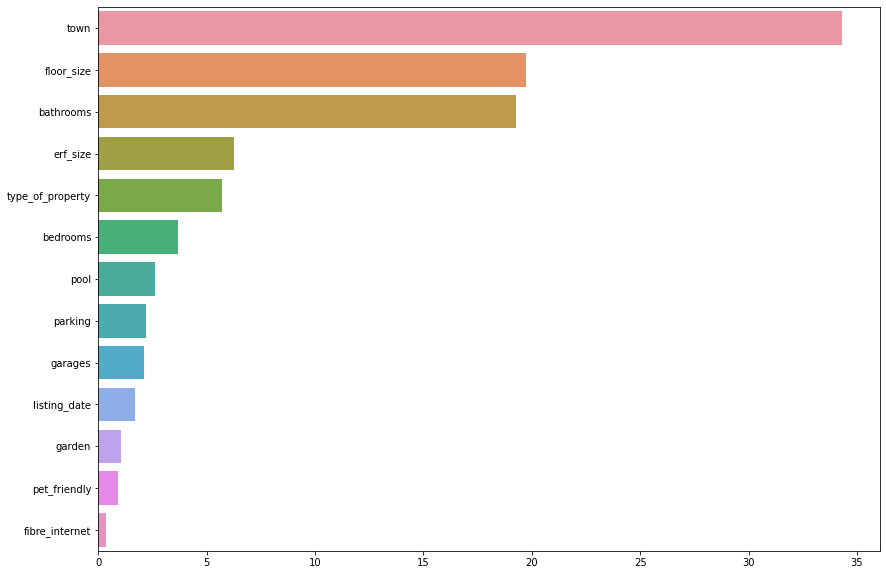

In [188]:
feature_importances = model.get_feature_importance()
feature_names = X_train.columns
x_=[]
y_=[]
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))
    x_.append(score)
    y_.append(name)
fig = plt.figure(figsize=(14,10))
sns.barplot(x=x_,y=y_,orient="h")

### Cross validation implemented by cat boost

In [189]:
cv_params = model.get_params()
cv_params.update({
    'loss_function': 'RMSE'
})
cv_data = cv(
    Pool( X_train_val, y_train_val, cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 14.8511907	test: 14.8514976	best: 14.8514976 (0)
1:	learn: 14.6836858	test: 14.6841517	best: 14.6841517 (1)
2:	learn: 14.5182000	test: 14.5188429	best: 14.5188429 (2)
3:	learn: 14.3544698	test: 14.3551742	best: 14.3551742 (3)
4:	learn: 14.1926978	test: 14.1936819	best: 14.1936819 (4)
5:	learn: 14.0330522	test: 14.0342924	best: 14.0342924 (5)
6:	learn: 13.8758612	test: 13.8772060	best: 13.8772060 (6)
7:	learn: 13.7213739	test: 13.7230261	best: 13.7230261 (7)
8:	learn: 13.5684653	test: 13.5704332	best: 13.5704332 (8)
9:	learn: 13.4154127	test: 13.4175831	best: 13.4175831 (9)
10:	learn: 13.2648678	test: 13.2672475	best: 13.2672475 (10)
11:	learn: 13.1157909	test: 13.1182693	best: 13.1182693 (11)
12:	learn: 12.9665807	test: 12.9689808	best: 12.9689808 (12)
13:	learn: 12.8208591	test: 12.8233251	best: 12.8233251 (13)
14:	learn: 12.6779131	test: 12.6805690	best: 12.6805690 (14)
15:	learn: 12.5352971	test: 12.5381585	best: 12.5381585 (15)
16:	learn: 12.3932965	test: 12.3961592	best:

231:	learn: 1.2312827	test: 1.2575749	best: 1.2575749 (231)
232:	learn: 1.2202520	test: 1.2467150	best: 1.2467150 (232)
233:	learn: 1.2095133	test: 1.2361922	best: 1.2361922 (233)
234:	learn: 1.1989085	test: 1.2257857	best: 1.2257857 (234)
235:	learn: 1.1883446	test: 1.2153243	best: 1.2153243 (235)
236:	learn: 1.1779972	test: 1.2051119	best: 1.2051119 (236)
237:	learn: 1.1676510	test: 1.1947904	best: 1.1947904 (237)
238:	learn: 1.1575510	test: 1.1848581	best: 1.1848581 (238)
239:	learn: 1.1475351	test: 1.1748392	best: 1.1748392 (239)
240:	learn: 1.1377767	test: 1.1652478	best: 1.1652478 (240)
241:	learn: 1.1280114	test: 1.1555828	best: 1.1555828 (241)
242:	learn: 1.1183182	test: 1.1460217	best: 1.1460217 (242)
243:	learn: 1.1088573	test: 1.1366647	best: 1.1366647 (243)
244:	learn: 1.0994615	test: 1.1273750	best: 1.1273750 (244)
245:	learn: 1.0903155	test: 1.1183652	best: 1.1183652 (245)
246:	learn: 1.0812140	test: 1.1093423	best: 1.1093423 (246)
247:	learn: 1.0722336	test: 1.1004311	be

556:	learn: 0.4035445	test: 0.4329930	best: 0.4329930 (556)
557:	learn: 0.4033520	test: 0.4328142	best: 0.4328142 (557)
558:	learn: 0.4031017	test: 0.4325690	best: 0.4325690 (558)
559:	learn: 0.4028999	test: 0.4323619	best: 0.4323619 (559)
560:	learn: 0.4026715	test: 0.4321699	best: 0.4321699 (560)
561:	learn: 0.4024503	test: 0.4320087	best: 0.4320087 (561)
562:	learn: 0.4022765	test: 0.4318402	best: 0.4318402 (562)
563:	learn: 0.4020940	test: 0.4316778	best: 0.4316778 (563)
564:	learn: 0.4019099	test: 0.4314909	best: 0.4314909 (564)
565:	learn: 0.4016918	test: 0.4313023	best: 0.4313023 (565)
566:	learn: 0.4014848	test: 0.4311118	best: 0.4311118 (566)
567:	learn: 0.4012784	test: 0.4309206	best: 0.4309206 (567)
568:	learn: 0.4011165	test: 0.4307674	best: 0.4307674 (568)
569:	learn: 0.4009127	test: 0.4305723	best: 0.4305723 (569)
570:	learn: 0.4006961	test: 0.4303886	best: 0.4303886 (570)
571:	learn: 0.4004932	test: 0.4302395	best: 0.4302395 (571)
572:	learn: 0.4002530	test: 0.4300012	be

889:	learn: 0.3645949	test: 0.3996229	best: 0.3996229 (889)
890:	learn: 0.3645176	test: 0.3995739	best: 0.3995739 (890)
891:	learn: 0.3644521	test: 0.3994760	best: 0.3994760 (891)
892:	learn: 0.3643579	test: 0.3993828	best: 0.3993828 (892)
893:	learn: 0.3642867	test: 0.3993297	best: 0.3993297 (893)
894:	learn: 0.3642319	test: 0.3992871	best: 0.3992871 (894)
895:	learn: 0.3641611	test: 0.3992457	best: 0.3992457 (895)
896:	learn: 0.3640574	test: 0.3991718	best: 0.3991718 (896)
897:	learn: 0.3639985	test: 0.3991326	best: 0.3991326 (897)
898:	learn: 0.3639270	test: 0.3990746	best: 0.3990746 (898)
899:	learn: 0.3638319	test: 0.3990146	best: 0.3990146 (899)
900:	learn: 0.3637543	test: 0.3989396	best: 0.3989396 (900)
901:	learn: 0.3636754	test: 0.3988921	best: 0.3988921 (901)
902:	learn: 0.3635693	test: 0.3988323	best: 0.3988323 (902)
903:	learn: 0.3634597	test: 0.3987903	best: 0.3987903 (903)
904:	learn: 0.3634127	test: 0.3987432	best: 0.3987432 (904)
905:	learn: 0.3633222	test: 0.3986885	be

1164:	learn: 0.3462526	test: 0.3879973	best: 0.3879973 (1164)
1165:	learn: 0.3461799	test: 0.3879478	best: 0.3879478 (1165)
1166:	learn: 0.3461417	test: 0.3879266	best: 0.3879266 (1166)
1167:	learn: 0.3460728	test: 0.3878837	best: 0.3878837 (1167)
1168:	learn: 0.3459989	test: 0.3878511	best: 0.3878511 (1168)
1169:	learn: 0.3459596	test: 0.3878504	best: 0.3878504 (1169)
1170:	learn: 0.3458954	test: 0.3878194	best: 0.3878194 (1170)
1171:	learn: 0.3458103	test: 0.3877779	best: 0.3877779 (1171)
1172:	learn: 0.3457666	test: 0.3877576	best: 0.3877576 (1172)
1173:	learn: 0.3456903	test: 0.3877232	best: 0.3877232 (1173)
1174:	learn: 0.3456405	test: 0.3876849	best: 0.3876849 (1174)
1175:	learn: 0.3455876	test: 0.3876608	best: 0.3876608 (1175)
1176:	learn: 0.3455294	test: 0.3876304	best: 0.3876304 (1176)
1177:	learn: 0.3455005	test: 0.3876102	best: 0.3876102 (1177)
1178:	learn: 0.3454199	test: 0.3875666	best: 0.3875666 (1178)
1179:	learn: 0.3453828	test: 0.3875591	best: 0.3875591 (1179)
1180:	le

1405:	learn: 0.3329050	test: 0.3806793	best: 0.3806793 (1405)
1406:	learn: 0.3328824	test: 0.3806687	best: 0.3806687 (1406)
1407:	learn: 0.3328346	test: 0.3806330	best: 0.3806330 (1407)
1408:	learn: 0.3327499	test: 0.3805834	best: 0.3805834 (1408)
1409:	learn: 0.3327263	test: 0.3805675	best: 0.3805675 (1409)
1410:	learn: 0.3326855	test: 0.3805627	best: 0.3805627 (1410)
1411:	learn: 0.3326331	test: 0.3805455	best: 0.3805455 (1411)
1412:	learn: 0.3325812	test: 0.3805256	best: 0.3805256 (1412)
1413:	learn: 0.3325342	test: 0.3805168	best: 0.3805168 (1413)
1414:	learn: 0.3325002	test: 0.3805054	best: 0.3805054 (1414)
1415:	learn: 0.3324622	test: 0.3804751	best: 0.3804751 (1415)
1416:	learn: 0.3323893	test: 0.3804362	best: 0.3804362 (1416)
1417:	learn: 0.3323207	test: 0.3803907	best: 0.3803907 (1417)
1418:	learn: 0.3322628	test: 0.3803713	best: 0.3803713 (1418)
1419:	learn: 0.3322128	test: 0.3803497	best: 0.3803497 (1419)
1420:	learn: 0.3321433	test: 0.3803076	best: 0.3803076 (1420)
1421:	le

1577:	learn: 0.3244285	test: 0.3764324	best: 0.3764324 (1577)
1578:	learn: 0.3243597	test: 0.3764037	best: 0.3764037 (1578)
1579:	learn: 0.3242763	test: 0.3763451	best: 0.3763451 (1579)
1580:	learn: 0.3242209	test: 0.3763024	best: 0.3763024 (1580)
1581:	learn: 0.3241519	test: 0.3762676	best: 0.3762676 (1581)
1582:	learn: 0.3241220	test: 0.3762609	best: 0.3762609 (1582)
1583:	learn: 0.3240555	test: 0.3762283	best: 0.3762283 (1583)
1584:	learn: 0.3240119	test: 0.3762116	best: 0.3762116 (1584)
1585:	learn: 0.3239605	test: 0.3761814	best: 0.3761814 (1585)
1586:	learn: 0.3239100	test: 0.3761639	best: 0.3761639 (1586)
1587:	learn: 0.3238654	test: 0.3761550	best: 0.3761550 (1587)
1588:	learn: 0.3238100	test: 0.3761212	best: 0.3761212 (1588)
1589:	learn: 0.3237557	test: 0.3760798	best: 0.3760798 (1589)
1590:	learn: 0.3237265	test: 0.3760626	best: 0.3760626 (1590)
1591:	learn: 0.3236722	test: 0.3760548	best: 0.3760548 (1591)
1592:	learn: 0.3236382	test: 0.3760385	best: 0.3760385 (1592)
1593:	le

1749:	learn: 0.3169092	test: 0.3731380	best: 0.3731380 (1749)
1750:	learn: 0.3168833	test: 0.3731295	best: 0.3731295 (1750)
1751:	learn: 0.3168360	test: 0.3731209	best: 0.3731209 (1751)
1752:	learn: 0.3168113	test: 0.3731132	best: 0.3731132 (1752)
1753:	learn: 0.3167746	test: 0.3730866	best: 0.3730866 (1753)
1754:	learn: 0.3167296	test: 0.3730684	best: 0.3730684 (1754)
1755:	learn: 0.3166793	test: 0.3730421	best: 0.3730421 (1755)
1756:	learn: 0.3166565	test: 0.3730351	best: 0.3730351 (1756)
1757:	learn: 0.3166180	test: 0.3730246	best: 0.3730246 (1757)
1758:	learn: 0.3165801	test: 0.3729818	best: 0.3729818 (1758)
1759:	learn: 0.3165507	test: 0.3729644	best: 0.3729644 (1759)
1760:	learn: 0.3164993	test: 0.3729260	best: 0.3729260 (1760)
1761:	learn: 0.3164635	test: 0.3729174	best: 0.3729174 (1761)
1762:	learn: 0.3164384	test: 0.3729053	best: 0.3729053 (1762)
1763:	learn: 0.3164006	test: 0.3728823	best: 0.3728823 (1763)
1764:	learn: 0.3163647	test: 0.3728691	best: 0.3728691 (1764)
1765:	le

1942:	learn: 0.3094308	test: 0.3700179	best: 0.3700179 (1942)
1943:	learn: 0.3094041	test: 0.3700066	best: 0.3700066 (1943)
1944:	learn: 0.3093732	test: 0.3700042	best: 0.3700042 (1944)
1945:	learn: 0.3093203	test: 0.3699618	best: 0.3699618 (1945)
1946:	learn: 0.3092721	test: 0.3699452	best: 0.3699452 (1946)
1947:	learn: 0.3092205	test: 0.3699199	best: 0.3699199 (1947)
1948:	learn: 0.3091767	test: 0.3698866	best: 0.3698866 (1948)
1949:	learn: 0.3091443	test: 0.3698677	best: 0.3698677 (1949)
1950:	learn: 0.3091123	test: 0.3698610	best: 0.3698610 (1950)
1951:	learn: 0.3090572	test: 0.3698344	best: 0.3698344 (1951)
1952:	learn: 0.3090271	test: 0.3698415	best: 0.3698344 (1951)
1953:	learn: 0.3089867	test: 0.3698261	best: 0.3698261 (1953)
1954:	learn: 0.3089492	test: 0.3698119	best: 0.3698119 (1954)
1955:	learn: 0.3089070	test: 0.3697954	best: 0.3697954 (1955)
1956:	learn: 0.3088844	test: 0.3697941	best: 0.3697941 (1956)
1957:	learn: 0.3088413	test: 0.3697760	best: 0.3697760 (1957)
1958:	le

2150:	learn: 0.3020819	test: 0.3671505	best: 0.3671505 (2150)
2151:	learn: 0.3020495	test: 0.3671454	best: 0.3671454 (2151)
2152:	learn: 0.3020143	test: 0.3671243	best: 0.3671243 (2152)
2153:	learn: 0.3019788	test: 0.3671004	best: 0.3671004 (2153)
2154:	learn: 0.3019519	test: 0.3670917	best: 0.3670917 (2154)
2155:	learn: 0.3019224	test: 0.3670924	best: 0.3670917 (2154)
2156:	learn: 0.3019064	test: 0.3670817	best: 0.3670817 (2156)
2157:	learn: 0.3018814	test: 0.3670685	best: 0.3670685 (2157)
2158:	learn: 0.3018567	test: 0.3670632	best: 0.3670632 (2158)
2159:	learn: 0.3018317	test: 0.3670514	best: 0.3670514 (2159)
2160:	learn: 0.3018152	test: 0.3670363	best: 0.3670363 (2160)
2161:	learn: 0.3017947	test: 0.3670310	best: 0.3670310 (2161)
2162:	learn: 0.3017547	test: 0.3670102	best: 0.3670102 (2162)
2163:	learn: 0.3017169	test: 0.3670012	best: 0.3670012 (2163)
2164:	learn: 0.3016684	test: 0.3669739	best: 0.3669739 (2164)
2165:	learn: 0.3016350	test: 0.3669667	best: 0.3669667 (2165)
2166:	le

2352:	learn: 0.2959388	test: 0.3647096	best: 0.3647096 (2352)
2353:	learn: 0.2959039	test: 0.3646884	best: 0.3646884 (2353)
2354:	learn: 0.2958666	test: 0.3646800	best: 0.3646800 (2354)
2355:	learn: 0.2958479	test: 0.3646666	best: 0.3646666 (2355)
2356:	learn: 0.2958097	test: 0.3646591	best: 0.3646591 (2356)
2357:	learn: 0.2957834	test: 0.3646593	best: 0.3646591 (2356)
2358:	learn: 0.2957659	test: 0.3646691	best: 0.3646591 (2356)
2359:	learn: 0.2957413	test: 0.3646668	best: 0.3646591 (2356)
2360:	learn: 0.2957190	test: 0.3646535	best: 0.3646535 (2360)
2361:	learn: 0.2956889	test: 0.3646462	best: 0.3646462 (2361)
2362:	learn: 0.2956791	test: 0.3646412	best: 0.3646412 (2362)
2363:	learn: 0.2956548	test: 0.3646339	best: 0.3646339 (2363)
2364:	learn: 0.2956328	test: 0.3646248	best: 0.3646248 (2364)
2365:	learn: 0.2956162	test: 0.3646212	best: 0.3646212 (2365)
2366:	learn: 0.2955745	test: 0.3645909	best: 0.3645909 (2366)
2367:	learn: 0.2955427	test: 0.3645784	best: 0.3645784 (2367)
2368:	le

2612:	learn: 0.2890275	test: 0.3622527	best: 0.3622527 (2612)
2613:	learn: 0.2890228	test: 0.3622478	best: 0.3622478 (2613)
2614:	learn: 0.2889883	test: 0.3622441	best: 0.3622441 (2614)
2615:	learn: 0.2889716	test: 0.3622424	best: 0.3622424 (2615)
2616:	learn: 0.2889472	test: 0.3622425	best: 0.3622424 (2615)
2617:	learn: 0.2889142	test: 0.3622225	best: 0.3622225 (2617)
2618:	learn: 0.2888917	test: 0.3622134	best: 0.3622134 (2618)
2619:	learn: 0.2888711	test: 0.3622017	best: 0.3622017 (2619)
2620:	learn: 0.2888597	test: 0.3621954	best: 0.3621954 (2620)
2621:	learn: 0.2888385	test: 0.3621918	best: 0.3621918 (2621)
2622:	learn: 0.2888085	test: 0.3621854	best: 0.3621854 (2622)
2623:	learn: 0.2887832	test: 0.3621864	best: 0.3621854 (2622)
2624:	learn: 0.2887536	test: 0.3621908	best: 0.3621854 (2622)
2625:	learn: 0.2887243	test: 0.3621877	best: 0.3621854 (2622)
2626:	learn: 0.2886926	test: 0.3621853	best: 0.3621853 (2626)
2627:	learn: 0.2886489	test: 0.3621647	best: 0.3621647 (2627)
2628:	le

2772:	learn: 0.2850368	test: 0.3609795	best: 0.3609795 (2772)
2773:	learn: 0.2850013	test: 0.3609690	best: 0.3609690 (2773)
2774:	learn: 0.2849665	test: 0.3609476	best: 0.3609476 (2774)
2775:	learn: 0.2849437	test: 0.3609416	best: 0.3609416 (2775)
2776:	learn: 0.2849266	test: 0.3609396	best: 0.3609396 (2776)
2777:	learn: 0.2848978	test: 0.3609377	best: 0.3609377 (2777)
2778:	learn: 0.2848741	test: 0.3609262	best: 0.3609262 (2778)
2779:	learn: 0.2848306	test: 0.3609197	best: 0.3609197 (2779)
2780:	learn: 0.2848016	test: 0.3609244	best: 0.3609197 (2779)
2781:	learn: 0.2847751	test: 0.3609233	best: 0.3609197 (2779)
2782:	learn: 0.2847617	test: 0.3609165	best: 0.3609165 (2782)
2783:	learn: 0.2847392	test: 0.3609098	best: 0.3609098 (2783)
2784:	learn: 0.2847092	test: 0.3609004	best: 0.3609004 (2784)
2785:	learn: 0.2846676	test: 0.3608781	best: 0.3608781 (2785)
2786:	learn: 0.2846501	test: 0.3608585	best: 0.3608585 (2786)
2787:	learn: 0.2846345	test: 0.3608558	best: 0.3608558 (2787)
2788:	le

2986:	learn: 0.2798757	test: 0.3592918	best: 0.3592918 (2986)
2987:	learn: 0.2798377	test: 0.3592693	best: 0.3592693 (2987)
2988:	learn: 0.2798148	test: 0.3592695	best: 0.3592693 (2987)
2989:	learn: 0.2797924	test: 0.3592632	best: 0.3592632 (2989)
2990:	learn: 0.2797689	test: 0.3592600	best: 0.3592600 (2990)	total: 40.4s	remaining: 27.1s
2991:	learn: 0.2797436	test: 0.3592547	best: 0.3592547 (2991)
2992:	learn: 0.2797235	test: 0.3592498	best: 0.3592498 (2992)
2993:	learn: 0.2796894	test: 0.3592541	best: 0.3592498 (2992)
2994:	learn: 0.2796641	test: 0.3592533	best: 0.3592498 (2992)
2995:	learn: 0.2796297	test: 0.3592226	best: 0.3592226 (2995)
2996:	learn: 0.2796031	test: 0.3592181	best: 0.3592181 (2996)
2997:	learn: 0.2795907	test: 0.3592163	best: 0.3592163 (2997)
2998:	learn: 0.2795817	test: 0.3592204	best: 0.3592163 (2997)
2999:	learn: 0.2795724	test: 0.3592175	best: 0.3592163 (2997)
3000:	learn: 0.2795635	test: 0.3592120	best: 0.3592120 (3000)
3001:	learn: 0.2795400	test: 0.3592053	b

3144:	learn: 0.2761652	test: 0.3581592	best: 0.3581592 (3144)
3145:	learn: 0.2761479	test: 0.3581551	best: 0.3581551 (3145)
3146:	learn: 0.2761312	test: 0.3581577	best: 0.3581551 (3145)
3147:	learn: 0.2761121	test: 0.3581552	best: 0.3581551 (3145)
3148:	learn: 0.2760959	test: 0.3581471	best: 0.3581471 (3148)
3149:	learn: 0.2760780	test: 0.3581441	best: 0.3581441 (3149)
3150:	learn: 0.2760442	test: 0.3581358	best: 0.3581358 (3150)
3151:	learn: 0.2760290	test: 0.3581325	best: 0.3581325 (3151)
3152:	learn: 0.2759990	test: 0.3581222	best: 0.3581222 (3152)
3153:	learn: 0.2759731	test: 0.3581237	best: 0.3581222 (3152)
3154:	learn: 0.2759522	test: 0.3581238	best: 0.3581222 (3152)
3155:	learn: 0.2759313	test: 0.3581142	best: 0.3581142 (3155)
3156:	learn: 0.2759180	test: 0.3581012	best: 0.3581012 (3156)
3157:	learn: 0.2758969	test: 0.3580912	best: 0.3580912 (3157)
3158:	learn: 0.2758856	test: 0.3580929	best: 0.3580912 (3157)
3159:	learn: 0.2758627	test: 0.3580869	best: 0.3580869 (3159)
3160:	le

3281:	learn: 0.2732689	test: 0.3573487	best: 0.3573487 (3281)
3282:	learn: 0.2732424	test: 0.3573470	best: 0.3573470 (3282)
3283:	learn: 0.2732135	test: 0.3573357	best: 0.3573357 (3283)
3284:	learn: 0.2731779	test: 0.3573255	best: 0.3573255 (3284)
3285:	learn: 0.2731556	test: 0.3573206	best: 0.3573206 (3285)
3286:	learn: 0.2731364	test: 0.3573145	best: 0.3573145 (3286)
3287:	learn: 0.2731185	test: 0.3573072	best: 0.3573072 (3287)
3288:	learn: 0.2731022	test: 0.3572977	best: 0.3572977 (3288)
3289:	learn: 0.2730819	test: 0.3572928	best: 0.3572928 (3289)
3290:	learn: 0.2730651	test: 0.3572930	best: 0.3572928 (3289)
3291:	learn: 0.2730267	test: 0.3572835	best: 0.3572835 (3291)
3292:	learn: 0.2729938	test: 0.3572680	best: 0.3572680 (3292)
3293:	learn: 0.2729736	test: 0.3572718	best: 0.3572680 (3292)
3294:	learn: 0.2729562	test: 0.3572664	best: 0.3572664 (3294)
3295:	learn: 0.2729402	test: 0.3572639	best: 0.3572639 (3295)
3296:	learn: 0.2729235	test: 0.3572613	best: 0.3572613 (3296)
3297:	le

3457:	learn: 0.2696859	test: 0.3563238	best: 0.3563238 (3457)
3458:	learn: 0.2696521	test: 0.3563048	best: 0.3563048 (3458)
3459:	learn: 0.2696386	test: 0.3563039	best: 0.3563039 (3459)
3460:	learn: 0.2696260	test: 0.3562923	best: 0.3562923 (3460)
3461:	learn: 0.2695953	test: 0.3562738	best: 0.3562738 (3461)
3462:	learn: 0.2695800	test: 0.3562728	best: 0.3562728 (3462)
3463:	learn: 0.2695618	test: 0.3562656	best: 0.3562656 (3463)
3464:	learn: 0.2695285	test: 0.3562585	best: 0.3562585 (3464)
3465:	learn: 0.2695015	test: 0.3562420	best: 0.3562420 (3465)
3466:	learn: 0.2694969	test: 0.3562338	best: 0.3562338 (3466)
3467:	learn: 0.2694785	test: 0.3562340	best: 0.3562338 (3466)
3468:	learn: 0.2694638	test: 0.3562258	best: 0.3562258 (3468)
3469:	learn: 0.2694444	test: 0.3562237	best: 0.3562237 (3469)
3470:	learn: 0.2694210	test: 0.3562194	best: 0.3562194 (3470)
3471:	learn: 0.2694054	test: 0.3562166	best: 0.3562166 (3471)
3472:	learn: 0.2693962	test: 0.3562127	best: 0.3562127 (3472)
3473:	le

3605:	learn: 0.2668817	test: 0.3554617	best: 0.3554617 (3605)
3606:	learn: 0.2668490	test: 0.3554477	best: 0.3554477 (3606)
3607:	learn: 0.2668421	test: 0.3554434	best: 0.3554434 (3607)
3608:	learn: 0.2668366	test: 0.3554419	best: 0.3554419 (3608)
3609:	learn: 0.2668314	test: 0.3554437	best: 0.3554419 (3608)
3610:	learn: 0.2668214	test: 0.3554440	best: 0.3554419 (3608)
3611:	learn: 0.2668046	test: 0.3554383	best: 0.3554383 (3611)
3612:	learn: 0.2667853	test: 0.3554418	best: 0.3554383 (3611)
3613:	learn: 0.2667769	test: 0.3554414	best: 0.3554383 (3611)
3614:	learn: 0.2667591	test: 0.3554462	best: 0.3554383 (3611)
3615:	learn: 0.2667423	test: 0.3554438	best: 0.3554383 (3611)
3616:	learn: 0.2667250	test: 0.3554452	best: 0.3554383 (3611)
3617:	learn: 0.2667037	test: 0.3554421	best: 0.3554383 (3611)
3618:	learn: 0.2666919	test: 0.3554405	best: 0.3554383 (3611)
3619:	learn: 0.2666816	test: 0.3554370	best: 0.3554370 (3619)
3620:	learn: 0.2666703	test: 0.3554359	best: 0.3554359 (3620)
3621:	le

3794:	learn: 0.2634078	test: 0.3546290	best: 0.3546290 (3794)
3795:	learn: 0.2633915	test: 0.3546244	best: 0.3546244 (3795)
3796:	learn: 0.2633774	test: 0.3546200	best: 0.3546200 (3796)
3797:	learn: 0.2633566	test: 0.3546090	best: 0.3546090 (3797)
3798:	learn: 0.2633460	test: 0.3546078	best: 0.3546078 (3798)
3799:	learn: 0.2633317	test: 0.3545984	best: 0.3545984 (3799)
3800:	learn: 0.2633132	test: 0.3546023	best: 0.3545984 (3799)
3801:	learn: 0.2632951	test: 0.3546013	best: 0.3545984 (3799)
3802:	learn: 0.2632677	test: 0.3545897	best: 0.3545897 (3802)
3803:	learn: 0.2632372	test: 0.3545708	best: 0.3545708 (3803)
3804:	learn: 0.2632280	test: 0.3545702	best: 0.3545702 (3804)
3805:	learn: 0.2632232	test: 0.3545689	best: 0.3545689 (3805)
3806:	learn: 0.2632030	test: 0.3545712	best: 0.3545689 (3805)
3807:	learn: 0.2631816	test: 0.3545721	best: 0.3545689 (3805)
3808:	learn: 0.2631717	test: 0.3545650	best: 0.3545650 (3808)
3809:	learn: 0.2631545	test: 0.3545734	best: 0.3545650 (3808)
3810:	le

3959:	learn: 0.2605839	test: 0.3539815	best: 0.3539783 (3957)
3960:	learn: 0.2605652	test: 0.3539771	best: 0.3539771 (3960)
3961:	learn: 0.2605507	test: 0.3539747	best: 0.3539747 (3961)
3962:	learn: 0.2605346	test: 0.3539725	best: 0.3539725 (3962)
3963:	learn: 0.2605156	test: 0.3539701	best: 0.3539701 (3963)
3964:	learn: 0.2604885	test: 0.3539552	best: 0.3539552 (3964)
3965:	learn: 0.2604752	test: 0.3539487	best: 0.3539487 (3965)
3966:	learn: 0.2604612	test: 0.3539505	best: 0.3539487 (3965)
3967:	learn: 0.2604508	test: 0.3539540	best: 0.3539487 (3965)
3968:	learn: 0.2604333	test: 0.3539531	best: 0.3539487 (3965)	total: 56.1s	remaining: 14.6s
3969:	learn: 0.2604270	test: 0.3539506	best: 0.3539487 (3965)
3970:	learn: 0.2604101	test: 0.3539509	best: 0.3539487 (3965)
3971:	learn: 0.2603975	test: 0.3539455	best: 0.3539455 (3971)
3972:	learn: 0.2603847	test: 0.3539389	best: 0.3539389 (3972)
3973:	learn: 0.2603730	test: 0.3539377	best: 0.3539377 (3973)
3974:	learn: 0.2603624	test: 0.3539279	b

4184:	learn: 0.2569725	test: 0.3532416	best: 0.3532416 (4184)
4185:	learn: 0.2569472	test: 0.3532332	best: 0.3532332 (4185)
4186:	learn: 0.2569335	test: 0.3532275	best: 0.3532275 (4186)
4187:	learn: 0.2569171	test: 0.3532277	best: 0.3532275 (4186)
4188:	learn: 0.2569091	test: 0.3532246	best: 0.3532246 (4188)
4189:	learn: 0.2568911	test: 0.3532317	best: 0.3532246 (4188)
4190:	learn: 0.2568887	test: 0.3532342	best: 0.3532246 (4188)
4191:	learn: 0.2568788	test: 0.3532291	best: 0.3532246 (4188)
4192:	learn: 0.2568702	test: 0.3532317	best: 0.3532246 (4188)
4193:	learn: 0.2568578	test: 0.3532281	best: 0.3532246 (4188)
4194:	learn: 0.2568269	test: 0.3532079	best: 0.3532079 (4194)
4195:	learn: 0.2568120	test: 0.3532115	best: 0.3532079 (4194)
4196:	learn: 0.2567985	test: 0.3532093	best: 0.3532079 (4194)
4197:	learn: 0.2567877	test: 0.3532032	best: 0.3532032 (4197)
4198:	learn: 0.2567672	test: 0.3532035	best: 0.3532032 (4197)
4199:	learn: 0.2567474	test: 0.3532045	best: 0.3532032 (4197)
4200:	le

4368:	learn: 0.2540999	test: 0.3527608	best: 0.3527608 (4368)
4369:	learn: 0.2540832	test: 0.3527568	best: 0.3527568 (4369)
4370:	learn: 0.2540716	test: 0.3527468	best: 0.3527468 (4370)
4371:	learn: 0.2540652	test: 0.3527474	best: 0.3527468 (4370)
4372:	learn: 0.2540438	test: 0.3527455	best: 0.3527455 (4372)
4373:	learn: 0.2540224	test: 0.3527407	best: 0.3527407 (4373)
4374:	learn: 0.2540100	test: 0.3527407	best: 0.3527407 (4374)
4375:	learn: 0.2539876	test: 0.3527376	best: 0.3527376 (4375)
4376:	learn: 0.2539783	test: 0.3527337	best: 0.3527337 (4376)
4377:	learn: 0.2539623	test: 0.3527350	best: 0.3527337 (4376)
4378:	learn: 0.2539505	test: 0.3527297	best: 0.3527297 (4378)
4379:	learn: 0.2539335	test: 0.3527283	best: 0.3527283 (4379)
4380:	learn: 0.2539281	test: 0.3527284	best: 0.3527283 (4379)
4381:	learn: 0.2539091	test: 0.3527231	best: 0.3527231 (4381)
4382:	learn: 0.2538978	test: 0.3527180	best: 0.3527180 (4382)
4383:	learn: 0.2538903	test: 0.3527173	best: 0.3527173 (4383)
4384:	le

4538:	learn: 0.2515469	test: 0.3522670	best: 0.3522670 (4538)
4539:	learn: 0.2515311	test: 0.3522583	best: 0.3522583 (4539)
4540:	learn: 0.2515157	test: 0.3522594	best: 0.3522583 (4539)
4541:	learn: 0.2515003	test: 0.3522566	best: 0.3522566 (4541)
4542:	learn: 0.2514859	test: 0.3522567	best: 0.3522566 (4541)
4543:	learn: 0.2514625	test: 0.3522437	best: 0.3522437 (4543)
4544:	learn: 0.2514499	test: 0.3522440	best: 0.3522437 (4543)
4545:	learn: 0.2514310	test: 0.3522374	best: 0.3522374 (4545)
4546:	learn: 0.2514101	test: 0.3522288	best: 0.3522288 (4546)
4547:	learn: 0.2513923	test: 0.3522273	best: 0.3522273 (4547)
4548:	learn: 0.2513799	test: 0.3522267	best: 0.3522267 (4548)
4549:	learn: 0.2513576	test: 0.3522245	best: 0.3522245 (4549)
4550:	learn: 0.2513411	test: 0.3522263	best: 0.3522245 (4549)
4551:	learn: 0.2513218	test: 0.3522245	best: 0.3522245 (4551)
4552:	learn: 0.2513087	test: 0.3522252	best: 0.3522245 (4551)
4553:	learn: 0.2512989	test: 0.3522214	best: 0.3522214 (4553)
4554:	le

4772:	learn: 0.2480022	test: 0.3516095	best: 0.3516041 (4769)	total: 1m 11s	remaining: 3.42s
4773:	learn: 0.2479829	test: 0.3516069	best: 0.3516041 (4769)
4774:	learn: 0.2479620	test: 0.3515980	best: 0.3515980 (4774)
4775:	learn: 0.2479554	test: 0.3516021	best: 0.3515980 (4774)
4776:	learn: 0.2479391	test: 0.3516024	best: 0.3515980 (4774)
4777:	learn: 0.2479288	test: 0.3516022	best: 0.3515980 (4774)
4778:	learn: 0.2479171	test: 0.3516072	best: 0.3515980 (4774)
4779:	learn: 0.2478969	test: 0.3516058	best: 0.3515980 (4774)
4780:	learn: 0.2478884	test: 0.3516019	best: 0.3515980 (4774)
4781:	learn: 0.2478712	test: 0.3515971	best: 0.3515971 (4781)
4782:	learn: 0.2478664	test: 0.3515978	best: 0.3515971 (4781)
4783:	learn: 0.2478515	test: 0.3515979	best: 0.3515971 (4781)
4784:	learn: 0.2478414	test: 0.3515961	best: 0.3515961 (4784)
4785:	learn: 0.2478239	test: 0.3515879	best: 0.3515879 (4785)
4786:	learn: 0.2478164	test: 0.3515944	best: 0.3515879 (4785)
4787:	learn: 0.2478065	test: 0.3515922	

4926:	learn: 0.2459353	test: 0.3514140	best: 0.3514117 (4918)
4927:	learn: 0.2459178	test: 0.3514215	best: 0.3514117 (4918)
4928:	learn: 0.2459006	test: 0.3514138	best: 0.3514117 (4918)
4929:	learn: 0.2458805	test: 0.3514086	best: 0.3514086 (4929)
4930:	learn: 0.2458680	test: 0.3514061	best: 0.3514061 (4930)
4931:	learn: 0.2458550	test: 0.3514026	best: 0.3514026 (4931)
4932:	learn: 0.2458379	test: 0.3514063	best: 0.3514026 (4931)
4933:	learn: 0.2458225	test: 0.3514084	best: 0.3514026 (4931)
4934:	learn: 0.2458043	test: 0.3514106	best: 0.3514026 (4931)
4935:	learn: 0.2457751	test: 0.3513982	best: 0.3513982 (4935)
4936:	learn: 0.2457663	test: 0.3513969	best: 0.3513969 (4936)
4937:	learn: 0.2457457	test: 0.3513943	best: 0.3513943 (4937)
4938:	learn: 0.2457322	test: 0.3513916	best: 0.3513916 (4938)
4939:	learn: 0.2457273	test: 0.3513858	best: 0.3513858 (4939)
4940:	learn: 0.2457094	test: 0.3513910	best: 0.3513858 (4939)
4941:	learn: 0.2456935	test: 0.3513934	best: 0.3513858 (4939)
4942:	le

In [190]:
print('Best validation RMSE score: {:.2f}±{:.2f} on step {}'.format(
    np.min(cv_data['test-RMSE-mean']),
    cv_data['test-RMSE-std'][np.argmin(cv_data['test-RMSE-mean'])],
    np.argmin(cv_data['test-RMSE-mean'])
))

Best validation RMSE score: 0.35±0.01 on step 4999


In [191]:
print('Precise validation accuracy score: {}'.format(np.min(cv_data['test-RMSE-mean'])))

Precise validation accuracy score: 0.35128490143881247


## 4) Evaluate on Test

In [192]:
X_train_val = X_val.append(X_train)
y_train_val = y_val.append(y_train)

In [193]:
# FINAL MODEL with the best params from gridsearch
model.fit(X_train_val, y_train_val,cat_features=categorical_features_indices)

0:	learn: 0.8618627	total: 7.24ms	remaining: 36.2s
1:	learn: 0.8560079	total: 16.3ms	remaining: 40.7s
2:	learn: 0.8507578	total: 21.5ms	remaining: 35.8s
3:	learn: 0.8453581	total: 24.7ms	remaining: 30.8s
4:	learn: 0.8398861	total: 28.5ms	remaining: 28.5s
5:	learn: 0.8345962	total: 31.4ms	remaining: 26.2s
6:	learn: 0.8294176	total: 33.5ms	remaining: 23.9s
7:	learn: 0.8235105	total: 36.1ms	remaining: 22.5s
8:	learn: 0.8175076	total: 37.7ms	remaining: 20.9s
9:	learn: 0.8114325	total: 39.8ms	remaining: 19.8s
10:	learn: 0.8056253	total: 41.2ms	remaining: 18.7s
11:	learn: 0.7999211	total: 42.9ms	remaining: 17.8s
12:	learn: 0.7941906	total: 44.6ms	remaining: 17.1s
13:	learn: 0.7884584	total: 46.2ms	remaining: 16.4s
14:	learn: 0.7827339	total: 48.2ms	remaining: 16s
15:	learn: 0.7773250	total: 50.6ms	remaining: 15.8s
16:	learn: 0.7719110	total: 52.1ms	remaining: 15.3s
17:	learn: 0.7666038	total: 53.5ms	remaining: 14.8s
18:	learn: 0.7613640	total: 55.1ms	remaining: 14.4s
19:	learn: 0.7561740	tot

185:	learn: 0.4263212	total: 356ms	remaining: 9.21s
186:	learn: 0.4257422	total: 358ms	remaining: 9.21s
187:	learn: 0.4251871	total: 359ms	remaining: 9.2s
188:	learn: 0.4247200	total: 361ms	remaining: 9.19s
189:	learn: 0.4242173	total: 362ms	remaining: 9.18s
190:	learn: 0.4237196	total: 364ms	remaining: 9.16s
191:	learn: 0.4230467	total: 366ms	remaining: 9.16s
192:	learn: 0.4225610	total: 368ms	remaining: 9.15s
193:	learn: 0.4220155	total: 369ms	remaining: 9.14s
194:	learn: 0.4215107	total: 370ms	remaining: 9.13s
195:	learn: 0.4211092	total: 373ms	remaining: 9.13s
196:	learn: 0.4205840	total: 374ms	remaining: 9.13s
197:	learn: 0.4200330	total: 376ms	remaining: 9.12s
198:	learn: 0.4194704	total: 378ms	remaining: 9.11s
199:	learn: 0.4189061	total: 379ms	remaining: 9.11s
200:	learn: 0.4183311	total: 382ms	remaining: 9.12s
201:	learn: 0.4178499	total: 383ms	remaining: 9.11s
202:	learn: 0.4173990	total: 385ms	remaining: 9.09s
203:	learn: 0.4169351	total: 386ms	remaining: 9.08s
204:	learn: 0

388:	learn: 0.3747086	total: 708ms	remaining: 8.39s
389:	learn: 0.3746117	total: 710ms	remaining: 8.39s
390:	learn: 0.3745148	total: 712ms	remaining: 8.39s
391:	learn: 0.3744205	total: 713ms	remaining: 8.38s
392:	learn: 0.3742955	total: 714ms	remaining: 8.38s
393:	learn: 0.3741842	total: 716ms	remaining: 8.37s
394:	learn: 0.3741006	total: 718ms	remaining: 8.37s
395:	learn: 0.3739907	total: 719ms	remaining: 8.36s
396:	learn: 0.3739105	total: 721ms	remaining: 8.35s
397:	learn: 0.3737864	total: 722ms	remaining: 8.35s
398:	learn: 0.3736608	total: 724ms	remaining: 8.34s
399:	learn: 0.3735850	total: 726ms	remaining: 8.35s
400:	learn: 0.3734094	total: 727ms	remaining: 8.34s
401:	learn: 0.3732589	total: 729ms	remaining: 8.34s
402:	learn: 0.3730910	total: 730ms	remaining: 8.33s
403:	learn: 0.3729209	total: 732ms	remaining: 8.32s
404:	learn: 0.3727981	total: 733ms	remaining: 8.32s
405:	learn: 0.3726931	total: 735ms	remaining: 8.31s
406:	learn: 0.3726034	total: 736ms	remaining: 8.31s
407:	learn: 

583:	learn: 0.3574587	total: 1.06s	remaining: 8.04s
584:	learn: 0.3573055	total: 1.06s	remaining: 8.03s
585:	learn: 0.3572116	total: 1.06s	remaining: 8.03s
586:	learn: 0.3571566	total: 1.07s	remaining: 8.02s
587:	learn: 0.3571083	total: 1.07s	remaining: 8.02s
588:	learn: 0.3570489	total: 1.07s	remaining: 8.02s
589:	learn: 0.3569524	total: 1.07s	remaining: 8.02s
590:	learn: 0.3568610	total: 1.07s	remaining: 8.01s
591:	learn: 0.3568031	total: 1.07s	remaining: 8.01s
592:	learn: 0.3567654	total: 1.08s	remaining: 8.01s
593:	learn: 0.3565992	total: 1.08s	remaining: 8s
594:	learn: 0.3565546	total: 1.08s	remaining: 8s
595:	learn: 0.3564959	total: 1.08s	remaining: 7.99s
596:	learn: 0.3564527	total: 1.08s	remaining: 7.99s
597:	learn: 0.3564044	total: 1.08s	remaining: 7.99s
598:	learn: 0.3562892	total: 1.09s	remaining: 7.98s
599:	learn: 0.3561986	total: 1.09s	remaining: 7.98s
600:	learn: 0.3561599	total: 1.09s	remaining: 7.98s
601:	learn: 0.3561139	total: 1.09s	remaining: 7.98s
602:	learn: 0.3560

779:	learn: 0.3444625	total: 1.42s	remaining: 7.67s
780:	learn: 0.3444315	total: 1.42s	remaining: 7.66s
781:	learn: 0.3443952	total: 1.42s	remaining: 7.66s
782:	learn: 0.3443667	total: 1.42s	remaining: 7.66s
783:	learn: 0.3442721	total: 1.42s	remaining: 7.66s
784:	learn: 0.3442147	total: 1.43s	remaining: 7.65s
785:	learn: 0.3441922	total: 1.43s	remaining: 7.65s
786:	learn: 0.3441643	total: 1.43s	remaining: 7.65s
787:	learn: 0.3440965	total: 1.43s	remaining: 7.65s
788:	learn: 0.3439570	total: 1.43s	remaining: 7.64s
789:	learn: 0.3438757	total: 1.43s	remaining: 7.64s
790:	learn: 0.3438219	total: 1.44s	remaining: 7.64s
791:	learn: 0.3437459	total: 1.44s	remaining: 7.64s
792:	learn: 0.3437316	total: 1.44s	remaining: 7.63s
793:	learn: 0.3437016	total: 1.44s	remaining: 7.64s
794:	learn: 0.3436598	total: 1.44s	remaining: 7.64s
795:	learn: 0.3436063	total: 1.45s	remaining: 7.64s
796:	learn: 0.3435329	total: 1.45s	remaining: 7.64s
797:	learn: 0.3434608	total: 1.45s	remaining: 7.64s
798:	learn: 

962:	learn: 0.3347324	total: 1.76s	remaining: 7.39s
963:	learn: 0.3346933	total: 1.76s	remaining: 7.39s
964:	learn: 0.3346293	total: 1.77s	remaining: 7.38s
965:	learn: 0.3345752	total: 1.77s	remaining: 7.39s
966:	learn: 0.3344841	total: 1.77s	remaining: 7.38s
967:	learn: 0.3343792	total: 1.77s	remaining: 7.38s
968:	learn: 0.3342512	total: 1.77s	remaining: 7.38s
969:	learn: 0.3341282	total: 1.78s	remaining: 7.38s
970:	learn: 0.3340885	total: 1.78s	remaining: 7.38s
971:	learn: 0.3340310	total: 1.78s	remaining: 7.38s
972:	learn: 0.3340174	total: 1.78s	remaining: 7.38s
973:	learn: 0.3339852	total: 1.78s	remaining: 7.38s
974:	learn: 0.3339405	total: 1.79s	remaining: 7.38s
975:	learn: 0.3338973	total: 1.79s	remaining: 7.37s
976:	learn: 0.3338047	total: 1.79s	remaining: 7.37s
977:	learn: 0.3337494	total: 1.79s	remaining: 7.37s
978:	learn: 0.3337133	total: 1.79s	remaining: 7.37s
979:	learn: 0.3336501	total: 1.79s	remaining: 7.36s
980:	learn: 0.3335879	total: 1.8s	remaining: 7.36s
981:	learn: 0

1170:	learn: 0.3232831	total: 2.11s	remaining: 6.89s
1171:	learn: 0.3232434	total: 2.11s	remaining: 6.89s
1172:	learn: 0.3232053	total: 2.11s	remaining: 6.89s
1173:	learn: 0.3231877	total: 2.11s	remaining: 6.88s
1174:	learn: 0.3231477	total: 2.11s	remaining: 6.88s
1175:	learn: 0.3231041	total: 2.11s	remaining: 6.88s
1176:	learn: 0.3230607	total: 2.12s	remaining: 6.87s
1177:	learn: 0.3230096	total: 2.12s	remaining: 6.87s
1178:	learn: 0.3229620	total: 2.12s	remaining: 6.87s
1179:	learn: 0.3229164	total: 2.12s	remaining: 6.86s
1180:	learn: 0.3228855	total: 2.12s	remaining: 6.86s
1181:	learn: 0.3228416	total: 2.12s	remaining: 6.86s
1182:	learn: 0.3227600	total: 2.13s	remaining: 6.86s
1183:	learn: 0.3227283	total: 2.13s	remaining: 6.85s
1184:	learn: 0.3226610	total: 2.13s	remaining: 6.85s
1185:	learn: 0.3225923	total: 2.13s	remaining: 6.85s
1186:	learn: 0.3225352	total: 2.13s	remaining: 6.84s
1187:	learn: 0.3224868	total: 2.13s	remaining: 6.84s
1188:	learn: 0.3224296	total: 2.13s	remaining:

1389:	learn: 0.3133655	total: 2.45s	remaining: 6.37s
1390:	learn: 0.3133246	total: 2.46s	remaining: 6.37s
1391:	learn: 0.3132935	total: 2.46s	remaining: 6.37s
1392:	learn: 0.3132630	total: 2.46s	remaining: 6.37s
1393:	learn: 0.3132325	total: 2.46s	remaining: 6.37s
1394:	learn: 0.3131506	total: 2.46s	remaining: 6.36s
1395:	learn: 0.3131173	total: 2.46s	remaining: 6.36s
1396:	learn: 0.3131058	total: 2.47s	remaining: 6.36s
1397:	learn: 0.3130537	total: 2.47s	remaining: 6.36s
1398:	learn: 0.3129912	total: 2.47s	remaining: 6.36s
1399:	learn: 0.3129669	total: 2.47s	remaining: 6.36s
1400:	learn: 0.3129353	total: 2.47s	remaining: 6.35s
1401:	learn: 0.3129097	total: 2.48s	remaining: 6.35s
1402:	learn: 0.3128814	total: 2.48s	remaining: 6.35s
1403:	learn: 0.3128483	total: 2.48s	remaining: 6.35s
1404:	learn: 0.3128134	total: 2.48s	remaining: 6.35s
1405:	learn: 0.3127820	total: 2.48s	remaining: 6.35s
1406:	learn: 0.3127618	total: 2.48s	remaining: 6.34s
1407:	learn: 0.3126984	total: 2.49s	remaining:

1595:	learn: 0.3058755	total: 2.8s	remaining: 5.97s
1596:	learn: 0.3058397	total: 2.8s	remaining: 5.98s
1597:	learn: 0.3057894	total: 2.81s	remaining: 5.97s
1598:	learn: 0.3057467	total: 2.81s	remaining: 5.97s
1599:	learn: 0.3057063	total: 2.81s	remaining: 5.97s
1600:	learn: 0.3056777	total: 2.81s	remaining: 5.97s
1601:	learn: 0.3056491	total: 2.81s	remaining: 5.97s
1602:	learn: 0.3055927	total: 2.81s	remaining: 5.96s
1603:	learn: 0.3055089	total: 2.82s	remaining: 5.96s
1604:	learn: 0.3054853	total: 2.82s	remaining: 5.96s
1605:	learn: 0.3054525	total: 2.82s	remaining: 5.96s
1606:	learn: 0.3054217	total: 2.83s	remaining: 5.96s
1607:	learn: 0.3053972	total: 2.83s	remaining: 5.96s
1608:	learn: 0.3053504	total: 2.83s	remaining: 5.96s
1609:	learn: 0.3053165	total: 2.83s	remaining: 5.96s
1610:	learn: 0.3052951	total: 2.83s	remaining: 5.96s
1611:	learn: 0.3052760	total: 2.83s	remaining: 5.96s
1612:	learn: 0.3052508	total: 2.84s	remaining: 5.96s
1613:	learn: 0.3052279	total: 2.84s	remaining: 5

1786:	learn: 0.2993719	total: 3.15s	remaining: 5.67s
1787:	learn: 0.2993581	total: 3.15s	remaining: 5.67s
1788:	learn: 0.2993284	total: 3.16s	remaining: 5.66s
1789:	learn: 0.2992775	total: 3.16s	remaining: 5.66s
1790:	learn: 0.2992532	total: 3.16s	remaining: 5.66s
1791:	learn: 0.2992141	total: 3.16s	remaining: 5.66s
1792:	learn: 0.2991773	total: 3.16s	remaining: 5.66s
1793:	learn: 0.2991562	total: 3.17s	remaining: 5.66s
1794:	learn: 0.2991293	total: 3.17s	remaining: 5.66s
1795:	learn: 0.2990961	total: 3.17s	remaining: 5.66s
1796:	learn: 0.2990369	total: 3.17s	remaining: 5.66s
1797:	learn: 0.2989984	total: 3.17s	remaining: 5.66s
1798:	learn: 0.2989819	total: 3.18s	remaining: 5.65s
1799:	learn: 0.2989393	total: 3.18s	remaining: 5.65s
1800:	learn: 0.2989078	total: 3.18s	remaining: 5.65s
1801:	learn: 0.2988648	total: 3.18s	remaining: 5.65s
1802:	learn: 0.2988081	total: 3.18s	remaining: 5.65s
1803:	learn: 0.2987541	total: 3.19s	remaining: 5.64s
1804:	learn: 0.2987282	total: 3.19s	remaining:

1993:	learn: 0.2931905	total: 3.5s	remaining: 5.28s
1994:	learn: 0.2931658	total: 3.5s	remaining: 5.28s
1995:	learn: 0.2931278	total: 3.51s	remaining: 5.28s
1996:	learn: 0.2931028	total: 3.51s	remaining: 5.28s
1997:	learn: 0.2930820	total: 3.51s	remaining: 5.27s
1998:	learn: 0.2930616	total: 3.51s	remaining: 5.27s
1999:	learn: 0.2930323	total: 3.51s	remaining: 5.27s
2000:	learn: 0.2930129	total: 3.51s	remaining: 5.27s
2001:	learn: 0.2929704	total: 3.52s	remaining: 5.26s
2002:	learn: 0.2929447	total: 3.52s	remaining: 5.26s
2003:	learn: 0.2929079	total: 3.52s	remaining: 5.26s
2004:	learn: 0.2928717	total: 3.52s	remaining: 5.26s
2005:	learn: 0.2928351	total: 3.52s	remaining: 5.26s
2006:	learn: 0.2928176	total: 3.52s	remaining: 5.25s
2007:	learn: 0.2927884	total: 3.52s	remaining: 5.25s
2008:	learn: 0.2927530	total: 3.53s	remaining: 5.25s
2009:	learn: 0.2926831	total: 3.53s	remaining: 5.25s
2010:	learn: 0.2926464	total: 3.53s	remaining: 5.25s
2011:	learn: 0.2926281	total: 3.53s	remaining: 5

2217:	learn: 0.2875014	total: 3.86s	remaining: 4.84s
2218:	learn: 0.2874685	total: 3.86s	remaining: 4.84s
2219:	learn: 0.2874320	total: 3.86s	remaining: 4.83s
2220:	learn: 0.2873995	total: 3.86s	remaining: 4.83s
2221:	learn: 0.2873879	total: 3.86s	remaining: 4.83s
2222:	learn: 0.2873635	total: 3.86s	remaining: 4.83s
2223:	learn: 0.2873228	total: 3.87s	remaining: 4.83s
2224:	learn: 0.2873017	total: 3.87s	remaining: 4.82s
2225:	learn: 0.2872770	total: 3.87s	remaining: 4.82s
2226:	learn: 0.2872591	total: 3.87s	remaining: 4.82s
2227:	learn: 0.2872451	total: 3.87s	remaining: 4.82s
2228:	learn: 0.2872310	total: 3.87s	remaining: 4.82s
2229:	learn: 0.2872177	total: 3.88s	remaining: 4.81s
2230:	learn: 0.2871795	total: 3.88s	remaining: 4.81s
2231:	learn: 0.2871439	total: 3.88s	remaining: 4.81s
2232:	learn: 0.2871173	total: 3.88s	remaining: 4.81s
2233:	learn: 0.2870968	total: 3.88s	remaining: 4.81s
2234:	learn: 0.2870737	total: 3.88s	remaining: 4.8s
2235:	learn: 0.2870518	total: 3.88s	remaining: 

2442:	learn: 0.2826498	total: 4.21s	remaining: 4.41s
2443:	learn: 0.2826077	total: 4.21s	remaining: 4.41s
2444:	learn: 0.2825809	total: 4.22s	remaining: 4.41s
2445:	learn: 0.2825669	total: 4.22s	remaining: 4.4s
2446:	learn: 0.2825275	total: 4.22s	remaining: 4.4s
2447:	learn: 0.2825076	total: 4.22s	remaining: 4.4s
2448:	learn: 0.2824871	total: 4.22s	remaining: 4.4s
2449:	learn: 0.2824790	total: 4.22s	remaining: 4.39s
2450:	learn: 0.2824567	total: 4.22s	remaining: 4.39s
2451:	learn: 0.2824494	total: 4.23s	remaining: 4.39s
2452:	learn: 0.2824367	total: 4.23s	remaining: 4.39s
2453:	learn: 0.2824222	total: 4.23s	remaining: 4.39s
2454:	learn: 0.2824055	total: 4.23s	remaining: 4.38s
2455:	learn: 0.2823781	total: 4.23s	remaining: 4.38s
2456:	learn: 0.2823673	total: 4.23s	remaining: 4.38s
2457:	learn: 0.2823462	total: 4.24s	remaining: 4.38s
2458:	learn: 0.2823251	total: 4.24s	remaining: 4.38s
2459:	learn: 0.2823084	total: 4.24s	remaining: 4.38s
2460:	learn: 0.2822951	total: 4.24s	remaining: 4.3

2658:	learn: 0.2784185	total: 4.57s	remaining: 4.02s
2659:	learn: 0.2784073	total: 4.57s	remaining: 4.02s
2660:	learn: 0.2783775	total: 4.57s	remaining: 4.02s
2661:	learn: 0.2783486	total: 4.57s	remaining: 4.02s
2662:	learn: 0.2783285	total: 4.58s	remaining: 4.01s
2663:	learn: 0.2783073	total: 4.58s	remaining: 4.01s
2664:	learn: 0.2782607	total: 4.58s	remaining: 4.01s
2665:	learn: 0.2782461	total: 4.58s	remaining: 4.01s
2666:	learn: 0.2782344	total: 4.58s	remaining: 4.01s
2667:	learn: 0.2782270	total: 4.58s	remaining: 4.01s
2668:	learn: 0.2781869	total: 4.58s	remaining: 4s
2669:	learn: 0.2781662	total: 4.59s	remaining: 4s
2670:	learn: 0.2781562	total: 4.59s	remaining: 4s
2671:	learn: 0.2781457	total: 4.59s	remaining: 4s
2672:	learn: 0.2781274	total: 4.59s	remaining: 4s
2673:	learn: 0.2781036	total: 4.59s	remaining: 4s
2674:	learn: 0.2780940	total: 4.59s	remaining: 3.99s
2675:	learn: 0.2780626	total: 4.6s	remaining: 3.99s
2676:	learn: 0.2780508	total: 4.6s	remaining: 3.99s
2677:	learn: 

2843:	learn: 0.2750449	total: 4.91s	remaining: 3.73s
2844:	learn: 0.2750286	total: 4.92s	remaining: 3.72s
2845:	learn: 0.2750112	total: 4.92s	remaining: 3.72s
2846:	learn: 0.2749921	total: 4.92s	remaining: 3.72s
2847:	learn: 0.2749653	total: 4.92s	remaining: 3.72s
2848:	learn: 0.2749513	total: 4.92s	remaining: 3.72s
2849:	learn: 0.2749317	total: 4.92s	remaining: 3.71s
2850:	learn: 0.2749186	total: 4.92s	remaining: 3.71s
2851:	learn: 0.2749089	total: 4.93s	remaining: 3.71s
2852:	learn: 0.2748917	total: 4.93s	remaining: 3.71s
2853:	learn: 0.2748811	total: 4.93s	remaining: 3.71s
2854:	learn: 0.2748665	total: 4.93s	remaining: 3.71s
2855:	learn: 0.2748607	total: 4.93s	remaining: 3.7s
2856:	learn: 0.2748426	total: 4.94s	remaining: 3.7s
2857:	learn: 0.2748279	total: 4.94s	remaining: 3.7s
2858:	learn: 0.2747896	total: 4.94s	remaining: 3.7s
2859:	learn: 0.2747795	total: 4.94s	remaining: 3.7s
2860:	learn: 0.2747662	total: 4.94s	remaining: 3.7s
2861:	learn: 0.2747364	total: 4.95s	remaining: 3.69s

3034:	learn: 0.2717631	total: 5.26s	remaining: 3.41s
3035:	learn: 0.2717370	total: 5.27s	remaining: 3.41s
3036:	learn: 0.2717078	total: 5.27s	remaining: 3.41s
3037:	learn: 0.2716901	total: 5.27s	remaining: 3.4s
3038:	learn: 0.2716776	total: 5.27s	remaining: 3.4s
3039:	learn: 0.2716615	total: 5.28s	remaining: 3.4s
3040:	learn: 0.2716452	total: 5.28s	remaining: 3.4s
3041:	learn: 0.2716357	total: 5.28s	remaining: 3.4s
3042:	learn: 0.2716137	total: 5.28s	remaining: 3.4s
3043:	learn: 0.2715863	total: 5.28s	remaining: 3.39s
3044:	learn: 0.2715677	total: 5.28s	remaining: 3.39s
3045:	learn: 0.2715551	total: 5.29s	remaining: 3.39s
3046:	learn: 0.2715472	total: 5.29s	remaining: 3.39s
3047:	learn: 0.2715323	total: 5.29s	remaining: 3.39s
3048:	learn: 0.2715114	total: 5.29s	remaining: 3.39s
3049:	learn: 0.2714934	total: 5.29s	remaining: 3.38s
3050:	learn: 0.2714736	total: 5.29s	remaining: 3.38s
3051:	learn: 0.2714569	total: 5.3s	remaining: 3.38s
3052:	learn: 0.2714384	total: 5.3s	remaining: 3.38s
3

3229:	learn: 0.2686755	total: 5.62s	remaining: 3.08s
3230:	learn: 0.2686723	total: 5.62s	remaining: 3.08s
3231:	learn: 0.2686624	total: 5.62s	remaining: 3.08s
3232:	learn: 0.2686524	total: 5.62s	remaining: 3.07s
3233:	learn: 0.2686398	total: 5.63s	remaining: 3.07s
3234:	learn: 0.2686159	total: 5.63s	remaining: 3.07s
3235:	learn: 0.2685501	total: 5.63s	remaining: 3.07s
3236:	learn: 0.2685364	total: 5.63s	remaining: 3.07s
3237:	learn: 0.2685245	total: 5.63s	remaining: 3.07s
3238:	learn: 0.2685148	total: 5.64s	remaining: 3.06s
3239:	learn: 0.2684913	total: 5.64s	remaining: 3.06s
3240:	learn: 0.2684625	total: 5.64s	remaining: 3.06s
3241:	learn: 0.2684523	total: 5.64s	remaining: 3.06s
3242:	learn: 0.2684294	total: 5.64s	remaining: 3.06s
3243:	learn: 0.2684061	total: 5.64s	remaining: 3.06s
3244:	learn: 0.2683800	total: 5.65s	remaining: 3.05s
3245:	learn: 0.2683688	total: 5.65s	remaining: 3.05s
3246:	learn: 0.2683534	total: 5.65s	remaining: 3.05s
3247:	learn: 0.2683329	total: 5.65s	remaining:

3421:	learn: 0.2657082	total: 5.97s	remaining: 2.75s
3422:	learn: 0.2656990	total: 5.97s	remaining: 2.75s
3423:	learn: 0.2656866	total: 5.97s	remaining: 2.75s
3424:	learn: 0.2656747	total: 5.97s	remaining: 2.75s
3425:	learn: 0.2656677	total: 5.98s	remaining: 2.75s
3426:	learn: 0.2656540	total: 5.98s	remaining: 2.74s
3427:	learn: 0.2656272	total: 5.98s	remaining: 2.74s
3428:	learn: 0.2656119	total: 5.98s	remaining: 2.74s
3429:	learn: 0.2656099	total: 5.98s	remaining: 2.74s
3430:	learn: 0.2655896	total: 5.99s	remaining: 2.74s
3431:	learn: 0.2655730	total: 5.99s	remaining: 2.73s
3432:	learn: 0.2655532	total: 5.99s	remaining: 2.73s
3433:	learn: 0.2655367	total: 5.99s	remaining: 2.73s
3434:	learn: 0.2655232	total: 5.99s	remaining: 2.73s
3435:	learn: 0.2655011	total: 6s	remaining: 2.73s
3436:	learn: 0.2654784	total: 6s	remaining: 2.73s
3437:	learn: 0.2654748	total: 6s	remaining: 2.73s
3438:	learn: 0.2654650	total: 6s	remaining: 2.72s
3439:	learn: 0.2654401	total: 6s	remaining: 2.72s
3440:	le

3630:	learn: 0.2627399	total: 6.32s	remaining: 2.38s
3631:	learn: 0.2627240	total: 6.33s	remaining: 2.38s
3632:	learn: 0.2627183	total: 6.33s	remaining: 2.38s
3633:	learn: 0.2626918	total: 6.33s	remaining: 2.38s
3634:	learn: 0.2626737	total: 6.33s	remaining: 2.38s
3635:	learn: 0.2626636	total: 6.33s	remaining: 2.38s
3636:	learn: 0.2626474	total: 6.33s	remaining: 2.37s
3637:	learn: 0.2626329	total: 6.33s	remaining: 2.37s
3638:	learn: 0.2626225	total: 6.34s	remaining: 2.37s
3639:	learn: 0.2625915	total: 6.34s	remaining: 2.37s
3640:	learn: 0.2625660	total: 6.34s	remaining: 2.37s
3641:	learn: 0.2625559	total: 6.34s	remaining: 2.36s
3642:	learn: 0.2625393	total: 6.34s	remaining: 2.36s
3643:	learn: 0.2625190	total: 6.34s	remaining: 2.36s
3644:	learn: 0.2624961	total: 6.34s	remaining: 2.36s
3645:	learn: 0.2624662	total: 6.35s	remaining: 2.36s
3646:	learn: 0.2624544	total: 6.35s	remaining: 2.35s
3647:	learn: 0.2624357	total: 6.35s	remaining: 2.35s
3648:	learn: 0.2624256	total: 6.35s	remaining:

3848:	learn: 0.2598649	total: 6.67s	remaining: 2s
3849:	learn: 0.2598627	total: 6.67s	remaining: 1.99s
3850:	learn: 0.2598546	total: 6.68s	remaining: 1.99s
3851:	learn: 0.2598311	total: 6.68s	remaining: 1.99s
3852:	learn: 0.2598216	total: 6.68s	remaining: 1.99s
3853:	learn: 0.2598114	total: 6.68s	remaining: 1.99s
3854:	learn: 0.2598044	total: 6.69s	remaining: 1.99s
3855:	learn: 0.2597778	total: 6.69s	remaining: 1.98s
3856:	learn: 0.2597633	total: 6.69s	remaining: 1.98s
3857:	learn: 0.2597503	total: 6.69s	remaining: 1.98s
3858:	learn: 0.2597347	total: 6.69s	remaining: 1.98s
3859:	learn: 0.2597302	total: 6.7s	remaining: 1.98s
3860:	learn: 0.2597149	total: 6.7s	remaining: 1.98s
3861:	learn: 0.2597056	total: 6.7s	remaining: 1.97s
3862:	learn: 0.2597007	total: 6.7s	remaining: 1.97s
3863:	learn: 0.2596801	total: 6.7s	remaining: 1.97s
3864:	learn: 0.2596609	total: 6.7s	remaining: 1.97s
3865:	learn: 0.2596524	total: 6.7s	remaining: 1.97s
3866:	learn: 0.2596346	total: 6.71s	remaining: 1.96s
386

4071:	learn: 0.2571656	total: 7.03s	remaining: 1.6s
4072:	learn: 0.2571502	total: 7.03s	remaining: 1.6s
4073:	learn: 0.2571410	total: 7.03s	remaining: 1.6s
4074:	learn: 0.2571316	total: 7.04s	remaining: 1.6s
4075:	learn: 0.2571256	total: 7.04s	remaining: 1.59s
4076:	learn: 0.2571046	total: 7.04s	remaining: 1.59s
4077:	learn: 0.2570870	total: 7.04s	remaining: 1.59s
4078:	learn: 0.2570644	total: 7.04s	remaining: 1.59s
4079:	learn: 0.2570605	total: 7.05s	remaining: 1.59s
4080:	learn: 0.2570519	total: 7.05s	remaining: 1.59s
4081:	learn: 0.2570314	total: 7.05s	remaining: 1.58s
4082:	learn: 0.2570173	total: 7.05s	remaining: 1.58s
4083:	learn: 0.2570011	total: 7.05s	remaining: 1.58s
4084:	learn: 0.2569932	total: 7.06s	remaining: 1.58s
4085:	learn: 0.2569708	total: 7.06s	remaining: 1.58s
4086:	learn: 0.2569486	total: 7.06s	remaining: 1.58s
4087:	learn: 0.2569318	total: 7.06s	remaining: 1.57s
4088:	learn: 0.2569116	total: 7.06s	remaining: 1.57s
4089:	learn: 0.2568962	total: 7.06s	remaining: 1.5

4287:	learn: 0.2547093	total: 7.38s	remaining: 1.23s
4288:	learn: 0.2546903	total: 7.39s	remaining: 1.22s
4289:	learn: 0.2546824	total: 7.39s	remaining: 1.22s
4290:	learn: 0.2546694	total: 7.39s	remaining: 1.22s
4291:	learn: 0.2546559	total: 7.39s	remaining: 1.22s
4292:	learn: 0.2546486	total: 7.39s	remaining: 1.22s
4293:	learn: 0.2546319	total: 7.39s	remaining: 1.22s
4294:	learn: 0.2546222	total: 7.4s	remaining: 1.21s
4295:	learn: 0.2546066	total: 7.4s	remaining: 1.21s
4296:	learn: 0.2545883	total: 7.4s	remaining: 1.21s
4297:	learn: 0.2545772	total: 7.4s	remaining: 1.21s
4298:	learn: 0.2545658	total: 7.4s	remaining: 1.21s
4299:	learn: 0.2545540	total: 7.41s	remaining: 1.21s
4300:	learn: 0.2545372	total: 7.41s	remaining: 1.2s
4301:	learn: 0.2545172	total: 7.41s	remaining: 1.2s
4302:	learn: 0.2545064	total: 7.41s	remaining: 1.2s
4303:	learn: 0.2544993	total: 7.41s	remaining: 1.2s
4304:	learn: 0.2544929	total: 7.41s	remaining: 1.2s
4305:	learn: 0.2544844	total: 7.41s	remaining: 1.2s
4306

4491:	learn: 0.2524903	total: 7.74s	remaining: 875ms
4492:	learn: 0.2524801	total: 7.74s	remaining: 873ms
4493:	learn: 0.2524707	total: 7.74s	remaining: 872ms
4494:	learn: 0.2524659	total: 7.74s	remaining: 870ms
4495:	learn: 0.2524575	total: 7.75s	remaining: 868ms
4496:	learn: 0.2524439	total: 7.75s	remaining: 867ms
4497:	learn: 0.2524180	total: 7.75s	remaining: 865ms
4498:	learn: 0.2524115	total: 7.75s	remaining: 863ms
4499:	learn: 0.2524080	total: 7.75s	remaining: 861ms
4500:	learn: 0.2523894	total: 7.75s	remaining: 860ms
4501:	learn: 0.2523824	total: 7.76s	remaining: 858ms
4502:	learn: 0.2523614	total: 7.76s	remaining: 856ms
4503:	learn: 0.2523606	total: 7.76s	remaining: 855ms
4504:	learn: 0.2523308	total: 7.76s	remaining: 853ms
4505:	learn: 0.2523279	total: 7.76s	remaining: 851ms
4506:	learn: 0.2523245	total: 7.77s	remaining: 849ms
4507:	learn: 0.2523054	total: 7.77s	remaining: 848ms
4508:	learn: 0.2522926	total: 7.77s	remaining: 846ms
4509:	learn: 0.2522748	total: 7.77s	remaining:

4695:	learn: 0.2501139	total: 8.09s	remaining: 524ms
4696:	learn: 0.2501006	total: 8.09s	remaining: 522ms
4697:	learn: 0.2500916	total: 8.09s	remaining: 520ms
4698:	learn: 0.2500842	total: 8.1s	remaining: 519ms
4699:	learn: 0.2500746	total: 8.1s	remaining: 517ms
4700:	learn: 0.2500696	total: 8.1s	remaining: 515ms
4701:	learn: 0.2500602	total: 8.1s	remaining: 513ms
4702:	learn: 0.2500552	total: 8.1s	remaining: 512ms
4703:	learn: 0.2500517	total: 8.1s	remaining: 510ms
4704:	learn: 0.2500374	total: 8.1s	remaining: 508ms
4705:	learn: 0.2500198	total: 8.11s	remaining: 506ms
4706:	learn: 0.2500026	total: 8.11s	remaining: 505ms
4707:	learn: 0.2499921	total: 8.11s	remaining: 503ms
4708:	learn: 0.2499844	total: 8.11s	remaining: 501ms
4709:	learn: 0.2499784	total: 8.11s	remaining: 499ms
4710:	learn: 0.2499662	total: 8.11s	remaining: 498ms
4711:	learn: 0.2499454	total: 8.12s	remaining: 496ms
4712:	learn: 0.2499339	total: 8.12s	remaining: 494ms
4713:	learn: 0.2499089	total: 8.12s	remaining: 493ms


4918:	learn: 0.2477692	total: 8.44s	remaining: 139ms
4919:	learn: 0.2477635	total: 8.44s	remaining: 137ms
4920:	learn: 0.2477521	total: 8.45s	remaining: 136ms
4921:	learn: 0.2477401	total: 8.45s	remaining: 134ms
4922:	learn: 0.2477320	total: 8.45s	remaining: 132ms
4923:	learn: 0.2477253	total: 8.45s	remaining: 130ms
4924:	learn: 0.2477233	total: 8.45s	remaining: 129ms
4925:	learn: 0.2477134	total: 8.46s	remaining: 127ms
4926:	learn: 0.2477089	total: 8.46s	remaining: 125ms
4927:	learn: 0.2477019	total: 8.46s	remaining: 124ms
4928:	learn: 0.2476923	total: 8.46s	remaining: 122ms
4929:	learn: 0.2476819	total: 8.46s	remaining: 120ms
4930:	learn: 0.2476737	total: 8.46s	remaining: 118ms
4931:	learn: 0.2476586	total: 8.46s	remaining: 117ms
4932:	learn: 0.2476490	total: 8.47s	remaining: 115ms
4933:	learn: 0.2476489	total: 8.47s	remaining: 113ms
4934:	learn: 0.2476444	total: 8.47s	remaining: 112ms
4935:	learn: 0.2476384	total: 8.47s	remaining: 110ms
4936:	learn: 0.2476293	total: 8.47s	remaining:

### RMSE on TEST

In [194]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("The Root mean squared error (RMSE) on TEST set: {:.4f}".format(rmse))
rmse_train = np.sqrt(mean_squared_error(y_train_val, model.predict(X_train_val)))
print("The Root mean squared error (RMSE) on train set: {:.4f}".format(rmse))

The Root mean squared error (RMSE) on TEST set: 0.3125
The Root mean squared error (RMSE) on train set: 0.3125


In [195]:
np.exp(rmse)

1.366859687089855

#### Conclusion :
- The final RMSE result on test set (0.31) is not far from the cross validation RMSE (0.35)
- We can assume there less risk of overfit and the cat boost model perform better than the others in Comparison section
- the final RMSE on test set = 0.31, if we convert it in true value scale, we get RMSE of : 1.36